# DSC550_WK12_term_Kim-Schreck

In [1]:
# 00.00.00
# imports

import pandas as pd
import numpy as np
import thinkstats2
import thinkplot
import matplotlib.pyplot as plt
import datetime
import statistics
import first
from scipy.stats import poisson
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import math
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree, metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

## 06.02_milestone01

In [2]:
# 02.01.01
# PDF

# DSC550-WK06-term-Kim-Schreck.pdf

In [3]:
# 02.01.02
# github repository for DSC550

# https://github.com/rlawnsdnjs706/DSC550_term

In [4]:
# 01.02.01
# import dataset as dt
# dt01

dt01 = pd.read_csv('ROK_demographics_2000-2022.csv')

In [5]:
# 01.02.02
# return head
# dt01

dt01.head()

,Date,Region,Birth,Birth_rate,Death,Death_rate,Divorce,Divorce_rate,Marriage,Marriage_rate,Natural_growth,Natural_growth_rate
0,1/1/2000,Busan,3752.0,11.61,1875.0,5.8,814.0,2.5,2435.0,7.5,1877.0,5.8
1,1/1/2000,Chungcheongbuk-do,1903.0,15.06,924.0,7.3,220.0,1.7,828.0,6.6,979.0,7.7
2,1/1/2000,Chungcheongnam-do,2398.0,14.75,1466.0,9.0,321.0,2.0,1055.0,6.5,932.0,5.7
3,1/1/2000,Daegu,3057.0,14.39,1117.0,5.3,422.0,2.0,1577.0,7.4,1940.0,9.1
4,1/1/2000,Daejeon,1859.0,16.08,565.0,4.9,280.0,2.4,868.0,7.5,1294.0,11.2


In [6]:
# 01.02.03
# convert integer date column to dates in international format
# dt01

dt01['Date'] = pd.to_datetime(dt01['Date'], format='%m/%d/%Y')
dt01.head()

,Date,Region,Birth,Birth_rate,Death,Death_rate,Divorce,Divorce_rate,Marriage,Marriage_rate,Natural_growth,Natural_growth_rate
0,2000-01-01,Busan,3752.0,11.61,1875.0,5.8,814.0,2.5,2435.0,7.5,1877.0,5.8
1,2000-01-01,Chungcheongbuk-do,1903.0,15.06,924.0,7.3,220.0,1.7,828.0,6.6,979.0,7.7
2,2000-01-01,Chungcheongnam-do,2398.0,14.75,1466.0,9.0,321.0,2.0,1055.0,6.5,932.0,5.7
3,2000-01-01,Daegu,3057.0,14.39,1117.0,5.3,422.0,2.0,1577.0,7.4,1940.0,9.1
4,2000-01-01,Daejeon,1859.0,16.08,565.0,4.9,280.0,2.4,868.0,7.5,1294.0,11.2


In [7]:
# 01.02.04
# add index column
# dt01

dt01.insert(0, 'ID', range(0, 0 + len(dt01)))

In [8]:
# 01.03.01
# filter Seoul
# dt01_seoul

dt01.set_index("Region", inplace = True)
dt01_seoul = dt01.loc["Seoul"]

In [9]:
# 01.03.02
# return Seoul
# dt01_seoul

dt01_seoul.head()

,ID,Date,Birth,Birth_rate,Death,Death_rate,Divorce,Divorce_rate,Marriage,Marriage_rate,Natural_growth,Natural_growth_rate
Region,,,,,,,,,,,,
Seoul,15,2000-01-01,12866.0,14.79,3931.0,4.5,1835.0,2.1,6781.0,7.8,8935.0,10.3
Seoul,33,2000-02-01,11797.0,14.48,3218.0,4.0,1912.0,2.3,5596.0,6.9,8579.0,10.5
Seoul,51,2000-03-01,12453.0,14.29,3368.0,3.9,2333.0,2.7,6781.0,7.8,9085.0,10.4
Seoul,69,2000-04-01,10782.0,12.77,3204.0,3.8,1916.0,2.3,6667.0,7.9,7578.0,9.0
Seoul,87,2000-05-01,10817.0,12.39,3064.0,3.5,2108.0,2.4,8428.0,9.7,7753.0,8.9


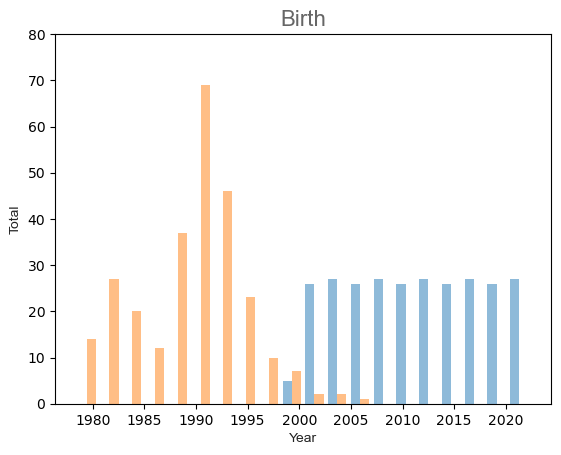

In [10]:
# 01.04.01
# hist 01 - Birth
## Birth - total number of births in the year
# dt01_seoul

dt01_seoul_x01 = dt01_seoul.Date
dt01_seoul_y01 = dt01_seoul.Birth

plt.hist([dt01_seoul_x01, dt01_seoul_y01], bins = 20, alpha = 0.5)
font1 = {'family':'arial','color':'#666666','size':16}
font2 = {'family':'arial','color':'#222222','size':10}
plt.title('Birth', loc = 'center', fontdict = font1)
plt.xlabel('Year', fontdict = font2)
plt.ylabel('Total', fontdict = font2)
plt.ylim(0, 80)
plt.xlim()
plt.show()

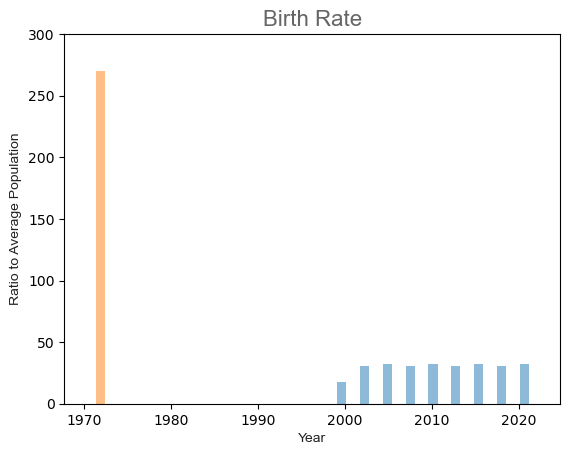

In [11]:
# 01.04.02
# hist 02 - Birth Rate
## Birth rate - the ratio between the number of liveborn births in the year and the average total population of that year
# dt01_seoul

dt01_seoul_x02 = dt01_seoul.Date
dt01_seoul_y02 = dt01_seoul.Birth_rate

plt.hist([dt01_seoul_x02, dt01_seoul_y02], bins = 20, alpha = 0.5)
font1 = {'family':'arial','color':'#666666','size':16}
font2 = {'family':'arial','color':'#222222','size':10}
plt.title('Birth Rate', loc = 'center', fontdict = font1)
plt.xlabel('Year', fontdict = font2)
plt.ylabel('Ratio to Average Population', fontdict = font2)
plt.ylim(0, 300)
plt.xlim()
plt.show()

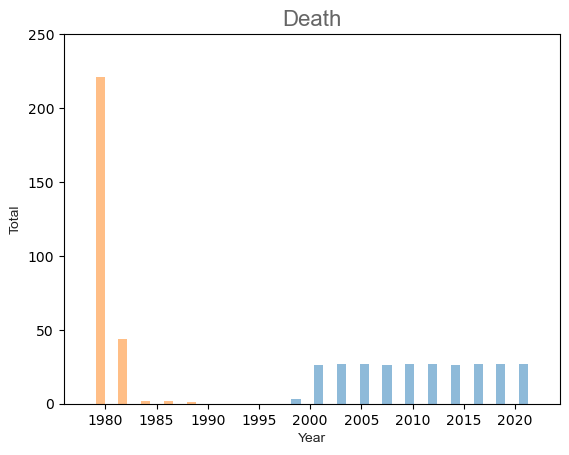

In [12]:
# 01.04.03
# hist 03 - Death
## Death - total number of deaths in the year
# dt01_seoul

dt01_seoul_x03 = dt01_seoul.Date
dt01_seoul_y03 = dt01_seoul.Death

plt.hist([dt01_seoul_x03, dt01_seoul_y03], bins = 20, alpha = 0.5)
font1 = {'family':'arial','color':'#666666','size':16}
font2 = {'family':'arial','color':'#222222','size':10}
plt.title('Death', loc = 'center', fontdict = font1)
plt.xlabel('Year', fontdict = font2)
plt.ylabel('Total', fontdict = font2)
plt.ylim(0, 250)
plt.xlim()
plt.show()

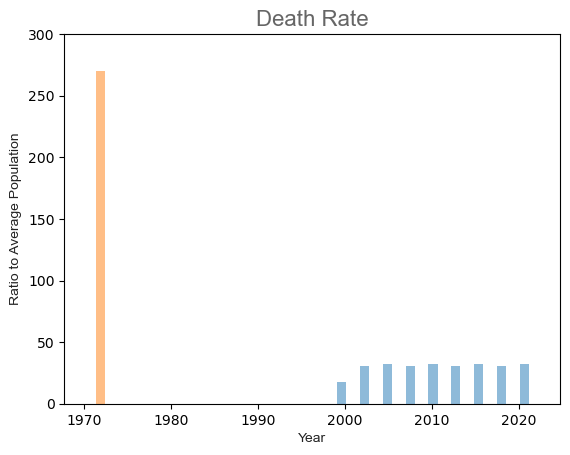

In [13]:
# 01.04.04
# hist 04 - Death Rate
## Death rate - the ratio between the number of death in the year and the average total population of that year
# dt01_seoul

dt01_seoul_x04 = dt01_seoul.Date
dt01_seoul_y04 = dt01_seoul.Death_rate

plt.hist([dt01_seoul_x04, dt01_seoul_y04], bins = 20, alpha = 0.5)
font1 = {'family':'arial','color':'#666666','size':16}
font2 = {'family':'arial','color':'#222222','size':10}
plt.title('Death Rate', loc = 'center', fontdict = font1)
plt.xlabel('Year', fontdict = font2)
plt.ylabel('Ratio to Average Population', fontdict = font2)
plt.ylim(0, 300)
plt.xlim()
plt.show()

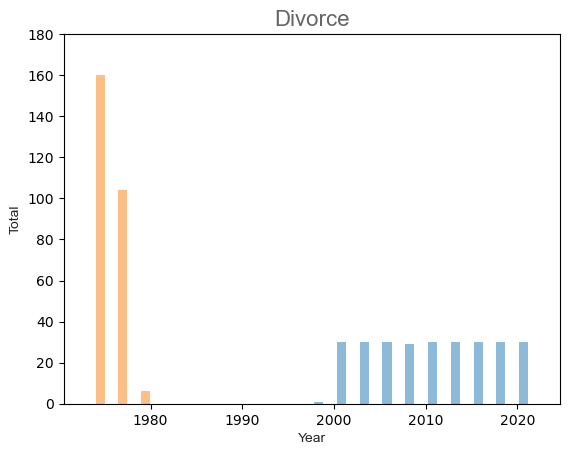

In [14]:
# 01.04.05
# hist 05 - Divorce
## Divorce - total number of divorces in the year
# dt01_seoul

dt01_seoul_x05 = dt01_seoul.Date
dt01_seoul_y05 = dt01_seoul.Divorce

plt.hist([dt01_seoul_x05, dt01_seoul_y05], bins = 20, alpha = 0.5)
font1 = {'family':'arial','color':'#666666','size':16}
font2 = {'family':'arial','color':'#222222','size':10}
plt.title('Divorce', loc = 'center', fontdict = font1)
plt.xlabel('Year', fontdict = font2)
plt.ylabel('Total', fontdict = font2)
plt.ylim(0, 180)
plt.xlim()
plt.show()

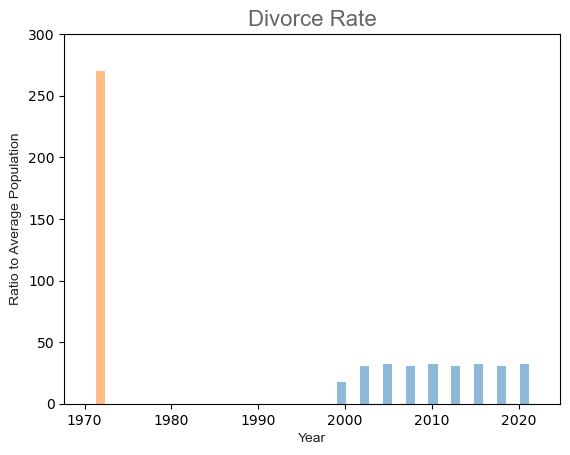

In [15]:
# 01.04.06
# hist 06 - Divorce Rate
## Divorce rate - the ratio between the number of divorces in the year and the average total population of that year
# dt01_seoul

dt01_seoul_x06 = dt01_seoul.Date
dt01_seoul_y06 = dt01_seoul.Divorce_rate

plt.hist([dt01_seoul_x06, dt01_seoul_y06], bins = 20, alpha = 0.5)
font1 = {'family':'arial','color':'#666666','size':16}
font2 = {'family':'arial','color':'#222222','size':10}
plt.title('Divorce Rate', loc = 'center', fontdict = font1)
plt.xlabel('Year', fontdict = font2)
plt.ylabel('Ratio to Average Population', fontdict = font2)
plt.ylim(0, 300)
plt.xlim()
plt.show()

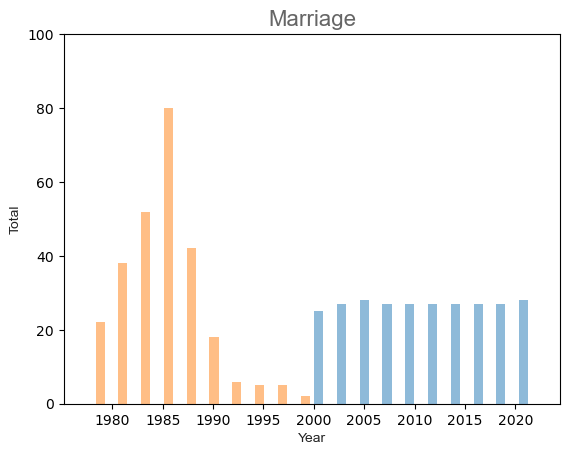

In [16]:
# 01.04.07
# hist 07 - Marriage
## Marriage - total number of marriages in the year
# dt01_seoul

dt01_seoul_x07 = dt01_seoul.Date
dt01_seoul_y07 = dt01_seoul.Marriage

plt.hist([dt01_seoul_x07, dt01_seoul_y07], bins = 20, alpha = 0.5)
font1 = {'family':'arial','color':'#666666','size':16}
font2 = {'family':'arial','color':'#222222','size':10}
plt.title('Marriage', loc = 'center', fontdict = font1)
plt.xlabel('Year', fontdict = font2)
plt.ylabel('Total', fontdict = font2)
plt.ylim(0, 100)
plt.xlim()
plt.show()

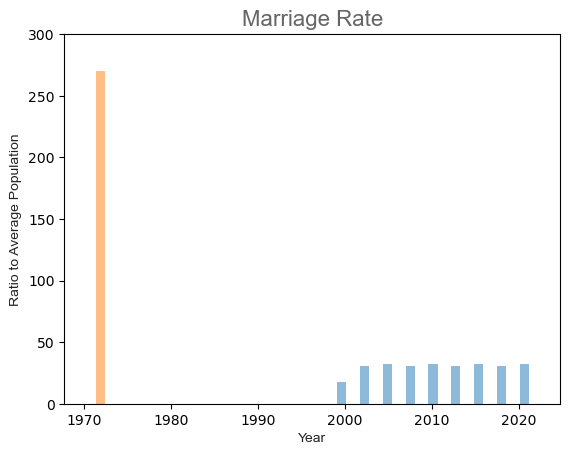

In [17]:
# 01.04.08
# hist 08 - Marriage Rate
## Marriage rate - the ratio between the number of marriages in the year and the average total population of that year
# dt01_seoul

dt01_seoul_x08 = dt01_seoul.Date
dt01_seoul_y08 = dt01_seoul.Marriage_rate

plt.hist([dt01_seoul_x08, dt01_seoul_y08], bins = 20, alpha = 0.5)
font1 = {'family':'arial','color':'#666666','size':16}
font2 = {'family':'arial','color':'#222222','size':10}
plt.title('Marriage Rate', loc = 'center', fontdict = font1)
plt.xlabel('Year', fontdict = font2)
plt.ylabel('Ratio to Average Population', fontdict = font2)
plt.ylim(0, 300)
plt.xlim()
plt.show()

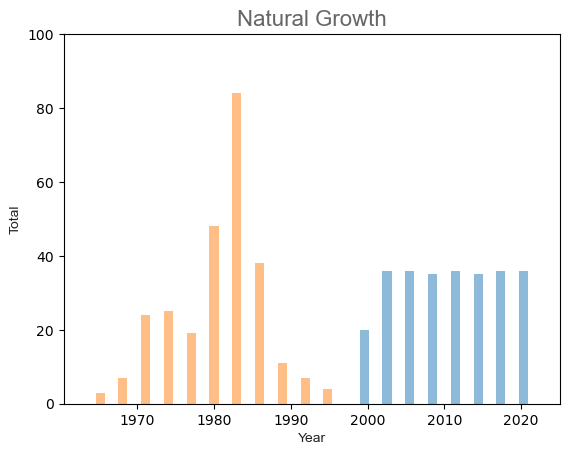

In [18]:
# 01.04.09
# hist 09 - Natural Growth
## Natural growth - total difference between births and deaths in the year
# dt01_seoul

dt01_seoul_x09 = dt01_seoul.Date
dt01_seoul_y09 = dt01_seoul.Natural_growth

plt.hist([dt01_seoul_x09, dt01_seoul_y09], bins = 20, alpha = 0.5)
font1 = {'family':'arial','color':'#666666','size':16}
font2 = {'family':'arial','color':'#222222','size':10}
plt.title('Natural Growth', loc = 'center', fontdict = font1)
plt.xlabel('Year', fontdict = font2)
plt.ylabel('Total', fontdict = font2)
plt.ylim(0, 100)
plt.xlim()
plt.show()

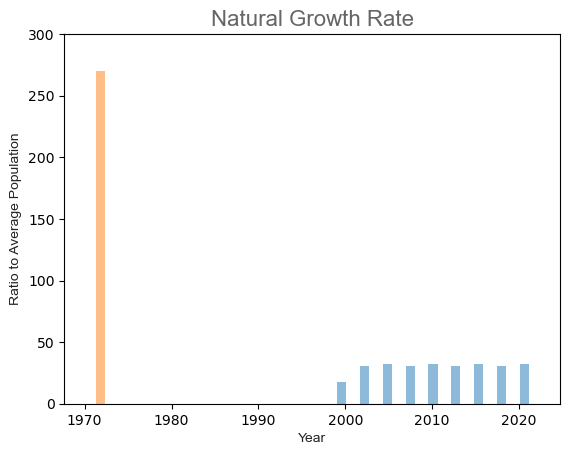

In [19]:
# 01.04.10
# hist 10 - Natural Growth Rate
## Natural growth rate - the ratio between the number of births and deaths of the average total population of that year
# dt01_seoul

dt01_seoul_x10 = dt01_seoul.Date
dt01_seoul_y10 = dt01_seoul.Natural_growth_rate

plt.hist([dt01_seoul_x10, dt01_seoul_y10], bins = 20, alpha = 0.5)
font1 = {'family':'arial','color':'#666666','size':16}
font2 = {'family':'arial','color':'#222222','size':10}
plt.title('Natural Growth Rate', loc = 'center', fontdict = font1)
plt.xlabel('Year', fontdict = font2)
plt.ylabel('Ratio to Average Population', fontdict = font2)
plt.ylim(0, 300)
plt.xlim()
plt.show()

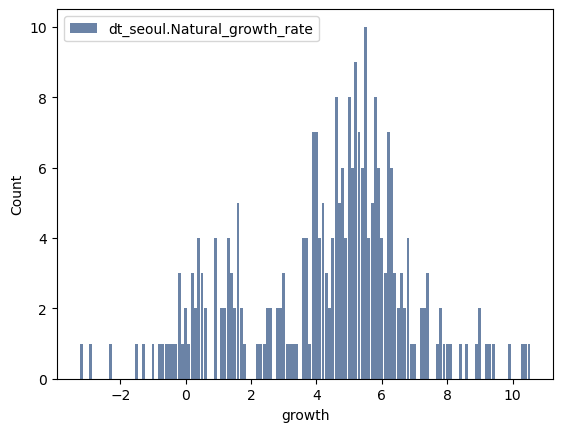

In [20]:
# 01.04.11
# hist of dt_seoul.Natural_growth_rate
## Natural growth - total difference between births and deaths count
# dt01_seoul

dt01_seoul_hist01 = thinkstats2.Hist(dt01_seoul.Natural_growth_rate, label="dt_seoul.Natural_growth_rate")
thinkplot.Hist(dt01_seoul_hist01)
thinkplot.Config(xlabel="growth", ylabel="Count")

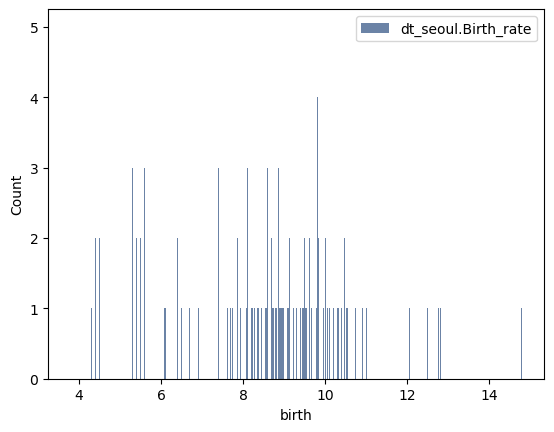

In [21]:
# 01.04.12
# hist of dt_seoul.Birth_rate
## Birth rate - the ratio between the number of liveborn births in the year and the average total population count
# dt01_seoul

dt01_seoul_hist02 = thinkstats2.Hist(dt01_seoul.Birth_rate, label="dt_seoul.Birth_rate")
thinkplot.Hist(dt01_seoul_hist02)
thinkplot.Config(xlabel="birth", ylabel="Count")

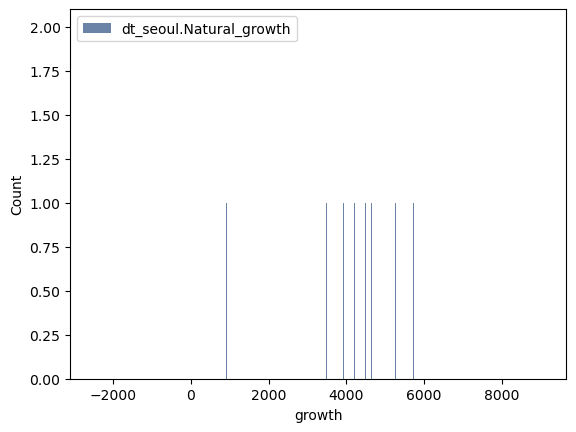

In [22]:
# 01.04.13
# hist of dt_seoul.Natural_growth
## Natural growth - total difference between births and deaths count
# dt01_seoul

dt01_seoul_hist03 = thinkstats2.Hist(dt01_seoul.Natural_growth, label="dt_seoul.Natural_growth")
thinkplot.Hist(dt01_seoul_hist03)
thinkplot.Config(xlabel="growth", ylabel="Count")

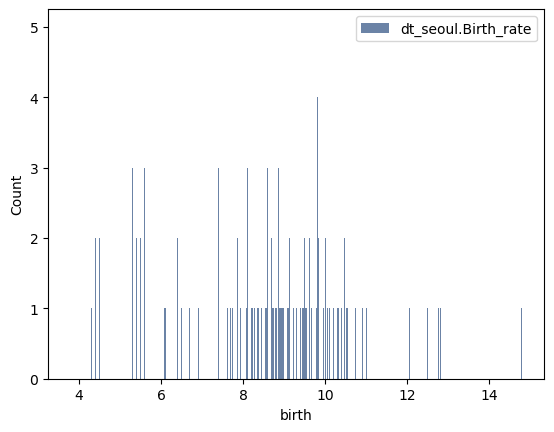

In [23]:
# 01.04.14
# hist of dt_seoul.Birth_rate
## Birth rate - the ratio between the number of liveborn births in the year and the average total population count
# dt01_seoul

dt01_seoul_hist04 = thinkstats2.Hist(dt01_seoul.Birth_rate, label="dt_seoul.Birth_rate")
thinkplot.Hist(dt01_seoul_hist04)
thinkplot.Config(xlabel="birth", ylabel="Count")

In [24]:
# It is time to start using what you have learned throughout the first half of this course by developing an original data mining project. 
# This week you will develop the project idea and do some data exploration/graphical analysis. 
# You will continue working on and updating this project for the remainder of the term.
# The first step is coming up with an idea – arguably one of the hardest steps! 
# Identify an original business problem for your project that can be solved with an appropriate model. 
# By a business problem, it is meant that you should work on a problem where there is a good reason to solve it. 
# There should be some organization or company that would find the solution to the problem useful. 
# There are lots of ideas available online through Kaggle and other sources, but your idea should have a unique spin on it. 
# The second step is locating your data. This can come from a variety of sources, e.g., Kaggle, your job, a website, API, etc. 
# Feel free to reach out to your instructor if you are not sure if your idea and data are suitable. 
# You may need to adjust your idea on the availability of data.
# Begin Milestone 1 with a 250-500-word narrative describing your original idea for the analysis/model building business problem. 
# Clearly identify the problem you will address and the target for your model. 
# Then, do a graphical analysis creating a minimum of four graphs. 
# Label your graphs appropriately and explain/analyze the information provided by each graph. 
# Your analysis should begin to answer the question(s) you are addressing. 
# Write a short overview/conclusion of the insights gained from your graphical analysis.
# As a reminder, Teams is a great place to discuss your project with your peers. 
# Feel free to solicit feedback/input (without creating a group project!) and collaborate on your projects with your peers. 
# Each milestone will build on top of each other, so make sure you do not fall behind.
# I recommend building your project milestones in a Jupyter Notebook, building upon one another.

## 08.02_milestone02

In [25]:
# Now that you have created your idea, located data, and have started your graphical analysis, you will move on to the data preparation process of your project. 
# After completing Milestone 2, your data should be ready for the model building/evaluation phase.

In [26]:
# The purpose of this term is to determine the population trend of the ROK and to project future trends.

In [27]:
# 02.01.01
# clean dataset
# return Seoul
# dt01_seoul

dt01_seoul.head()

,ID,Date,Birth,Birth_rate,Death,Death_rate,Divorce,Divorce_rate,Marriage,Marriage_rate,Natural_growth,Natural_growth_rate
Region,,,,,,,,,,,,
Seoul,15,2000-01-01,12866.0,14.79,3931.0,4.5,1835.0,2.1,6781.0,7.8,8935.0,10.3
Seoul,33,2000-02-01,11797.0,14.48,3218.0,4.0,1912.0,2.3,5596.0,6.9,8579.0,10.5
Seoul,51,2000-03-01,12453.0,14.29,3368.0,3.9,2333.0,2.7,6781.0,7.8,9085.0,10.4
Seoul,69,2000-04-01,10782.0,12.77,3204.0,3.8,1916.0,2.3,6667.0,7.9,7578.0,9.0
Seoul,87,2000-05-01,10817.0,12.39,3064.0,3.5,2108.0,2.4,8428.0,9.7,7753.0,8.9


In [28]:
# 02.01.02
# clean dataset
# renamed original columns
# dt01_seoul

dt01_seoul.rename(columns={"Region": "region"}, inplace=True)
dt01_seoul.rename(columns={"ID": "id"}, inplace=True)
dt01_seoul.rename(columns={"Date": "date"}, inplace=True)
dt01_seoul.rename(columns={"Birth": "birth"}, inplace=True)
dt01_seoul.rename(columns={"Birth_rate": "birth_rate"}, inplace=True)
dt01_seoul.rename(columns={"Death": "death"}, inplace=True)
dt01_seoul.rename(columns={"Death_rate": "death_rate"}, inplace=True)
dt01_seoul.rename(columns={"Divorce": "divorce"}, inplace=True)
dt01_seoul.rename(columns={"Divorce_rate": "divorce_rate"}, inplace=True)
dt01_seoul.rename(columns={"Marriage": "marriage"}, inplace=True)
dt01_seoul.rename(columns={"Marriage_rate": "marriage_rate"}, inplace=True)
dt01_seoul.rename(columns={"Natural_growth": "natural_growth"}, inplace=True)
dt01_seoul.rename(columns={"Natural_growth_rate": "natural_growth_rate"}, inplace=True)

In [29]:
# 02.01.03
# clean dataset
# verify dimensions
# dt01_seoul

print(dt01_seoul.shape)

(270, 12)


In [30]:
# 02.01.04
# clean dataset
# verify dimensions
# dt01_seoul

print(dt01_seoul.head())

        id       date  ...  natural_growth  natural_growth_rate
Region                 ...                                     
Seoul   15 2000-01-01  ...          8935.0                 10.3
Seoul   33 2000-02-01  ...          8579.0                 10.5
Seoul   51 2000-03-01  ...          9085.0                 10.4
Seoul   69 2000-04-01  ...          7578.0                  9.0
Seoul   87 2000-05-01  ...          7753.0                  8.9

[5 rows x 12 columns]


In [31]:
# 02.02.01
# Drop any features that are not useful for your model building and explain why they are not useful.
# dropped columns display ratio of variable per year to population; contains incomplete data.
# remove columns
# dt01_seoul

dt01_seoul_drp = dt01_seoul.drop(['birth_rate', 'death_rate', 'divorce_rate', 'marriage_rate', 'natural_growth_rate'], axis=1)

In [32]:
# 02.02.02
# Drop any features that are not useful for your model building and explain why they are not useful.
# return dimenions
# dt01_seoul

print(dt01_seoul_drp.shape)

(270, 7)


In [33]:
# 02.02.03
# Drop any features that are not useful for your model building and explain why they are not useful.
# return head
# dt01_seoul

print(dt01_seoul_drp.head())

        id       date    birth   death  divorce  marriage  natural_growth
Region                                                                   
Seoul   15 2000-01-01  12866.0  3931.0   1835.0    6781.0          8935.0
Seoul   33 2000-02-01  11797.0  3218.0   1912.0    5596.0          8579.0
Seoul   51 2000-03-01  12453.0  3368.0   2333.0    6781.0          9085.0
Seoul   69 2000-04-01  10782.0  3204.0   1916.0    6667.0          7578.0
Seoul   87 2000-05-01  10817.0  3064.0   2108.0    8428.0          7753.0


In [34]:
# 02.03.00
# Perform any data extraction/selection steps.
# data extracted from https://kosis.kr/eng/statisticsList/statisticsListIndex
# data contains population of all regions of Korea 1970-2023

In [35]:
# 02.03.01
# Perform any data extraction/selection steps.
# data extracted from https://kosis.kr/eng/statisticsList/statisticsListIndex
# read csv 
# dt01

# print(dt01)

In [36]:
# 02.03.02
# Perform any data extraction/selection steps.
# data extracted from https://kosis.kr/eng/statisticsList/statisticsListIndex
# read csv 
# dt02

# print(dt02)

In [37]:
# 02.03.03
# Perform any data extraction/selection steps.
# data extracted from https://kosis.kr/eng/statisticsList/statisticsListIndex
# read csv 
# dt03

dt03 = pd.read_csv('2022_Population__Households_and_Housing_Units_20240131140157_2022.csv')

In [38]:
# 02.03.04
# Perform any data extraction/selection steps.
# data extracted from https://kosis.kr/eng/statisticsList/statisticsListIndex
# read csv 
# dt04

dt04 = pd.read_csv('2010_Population__Households_and_Housing_Units_20240131140135_2010.csv')

In [39]:
# 02.03.05
# Perform any data extraction/selection steps.
# data extracted from https://kosis.kr/eng/statisticsList/statisticsListIndex
# read csv 
# dt05

dt05 = pd.read_csv('2005_Population__Households_and_Housing_Units_20240131140110_2005.csv')

In [40]:
# 02.03.06
# Perform any data extraction/selection steps.
# data extracted from https://kosis.kr/eng/statisticsList/statisticsListIndex
# read csv 
# dt06

dt06 = pd.read_csv('2000_Population__Households_and_Housing_Units_by_Administrative_District_20240131140045_2000.csv')

In [41]:
# 02.03.07
# Perform any data extraction/selection steps.
# data extracted from https://kosis.kr/eng/statisticsList/statisticsListIndex
# read csv 
# dt07

dt07 = pd.read_csv('1995_Population__households_by_administrative_district_20240131140017_1995.csv')

In [42]:
# 02.03.08
# Perform any data extraction/selection steps.
# data extracted from https://kosis.kr/eng/statisticsList/statisticsListIndex
# read csv 
# dt08

dt08 = pd.read_csv('1990_Population__households_by_administrative_district_20240131135955_1990.csv')

In [43]:
# 02.03.09
# Perform any data extraction/selection steps.
# data extracted from https://kosis.kr/eng/statisticsList/statisticsListIndex
# read csv 
# dt09

dt09 = pd.read_csv('1985_Population__households_by_administrative_district_20240131135838_1985.csv')

In [44]:
# 02.03.10
# Perform any data extraction/selection steps.
# data extracted from https://kosis.kr/eng/statisticsList/statisticsListIndex
# read csv 
# dt10

dt10 = pd.read_csv('1980_Population__households_by_administrative_district_20240131135914_1980.csv')

In [45]:
# 02.03.11
# Perform any data extraction/selection steps.
# data extracted from https://kosis.kr/eng/statisticsList/statisticsListIndex
# read csv 
# dt11

dt11 = pd.read_csv('1975_Population__households_by_administrative_district_20240131135816_1975.csv')

In [46]:
# 02.03.12
# Perform any data extraction/selection steps.
# data extracted from https://kosis.kr/eng/statisticsList/statisticsListIndex
# read csv 
# dt12

dt12 = pd.read_csv('1970_Population__households_by_administrative_district_20240131135736_1970.csv')

In [47]:
# 02.04.01
# Perform any data extraction/selection steps.
# return head 
# dt01

# print(dt01.head())

In [48]:
# 02.04.02
# Perform any data extraction/selection steps.
# return head 
# dt02

# print(dt02.head())

In [49]:
# 02.04.03
# Perform any data extraction/selection steps.
# return head 
# dt03

print(dt03.head())

   By administrative divisions(eup, myeon, dong)  ...                                           2022.19
0  By administrative divisions(eup, myeon, dong)  ...  Living quaters other than housing unit (Housing)
1                                  Whole country  ...                                           1162311
2                                 Total for eups  ...                                             81935
3                               Total for myeons  ...                                            110037
4                                Total for dongs  ...                                            970339

[5 rows x 21 columns]


In [50]:
# 02.04.04
# Perform any data extraction/selection steps.
# return head 
# dt04

print(dt04.head())

   By administrative divisions(eup, myeon, dong)  ...                                           2010.19
0  By administrative divisions(eup, myeon, dong)  ...  Living quaters other than housing unit (Housing)
1                                  Whole country  ...                                            303097
2                                Total for dongs  ...                                            270518
3                                 Total for eups  ...                                              9816
4                               Total for myeons  ...                                             22763

[5 rows x 21 columns]


In [51]:
# 02.04.05
# Perform any data extraction/selection steps.
# return head 
# dt05

print(dt05.head())

   By administrative divisions  ...                                           2005.19
0  By administrative divisions  ...  Living quaters other than housing unit (Housing)
1                Whole country  ...                                            206511
2                    Dong area  ...                                            184683
3                     Eup area  ...                                              7433
4                   Myeon area  ...                                             14395

[5 rows x 21 columns]


In [52]:
# 02.04.06
# Perform any data extraction/selection steps.
# return head 
# dt06

print(dt06.head())

   By administrative divisions  ...                                           2000.19
0  By administrative divisions  ...  Living quaters other than housing unit (Housing)
1                Whole country  ...                                             91814
2                     Eup area  ...                                              7254
3                   Myeon area  ...                                             16805
4                    Dong area  ...                                             67755

[5 rows x 21 columns]


In [53]:
# 02.04.07
# Perform any data extraction/selection steps.
# return head 
# dt07

print(dt07.head())

   By administrative divisions  ...                               1995.16
0  By administrative divisions  ...  Foreigner household(female) (Person)
1                Whole country  ...                                 23044
2                     Eup area  ...                                  1382
3                   Myeon area  ...                                  2738
4                    Dong area  ...                                 18924

[5 rows x 18 columns]


In [54]:
# 02.04.08
# Perform any data extraction/selection steps.
# return head 
# dt08

print(dt08.head())

   By administrative divisions  ...                               1990.16
0  By administrative divisions  ...  Foreigner household(female) (Person)
1                Whole country  ...                                  9290
2                    City area  ...                                  8562
3                     Eup area  ...                                   564
4                   Myeon area  ...                                   164

[5 rows x 18 columns]


In [55]:
# 02.04.09
# Perform any data extraction/selection steps.
# return head 
# dt09

print(dt09.head())

   By administrative divisions  ...                               1985.16
0  By administrative divisions  ...  Foreigner household(female) (Person)
1                Whole country  ...                                 12633
2                    City area  ...                                 11022
3                     Eup area  ...                                  1200
4                   Myeon area  ...                                   411

[5 rows x 18 columns]


In [56]:
# 02.04.10
# Perform any data extraction/selection steps.
# return head 
# dt10

print(dt10.head())

   By administrative divisions  ...                               1980.16
0  By administrative divisions  ...  Foreigner household(female) (Person)
1                Whole country  ...                                 11605
2                    City area  ...                                  9484
3                     Eup area  ...                                  1323
4                   Myeon area  ...                                   798

[5 rows x 18 columns]


In [57]:
# 02.04.11
# Perform any data extraction/selection steps.
# return head 
# dt11

print(dt11.head())

   By administrative divisions  ...                    1975.11
0  By administrative divisions  ...  Foreigner female (Person)
1                Whole country  ...                      11650
2                    City area  ...                       9463
3                     Eup area  ...                       1404
4                   Myeon area  ...                        783

[5 rows x 13 columns]


In [58]:
# 02.04.12
# Perform any data extraction/selection steps.
# return head 
# dt12

print(dt12.head())

   By administrative divisions  ...                    1970.11
0  By administrative divisions  ...  Foreigner female (Person)
1                Whole country  ...                      14340
2                    City area  ...                      11509
3                     Eup area  ...                       1705
4                   Myeon area  ...                       1126

[5 rows x 13 columns]


In [59]:
# 02.05.01
# Transform features if necessary.
# verify dimensions 
# dt01

print(dt01.shape)

(4860, 12)


In [60]:
# 02.05.02
# Transform features if necessary.
# verify dimensions 
# dt02

# print(dt02.shape)

In [61]:
# 02.05.03
# Transform features if necessary.
# verify dimensions 
# dt03

print(dt03.shape)

(325, 21)


In [62]:
# 02.05.04
# Transform features if necessary.
# verify dimensions 
# dt04

print(dt04.shape)

(21, 21)


In [63]:
# 02.05.05
# Transform features if necessary.
# verify dimensions 
# dt05

print(dt05.shape)

(21, 21)


In [64]:
# 02.05.06
# Transform features if necessary.
# verify dimensions 
# dt06

print(dt06.shape)

(21, 21)


In [65]:
# 02.05.07
# Transform features if necessary.
# verify dimensions 
# dt07

print(dt07.shape)

(20, 18)


In [66]:
# 02.05.08
# Transform features if necessary.
# verify dimensions 
# dt08

print(dt08.shape)

(20, 18)


In [67]:
# 02.05.09
# Transform features if necessary.
# verify dimensions 
# dt09

print(dt09.shape)

(18, 18)


In [68]:
# 02.05.10
# Transform features if necessary.
# verify dimensions 
# dt10

print(dt10.shape)

(16, 18)


In [69]:
# 02.05.11
# Transform features if necessary.
# verify dimensions 
# dt11

print(dt11.shape)

(16, 13)


In [70]:
# 02.05.12
# Transform features if necessary.
# verify dimensions 
# dt12

print(dt12.shape)

(16, 13)


In [71]:
# 02.06.01
# Transform features if necessary.
# combine all extracted data 
# dt03-dt06

dt00_comb_01 = pd.concat([dt03, dt04, dt05, dt06])

In [72]:
# 02.06.02
# Transform features if necessary.
# combine all extracted data 
# dt07-dt10

dt00_comb_02 = pd.concat([dt07, dt08, dt09, dt10])

In [73]:
# 02.06.03
# Transform features if necessary.
# combine all extracted data 
# dt11-dt12

dt00_comb_03 = pd.concat([dt11, dt12])

In [74]:
# 02.06.04
# Transform features if necessary.
# return head extracted data 
# dt00_01
# 494 rows × 174 columns

print(dt00_comb_01.head())

   By administrative divisions(eup, myeon, dong)  ... 2000.19
0  By administrative divisions(eup, myeon, dong)  ...     NaN
1                                  Whole country  ...     NaN
2                                 Total for eups  ...     NaN
3                               Total for myeons  ...     NaN
4                                Total for dongs  ...     NaN

[5 rows x 82 columns]


In [75]:
# 02.06.05
# Transform features if necessary.
# return head extracted data 
# dt00_02
# 494 rows × 174 columns

print(dt00_comb_02.head())

   By administrative divisions                       1995  ... 1980.15 1980.16
0  By administrative divisions  Total population (Person)  ...     NaN     NaN
1                Whole country                   44608726  ...     NaN     NaN
2                     Eup area                    3484148  ...     NaN     NaN
3                   Myeon area                    6088105  ...     NaN     NaN
4                    Dong area                   35036473  ...     NaN     NaN

[5 rows x 69 columns]


In [76]:
# 02.06.06
# Transform features if necessary.
# return head extracted data 
# dt00_03
# 494 rows × 174 columns

print(dt00_comb_03.head())

   By administrative divisions                    1975  ... 1970.10 1970.11
0  By administrative divisions  Household (households)  ...     NaN     NaN
1                Whole country                 6761239  ...     NaN     NaN
2                    City area                 3418290  ...     NaN     NaN
3                     Eup area                  722593  ...     NaN     NaN
4                   Myeon area                 2620356  ...     NaN     NaN

[5 rows x 25 columns]


In [77]:
# 02.06.07
# Transform features if necessary.
# return dimensions extracted data 
# dt00_01
# 388 rows × 082 columns

print(dt00_comb_01.shape)

(388, 82)


In [78]:
# 02.06.08
# Transform features if necessary.
# return dimensions extracted data 
# dt00_02
# 074 rows × 069 columns

print(dt00_comb_02.shape)

(74, 69)


In [79]:
# 02.06.09
# Transform features if necessary.
# return dimensions extracted data 
# dt00_03
# 032 rows × 025 columns

print(dt00_comb_03.shape)

(32, 25)


In [80]:
# 02.07.01
# Transform features if necessary.
# view all extracted data 
# dt00_01
# 388 rows × 082 columns

pd.options.display.max_columns = 100
pd.options.display.max_rows = 400
pd.options.display.max_colwidth = 301

In [81]:
# 02.07.02
# Transform features if necessary.
# view all extracted data 
# dt00_02
# 074 rows × 069 columns

pd.options.display.max_columns = 100
pd.options.display.max_rows = 400
pd.options.display.max_colwidth = 301

In [82]:
# 02.07.03
# Transform features if necessary.
# view all extracted data 
# dt00_03
# 032 rows × 025 columns

pd.options.display.max_columns = 100
pd.options.display.max_rows = 400
pd.options.display.max_colwidth = 301

In [83]:
# 02.07.04
# Transform features if necessary.
# return all extracted data 
# dt00_01
# 388 rows × 082 columns

print(dt00_comb_01.head())

   By administrative divisions(eup, myeon, dong)                       2022  \
0  By administrative divisions(eup, myeon, dong)  Total population (Person)   
1                                  Whole country                   51692272   
2                                 Total for eups                    5098892   
3                               Total for myeons                    4506486   
4                                Total for dongs                   42086894   

          2022.1           2022.2                   2022.3  \
0  Male (Person)  Female (Person)  Korean - total (Person)   
1       25835298         25856974                 49939926   
2        2621409          2477483                  4879206   
3        2348865          2157621                  4244198   
4       20865024         21221870                 40816522   

                   2022.4                    2022.5                    2022.6  \
0  Korean - male (Person)  Korean - Female (Person)  Foreigner-Total (P

In [84]:
# 02.07.05
# Transform features if necessary.
# return all extracted data 
# dt00_02
# 074 rows × 069 columns

print(dt00_comb_02.head())

   By administrative divisions                       1995         1995.1  \
0  By administrative divisions  Total population (Person)  Male (Person)   
1                Whole country                   44608726       22389324   
2                     Eup area                    3484148        1742046   
3                   Myeon area                    6088105        3025970   
4                    Dong area                   35036473       17621308   

            1995.2           1995.3         1995.4           1995.5  \
0  Female (Person)  Korean (Person)  Male (Person)  Female (Person)   
1         22219402         44553710       22357352         22196358   
2          1742102          3480784        1740064          1740720   
3          3062135          6080962        3021565          3059397   
4         17415165         34991964       17595723         17396241   

                            1995.6                               1995.7  \
0  Ordinary household (households)  Ordin

In [85]:
# 02.07.06
# Transform features if necessary.
# return all extracted data 
# dt00_03
# 032 rows × 025 columns

print(dt00_comb_03.head())

   By administrative divisions                    1975               1975.1  \
0  By administrative divisions  Household (households)  Korean (households)   
1                Whole country                 6761239              6754257   
2                    City area                 3418290              3412640   
3                     Eup area                  722593               721911   
4                   Myeon area                 2620356              2619706   

                             1975.2               1975.3         1975.4  \
0  Foreigner household (households)  Population (Person)  Male (Person)   
1                              6982             34706620       17461244   
2                              5650             16792771        8383271   
3                               682              3723354        1876381   
4                               650             14187007        7198257   

            1975.5           1975.6         1975.7                  1975.8

In [86]:
# 02.08.01
# Engineer new useful features.

In [87]:
# 02.08.02
# Deal with missing data (do not just drop rows or columns without justifying this).
# did not remove rows or columns containing NaN values
# replace NaN with 0 to omit in visualizations 
# dt00_01

dt00_comb_01_drpNaN = dt00_comb_01.replace([np.nan, -np.inf], 0)

In [88]:
# 02.08.03
# Deal with missing data (do not just drop rows or columns without justifying this).
# did not remove rows or columns containing NaN values
# return 
# dt00_01

print(dt00_comb_01_drpNaN.head())

   By administrative divisions(eup, myeon, dong)                       2022  \
0  By administrative divisions(eup, myeon, dong)  Total population (Person)   
1                                  Whole country                   51692272   
2                                 Total for eups                    5098892   
3                               Total for myeons                    4506486   
4                                Total for dongs                   42086894   

          2022.1           2022.2                   2022.3  \
0  Male (Person)  Female (Person)  Korean - total (Person)   
1       25835298         25856974                 49939926   
2        2621409          2477483                  4879206   
3        2348865          2157621                  4244198   
4       20865024         21221870                 40816522   

                   2022.4                    2022.5                    2022.6  \
0  Korean - male (Person)  Korean - Female (Person)  Foreigner-Total (P

In [89]:
# 02.08.04
# Deal with missing data (do not just drop rows or columns without justifying this).
# did not remove rows or columns containing NaN values
# replace NaN with 0 to omit in visualizations 
# dt00_02

dt00_comb_02_drpNaN = dt00_comb_02.replace([np.nan, -np.inf], 0)

In [90]:
# 02.08.05
# Deal with missing data (do not just drop rows or columns without justifying this).
# did not remove rows or columns containing NaN values
# return 
# dt00_01

print(dt00_comb_02_drpNaN.head())

   By administrative divisions                       1995         1995.1  \
0  By administrative divisions  Total population (Person)  Male (Person)   
1                Whole country                   44608726       22389324   
2                     Eup area                    3484148        1742046   
3                   Myeon area                    6088105        3025970   
4                    Dong area                   35036473       17621308   

            1995.2           1995.3         1995.4           1995.5  \
0  Female (Person)  Korean (Person)  Male (Person)  Female (Person)   
1         22219402         44553710       22357352         22196358   
2          1742102          3480784        1740064          1740720   
3          3062135          6080962        3021565          3059397   
4         17415165         34991964       17595723         17396241   

                            1995.6                               1995.7  \
0  Ordinary household (households)  Ordin

In [91]:
# 02.08.06
# Deal with missing data (do not just drop rows or columns without justifying this).
# did not remove rows or columns containing NaN values
# replace NaN with 0 to omit in visualizations 
# dt00_03

dt00_comb_03_drpNaN = dt00_comb_03.replace([np.nan, -np.inf], 0)

In [92]:
# 02.08.07
# Deal with missing data (do not just drop rows or columns without justifying this).
# did not remove rows or columns containing NaN values
# return
# dt00_01

print(dt00_comb_03_drpNaN.head())

   By administrative divisions                    1975               1975.1  \
0  By administrative divisions  Household (households)  Korean (households)   
1                Whole country                 6761239              6754257   
2                    City area                 3418290              3412640   
3                     Eup area                  722593               721911   
4                   Myeon area                 2620356              2619706   

                             1975.2               1975.3         1975.4  \
0  Foreigner household (households)  Population (Person)  Male (Person)   
1                              6982             34706620       17461244   
2                              5650             16792771        8383271   
3                               682              3723354        1876381   
4                               650             14187007        7198257   

            1975.5           1975.6         1975.7                  1975.8

In [93]:
# 02.08.08
# Create dummy variables if necessary.
# return columns 
# dt00_01

list(dt00_comb_01_drpNaN.columns)

['By administrative divisions(eup, myeon, dong)',
 '2022',
 '2022.1',
 '2022.2',
 '2022.3',
 '2022.4',
 '2022.5',
 '2022.6',
 '2022.7',
 '2022.8',
 '2022.9',
 '2022.10',
 '2022.11',
 '2022.12',
 '2022.13',
 '2022.14',
 '2022.15',
 '2022.16',
 '2022.17',
 '2022.18',
 '2022.19',
 '2010',
 '2010.1',
 '2010.2',
 '2010.3',
 '2010.4',
 '2010.5',
 '2010.6',
 '2010.7',
 '2010.8',
 '2010.9',
 '2010.10',
 '2010.11',
 '2010.12',
 '2010.13',
 '2010.14',
 '2010.15',
 '2010.16',
 '2010.17',
 '2010.18',
 '2010.19',
 'By administrative divisions',
 '2005',
 '2005.1',
 '2005.2',
 '2005.3',
 '2005.4',
 '2005.5',
 '2005.6',
 '2005.7',
 '2005.8',
 '2005.9',
 '2005.10',
 '2005.11',
 '2005.12',
 '2005.13',
 '2005.14',
 '2005.15',
 '2005.16',
 '2005.17',
 '2005.18',
 '2005.19',
 '2000',
 '2000.1',
 '2000.2',
 '2000.3',
 '2000.4',
 '2000.5',
 '2000.6',
 '2000.7',
 '2000.8',
 '2000.9',
 '2000.10',
 '2000.11',
 '2000.12',
 '2000.13',
 '2000.14',
 '2000.15',
 '2000.16',
 '2000.17',
 '2000.18',
 '2000.19']

In [94]:
# 02.08.09
# Create dummy variables if necessary.
# will use this in future milestones by adding column names
# dt00_01

dt00_comb_01_drpNaN_cp = dt00_comb_01_drpNaN.copy() 
dt00_comb_01_drpNaN_cp_dv = pd.get_dummies(dt00_comb_01_drpNaN_cp, columns = [])

In [95]:
# 02.08.10
# Create dummy variables if necessary.
# will use this in future milestones by adding column names
# return 
# dt00_01

print(dt00_comb_01_drpNaN_cp_dv.head())

   By administrative divisions(eup, myeon, dong)                       2022  \
0  By administrative divisions(eup, myeon, dong)  Total population (Person)   
1                                  Whole country                   51692272   
2                                 Total for eups                    5098892   
3                               Total for myeons                    4506486   
4                                Total for dongs                   42086894   

          2022.1           2022.2                   2022.3  \
0  Male (Person)  Female (Person)  Korean - total (Person)   
1       25835298         25856974                 49939926   
2        2621409          2477483                  4879206   
3        2348865          2157621                  4244198   
4       20865024         21221870                 40816522   

                   2022.4                    2022.5                    2022.6  \
0  Korean - male (Person)  Korean - Female (Person)  Foreigner-Total (P

In [96]:
# 02.08.11
# Create dummy variables if necessary.
# will use this in future milestones by adding column names
# return columns 
# dt00_02

list(dt00_comb_02_drpNaN.columns)

['By administrative divisions',
 '1995',
 '1995.1',
 '1995.2',
 '1995.3',
 '1995.4',
 '1995.5',
 '1995.6',
 '1995.7',
 '1995.8',
 '1995.9',
 '1995.10',
 '1995.11',
 '1995.12',
 '1995.13',
 '1995.14',
 '1995.15',
 '1995.16',
 '1990',
 '1990.1',
 '1990.2',
 '1990.3',
 '1990.4',
 '1990.5',
 '1990.6',
 '1990.7',
 '1990.8',
 '1990.9',
 '1990.10',
 '1990.11',
 '1990.12',
 '1990.13',
 '1990.14',
 '1990.15',
 '1990.16',
 '1985',
 '1985.1',
 '1985.2',
 '1985.3',
 '1985.4',
 '1985.5',
 '1985.6',
 '1985.7',
 '1985.8',
 '1985.9',
 '1985.10',
 '1985.11',
 '1985.12',
 '1985.13',
 '1985.14',
 '1985.15',
 '1985.16',
 '1980',
 '1980.1',
 '1980.2',
 '1980.3',
 '1980.4',
 '1980.5',
 '1980.6',
 '1980.7',
 '1980.8',
 '1980.9',
 '1980.10',
 '1980.11',
 '1980.12',
 '1980.13',
 '1980.14',
 '1980.15',
 '1980.16']

In [97]:
# 02.08.12
# Create dummy variables if necessary.
# will use this in future milestones by adding column names
# dt00_02

dt00_comb_02_drpNaN_cp = dt00_comb_02_drpNaN.copy() 
dt00_comb_02_drpNaN_cp_dv = pd.get_dummies(dt00_comb_02_drpNaN_cp, columns = [])

In [98]:
# 02.08.13
# Create dummy variables if necessary.
# will use this in future milestones by adding column names
# return 
# dt00_02

print(dt00_comb_02_drpNaN_cp_dv.head())

   By administrative divisions                       1995         1995.1  \
0  By administrative divisions  Total population (Person)  Male (Person)   
1                Whole country                   44608726       22389324   
2                     Eup area                    3484148        1742046   
3                   Myeon area                    6088105        3025970   
4                    Dong area                   35036473       17621308   

            1995.2           1995.3         1995.4           1995.5  \
0  Female (Person)  Korean (Person)  Male (Person)  Female (Person)   
1         22219402         44553710       22357352         22196358   
2          1742102          3480784        1740064          1740720   
3          3062135          6080962        3021565          3059397   
4         17415165         34991964       17595723         17396241   

                            1995.6                               1995.7  \
0  Ordinary household (households)  Ordin

In [99]:
# 02.08.14
# Create dummy variables if necessary.
# will use this in future milestones by adding column names
# return columns 
# dt00_03

list(dt00_comb_03_drpNaN.columns)

['By administrative divisions',
 '1975',
 '1975.1',
 '1975.2',
 '1975.3',
 '1975.4',
 '1975.5',
 '1975.6',
 '1975.7',
 '1975.8',
 '1975.9',
 '1975.10',
 '1975.11',
 '1970',
 '1970.1',
 '1970.2',
 '1970.3',
 '1970.4',
 '1970.5',
 '1970.6',
 '1970.7',
 '1970.8',
 '1970.9',
 '1970.10',
 '1970.11']

In [100]:
# 02.08.15
# Create dummy variables if necessary.
# will use this in future milestones by adding column names
# dt00_03

dt00_comb_03_drpNaN_cp = dt00_comb_03_drpNaN.copy() 
dt00_comb_03_drpNaN_cp_dv = pd.get_dummies(dt00_comb_03_drpNaN_cp, columns = [])

In [101]:
# 02.08.16
# Create dummy variables if necessary.
# will use this in future milestones by adding column names
# return 
# dt00_02

print(dt00_comb_03_drpNaN_cp_dv.head())

   By administrative divisions                    1975               1975.1  \
0  By administrative divisions  Household (households)  Korean (households)   
1                Whole country                 6761239              6754257   
2                    City area                 3418290              3412640   
3                     Eup area                  722593               721911   
4                   Myeon area                 2620356              2619706   

                             1975.2               1975.3         1975.4  \
0  Foreigner household (households)  Population (Person)  Male (Person)   
1                              6982             34706620       17461244   
2                              5650             16792771        8383271   
3                               682              3723354        1876381   
4                               650             14187007        7198257   

            1975.5           1975.6         1975.7                  1975.8

In [102]:
# Explain your process at each step. 
# You can use any methods/tools you think are most appropriate. 
# Do what makes the most sense for your data/problem. This will vary greatly among different projects. 
# Be careful to avoid data snooping in these steps.
# It is important to note that these milestones are meant to keep you on track for the final project submission. 
# At any point, you can pivot or modify your project as needed based on what you discover. 
# These milestones are not final versions; they are drafts of the many steps you need to complete along the way.
# As a reminder, Teams is a great place to discuss your project with your peers. 
# Feel free to solicit feedback/input (without creating a group project!) and collaborate on your projects with your peers.
# Each milestone will build on top of each other, so make sure you do not fall behind. 
# Submit Milestones 1 & 2 together. 
# I recommend building your project milestones in a Jupyter Notebook, building upon one another. 
# However, make sure it is clear where Milestone 1 ends and Milestone 2 begins.

## 10.02_milestone03

In [103]:
# 03.01.01
# return head 
# verifying columns for dt01
# this dataset is original containing data for all regions in the ROK
# dt01

dt01.head()

,ID,Date,Birth,Birth_rate,Death,Death_rate,Divorce,Divorce_rate,Marriage,Marriage_rate,Natural_growth,Natural_growth_rate
Region,,,,,,,,,,,,
Busan,0,2000-01-01,3752.0,11.61,1875.0,5.8,814.0,2.5,2435.0,7.5,1877.0,5.8
Chungcheongbuk-do,1,2000-01-01,1903.0,15.06,924.0,7.3,220.0,1.7,828.0,6.6,979.0,7.7
Chungcheongnam-do,2,2000-01-01,2398.0,14.75,1466.0,9.0,321.0,2.0,1055.0,6.5,932.0,5.7
Daegu,3,2000-01-01,3057.0,14.39,1117.0,5.3,422.0,2.0,1577.0,7.4,1940.0,9.1
Daejeon,4,2000-01-01,1859.0,16.08,565.0,4.9,280.0,2.4,868.0,7.5,1294.0,11.2


In [104]:
# 03.01.02
# return head 
# verifying columns for dt01_seoul
# this dataset is altered containing on data for the Seoul region
# dt01_seoul

dt01_seoul.head()

,id,date,birth,birth_rate,death,death_rate,divorce,divorce_rate,marriage,marriage_rate,natural_growth,natural_growth_rate
Region,,,,,,,,,,,,
Seoul,15,2000-01-01,12866.0,14.79,3931.0,4.5,1835.0,2.1,6781.0,7.8,8935.0,10.3
Seoul,33,2000-02-01,11797.0,14.48,3218.0,4.0,1912.0,2.3,5596.0,6.9,8579.0,10.5
Seoul,51,2000-03-01,12453.0,14.29,3368.0,3.9,2333.0,2.7,6781.0,7.8,9085.0,10.4
Seoul,69,2000-04-01,10782.0,12.77,3204.0,3.8,1916.0,2.3,6667.0,7.9,7578.0,9.0
Seoul,87,2000-05-01,10817.0,12.39,3064.0,3.5,2108.0,2.4,8428.0,9.7,7753.0,8.9


In [105]:
# 03.02.01
# importing additional dataset 'income and welfare'
# adding dt02 (wealth and income) for additional data
# import dataset as 
# dt02

dt02 = pd.read_csv('ROK_income_welfare.csv')

In [106]:
# 03.02.02
# return head 
# verifying columns for dt02
# dt02

dt02.head()

,id,year,wave,region,income,family_member,gender,year_born,education_level,marriage,religion,occupation,company_size,reason_none_worker
0,10101,2005,1,1,614.0,1,2,1936,2,2,2,,,8
1,10101,2011,7,1,896.0,1,2,1936,2,2,2,,,10
2,10101,2012,8,1,1310.0,1,2,1936,2,2,2,,,10
3,10101,2013,9,1,2208.0,1,2,1936,2,2,2,,,1
4,10101,2014,10,1,864.0,1,2,1936,2,2,2,,,10


In [107]:
# 03.02.03
# add index column
# index column to select specific rows 
# dt02

dt02.insert(0, 'index', range(0, 0 + len(dt02)))

In [108]:
# 03.02.04
# return head 
# verifying index column
# dt02

dt02.head()

,index,id,year,wave,region,income,family_member,gender,year_born,education_level,marriage,religion,occupation,company_size,reason_none_worker
0,0,10101,2005,1,1,614.0,1,2,1936,2,2,2,,,8
1,1,10101,2011,7,1,896.0,1,2,1936,2,2,2,,,10
2,2,10101,2012,8,1,1310.0,1,2,1936,2,2,2,,,10
3,3,10101,2013,9,1,2208.0,1,2,1936,2,2,2,,,1
4,4,10101,2014,10,1,864.0,1,2,1936,2,2,2,,,10


In [109]:
# 03.02.05
# Replace Headers 
# renaming three columns for clarity
# dt02

dt02.rename(columns={"family_member": "fam_mem_num"}, inplace=True)
dt02.rename(columns={"year_born": "birth_year"}, inplace=True)
dt02.rename(columns={"reason_none_worker": "unemployment_reason"}, inplace=True)

In [110]:
# 03.02.06
# Replace Headers
# return head 
# verifying renamed columns
# dt02

dt02.head()

,index,id,year,wave,region,income,fam_mem_num,gender,birth_year,education_level,marriage,religion,occupation,company_size,unemployment_reason
0,0,10101,2005,1,1,614.0,1,2,1936,2,2,2,,,8
1,1,10101,2011,7,1,896.0,1,2,1936,2,2,2,,,10
2,2,10101,2012,8,1,1310.0,1,2,1936,2,2,2,,,10
3,3,10101,2013,9,1,2208.0,1,2,1936,2,2,2,,,1
4,4,10101,2014,10,1,864.0,1,2,1936,2,2,2,,,10


In [111]:
# 03.02.07
# verify dimensions (92857, 15)
# dt02

print(dt02.shape)

(92857, 15)


In [112]:
# 03.03.01
# Replace Headers 
# renaming column for clarity
# dt03

dt03.rename(columns={"2022": "2022_ttl"}, inplace=True)

In [113]:
# 03.03.02
# return head 
# verifying renamed column
# dt03

print(dt03.head())

   By administrative divisions(eup, myeon, dong)                   2022_ttl  \
0  By administrative divisions(eup, myeon, dong)  Total population (Person)   
1                                  Whole country                   51692272   
2                                 Total for eups                    5098892   
3                               Total for myeons                    4506486   
4                                Total for dongs                   42086894   

          2022.1           2022.2                   2022.3  \
0  Male (Person)  Female (Person)  Korean - total (Person)   
1       25835298         25856974                 49939926   
2        2621409          2477483                  4879206   
3        2348865          2157621                  4244198   
4       20865024         21221870                 40816522   

                   2022.4                    2022.5                    2022.6  \
0  Korean - male (Person)  Korean - Female (Person)  Foreigner-Total (P

In [114]:
# 03.04.01
# Replace Headers
# renaming column for clarity
# dt04

dt04.rename(columns={"2010": "2010_ttl"}, inplace=True)

In [115]:
# 03.04.02
# return head 
# verifying renamed column
# dt04

print(dt04.head())

   By administrative divisions(eup, myeon, dong)                   2010_ttl  \
0  By administrative divisions(eup, myeon, dong)  Total population (Person)   
1                                  Whole country                   48580293   
2                                Total for dongs                   39822647   
3                                 Total for eups                    4200082   
4                               Total for myeons                    4557564   

          2010.1           2010.2                   2010.3  \
0  Male (Person)  Female (Person)  Korean - total (Person)   
1       24167098         24413195                 47990761   
2       19798739         20023908                 39363373   
3        2117515          2082567                  4149215   
4        2250844          2306720                  4478173   

                   2010.4                    2010.5                    2010.6  \
0  Korean - male (Person)  Korean - Female (Person)  Foreigner-Total (P

In [116]:
# 03.05.01
# Replace Headers
# renaming column for clarity
# dt05

dt05.rename(columns={"2005": "2005_ttl"}, inplace=True)

In [117]:
# 03.05.02
# return head 
# verifying renamed column
# dt05

print(dt05.head())

   By administrative divisions                   2005_ttl         2005.1  \
0  By administrative divisions  Total population (Person)  Male (Person)   
1                Whole country                   47278951       23623954   
2                    Dong area                   38514753       19258840   
3                     Eup area                    3943827        1987814   
4                   Myeon area                    4820371        2377300   

            2005.2                       2005.3                2005.4  \
0  Female (Person)  Population(Korean) (Person)  Korean male (Person)   
1         23654997                     47041434              23465650   
2         19255913                     38337699              19145912   
3          1956013                      3922597               1972126   
4          2443071                      4781138               2347612   

                   2005.5              2005.6                   2005.7  \
0  Korean female (Person)  For

In [118]:
# 03.06.01
# Replace Headers
# renaming column for clarity
# dt06

dt06.rename(columns={"2000": "2000_ttl"}, inplace=True)

In [119]:
# 03.06.02
# return head 
# verifying renamed column
# dt06

print(dt06.head())

   By administrative divisions                   2000_ttl         2000.1  \
0  By administrative divisions  Total population (Person)  Male (Person)   
1                Whole country                   46136101       23158582   
2                     Eup area                    3755782        1885263   
3                   Myeon area                    5625175        2789180   
4                    Dong area                   36755144       18484139   

            2000.2           2000.3         2000.4                  2000.5  \
0  Female (Person)  Korean (Person)  Male (Person)  Korean female (Person)   
1         22977519         45985289       23068181                22917108   
2          1870519          3742053        1876875                 1865178   
3          2835995          5600788        2773484                 2827304   
4         18271005         36642448       18417822                18224626   

               2000.6                   2000.7                     2000.8 

In [120]:
# 03.07.01
# Replace Headers
# renaming column for clarity
# dt07

dt07.rename(columns={"1995": "1995_ttl"}, inplace=True)

In [121]:
# 03.07.02
# return head 
# verifying renamed column
# dt07

print(dt07.head())

   By administrative divisions                   1995_ttl         1995.1  \
0  By administrative divisions  Total population (Person)  Male (Person)   
1                Whole country                   44608726       22389324   
2                     Eup area                    3484148        1742046   
3                   Myeon area                    6088105        3025970   
4                    Dong area                   35036473       17621308   

            1995.2           1995.3         1995.4           1995.5  \
0  Female (Person)  Korean (Person)  Male (Person)  Female (Person)   
1         22219402         44553710       22357352         22196358   
2          1742102          3480784        1740064          1740720   
3          3062135          6080962        3021565          3059397   
4         17415165         34991964       17595723         17396241   

                            1995.6                               1995.7  \
0  Ordinary household (households)  Ordin

In [122]:
# 03.08.01
# Replace Headers
# renaming column for clarity
# dt08

dt08.rename(columns={"1990": "1990_ttl"}, inplace=True)

In [123]:
# 03.08.02
# return head 
# verifying renamed column
# dt08

print(dt08.head())

   By administrative divisions                   1990_ttl         1990.1  \
0  By administrative divisions  Total population (Person)  Male (Person)   
1                Whole country                   43410899       21782154   
2                    City area                   32308970       16199493   
3                     Eup area                    3603647        1804648   
4                   Myeon area                    7498282        3778013   

            1990.2           1990.3         1990.4           1990.5  \
0  Female (Person)  Korean (Person)  Male (Person)  Female (Person)   
1         21628745         43390374       21770919         21619455   
2         16109477         32290055       16189140         16100915   
3          1798999          3602462        1804027          1798435   
4          3720269          7497857        3777752          3720105   

                            1990.6                               1990.7  \
0  Ordinary household (households)  Ordin

In [124]:
# 03.09.01
# Replace Headers
# renaming column for clarity
# dt09

dt09.rename(columns={"1985": "1985_ttl"}, inplace=True)

In [125]:
# 03.09.02
# return head 
# verifying renamed column
# dt09

print(dt09.head())

   By administrative divisions                   1985_ttl         1985.1  \
0  By administrative divisions  Total population (Person)  Male (Person)   
1                Whole country                   40448486       20243765   
2                    City area                   26442980       13168116   
3                     Eup area                    4817236        2421338   
4                   Myeon area                    9188270        4654311   

            1985.2           1985.3         1985.4           1985.5  \
0  Female (Person)  Korean (Person)  Male (Person)  Female (Person)   
1         20204721         40419652       20227564         20192088   
2         13274864         26417972       13154130         13263842   
3          2395898          4814407        2419709          2394698   
4          4533959          9187273        4653725          4533548   

                            1985.6                               1985.7  \
0  Ordinary household (households)  Ordin

In [126]:
# 03.10.01
# Replace Headers
# renaming column for clarity
# dt10

dt10.rename(columns={"1980": "1980_ttl"}, inplace=True)

In [127]:
# 03.10.02
# return head 
# verifying renamed column
# dt10

print(dt10.head())

   By administrative divisions                   1980_ttl         1980.1  \
0  By administrative divisions  Total population (Person)  Male (Person)   
1                Whole country                   37436315       18767201   
2                    City area                   21434116       10713025   
3                     Eup area                    4539666        2277850   
4                   Myeon area                   11462533        5776326   

            1980.2           1980.3         1980.4           1980.5  \
0  Female (Person)  Korean (Person)  Male (Person)  Female (Person)   
1         18669114         37406815       18749306         18657509   
2         10721091         21409453       10697846         10711607   
3          2261816          4536826        2276333          2260493   
4          5686207         11460536        5775127          5685409   

                            1980.6                               1980.7  \
0  Ordinary household (households)  Ordin

In [128]:
# 03.11.01
# Replace Headers
# renaming column for clarity
# dt11

dt11.rename(columns={"1975": "1975_ttl"}, inplace=True)

In [129]:
# 03.11.02
# return head 
# verifying renamed column
# dt11

print(dt11.head())

   By administrative divisions                1975_ttl               1975.1  \
0  By administrative divisions  Household (households)  Korean (households)   
1                Whole country                 6761239              6754257   
2                    City area                 3418290              3412640   
3                     Eup area                  722593               721911   
4                   Myeon area                 2620356              2619706   

                             1975.2               1975.3         1975.4  \
0  Foreigner household (households)  Population (Person)  Male (Person)   
1                              6982             34706620       17461244   
2                              5650             16792771        8383271   
3                               682              3723354        1876381   
4                               650             14187007        7198257   

            1975.5           1975.6         1975.7                  1975.8

In [130]:
# 03.12.01
# Replace Headers
# renaming column for clarity
# dt12

dt12.rename(columns={"1970": "1970_ttl"}, inplace=True)

In [131]:
# 03.12.02
# return head 
# verifying renamed column
# dt12

print(dt12.head())

   By administrative divisions                1970_ttl               1970.1  \
0  By administrative divisions  Household (households)  Korean (households)   
1                Whole country                 5863440              5856901   
2                    City area                 2530080              2525039   
3                     Eup area                  532573               531775   
4                   Myeon area                 2800787              2800087   

                             1970.2               1970.3         1970.4  \
0  Foreigner household (households)  Population (Person)  Male (Person)   
1                              6539             30882386       15216002   
2                              5041             12709513        6257068   
3                               798              2800456        1379438   
4                               700             15372417        7579496   

            1970.5           1970.6         1970.7                  1970.8

In [132]:
# 03.13.01
# create dummy variables
# due to returning boolean values, converting dummmies to integers -------------
# dt02

dt02_dv = pd.get_dummies(dt02, drop_first=True, dtype=int)

In [133]:
# 03.13.02
# return head of dummy variables
# dt02

print(dt02_dv.head())

   index     id  year  wave  region  income  fam_mem_num  gender  birth_year  \
0      0  10101  2005     1       1   614.0            1       2        1936   
1      1  10101  2011     7       1   896.0            1       2        1936   
2      2  10101  2012     8       1  1310.0            1       2        1936   
3      3  10101  2013     9       1  2208.0            1       2        1936   
4      4  10101  2014    10       1   864.0            1       2        1936   

   education_level  marriage  religion  occupation_1001  occupation_1002  \
0                2         2         2                0                0   
1                2         2         2                0                0   
2                2         2         2                0                0   
3                2         2         2                0                0   
4                2         2         2                0                0   

   occupation_1009  occupation_1011  occupation_1012  occupati

In [134]:
# 03.14.01
# Split the data into a training and test set
# target = marriage
# marriage = variable 01
# select columns 
# for dataset dt03 containing income-level data
# dt02

dt02_x01 = dt02_dv.drop(['marriage'], axis=1)
dt02_y01 = dt02_dv['marriage']

In [135]:
# 03.14.02
# Split the data into a training and test set
# target = marriage
# marriage = variable 01
# split into train and test 
# for dataset dt03 containing income-level data
# dt02

dt02_x01_trn, dt02_x01_tst, dt02_y01_trn, dt02_y01_tst = train_test_split(dt02_x01, dt02_y01, test_size=0.3, random_state=0)

In [136]:
# 03.14.03
# Split the data into a training and test set
# target = marriage
# marriage = variable 01
# Run a linear regression and report the R2-value and RMSE on the test set.
# assign regression variable 
# for dataset dt03 containing income-level data
# dt02

dt02_lr01 = LinearRegression()

In [137]:
# 03.14.04
# Split the data into a training and test set
# target = marriage
# marriage = variable 01
# Run a linear regression and report the R2-value and RMSE on the test set.
# fit variables to model 
# for dataset dt03 containing income-level data
# dt02

dt02_lr01.fit(dt02_x01_trn, dt02_y01_trn)

LinearRegression()

In [138]:
# 03.14.05
# Split the data into a training and test set
# target = marriage
# marriage = variable 01
# Run a linear regression and report the R2-value and RMSE on the test set.
# fit variables to model 
# for dataset dt03 containing income-level data
# dt02

dt02_y01_pdct = dt02_lr01.predict(dt02_x01_tst)

In [139]:
# 03.14.06
# Split the data into a training and test set
# target = marriage
# marriage = variable 01
# Run a linear regression and report the R2-value and RMSE on the test set.
# assign variable for rmse and r2 
# for dataset dt03 containing income-level data
# dt02

dt02_rmse01 = np.sqrt(mean_squared_error(dt02_y01_tst, dt02_y01_pdct))
dt02_r201 = r2_score(dt02_y01_tst, dt02_y01_pdct)

In [140]:
# 03.14.07
# Split the data into a training and test set
# target = marriage
# marriage = variable 01
# Run a linear regression and report the R2-value and RMSE on the test set.
# return rmse and r2 dt04
# rmse: 0.8258674228682785
# r2: 0.4301953970153479
# rmse and r2 both indicate low correlation
# for dataset dt03 containing income-level data
# dt02

print(f'rmse: {dt02_rmse01}')
print(f'r2: {dt02_r201}')

rmse: 0.8258674228682704
r2: 0.430195397015359


In [141]:
# 03.15.01
# assign variable for pca
# marriage = variable 01
# for dataset dt03 containing income-level data
# dt02

pca = PCA(.9)

In [142]:
# 03.15.02
# calculate pca
# marriage = variable 01
# for dataset dt03 containing income-level data
# dt02

pca.fit(dt02_x01_trn)
dt02_x01_pca_trn = pca.transform(dt02_x01_trn)
dt02_x01_pca_tst = pca.transform(dt02_x01_tst)

In [143]:
# 03.15.03
# return pca calculation matrix
# marriage = variable 01
# for dataset dt03 containing income-level data
# dt02

print(f'features in pca matrix: {dt02_x01_pca_trn.shape[1]}')

features in pca matrix: 1


In [144]:
# 03.16.01
# Split the data into a training and test set
# target = education level
# education level = variable 02
# select columns 
# for dataset dt03 containing education-level data
# dt02

dt02_x02 = dt02_dv.drop(['education_level'], axis=1)
dt02_y02 = dt02_dv['education_level']

In [145]:
# 03.16.02
# Split the data into a training and test set
# target = education level
# education level = variable 02
# split into train and test 
# for dataset dt03 containing education-level data
# dt02

dt02_x02_trn, dt02_x02_tst, dt02_y02_trn, dt02_y02_tst = train_test_split(dt02_x02, dt02_y02, test_size=0.3, random_state=0)

In [146]:
# 03.16.03
# Split the data into a training and test set
# target = education level
# education level = variable 02
# Run a linear regression and report the R2-value and RMSE on the test set.
# assign regression variable 
# for dataset dt03 containing education-level data
# dt02

dt02_lr02 = LinearRegression()

In [147]:
# 03.16.04
# Split the data into a training and test set
# target = education level
# education level = variable 02
# Run a linear regression and report the R2-value and RMSE on the test set.
# fit variables to model 
# for dataset dt03 containing education-level data
# dt02

dt02_lr02.fit(dt02_x02_trn, dt02_y02_trn)

LinearRegression()

In [148]:
# 03.16.05
# Split the data into a training and test set
# target = education level
# education level = variable 02
# Run a linear regression and report the R2-value and RMSE on the test set.
# fit variables to model 
# for dataset dt03 containing education-level data
# dt02

dt02_y02_pdct = dt02_lr02.predict(dt02_x02_tst)

In [149]:
# 03.16.06
# Split the data into a training and test set
# target = education level
# education level = variable 02
# Run a linear regression and report the R2-value and RMSE on the test set.
# assign variable for rmse and r2 
# for dataset dt03 containing education-level data
# dt02

dt02_rmse02 = np.sqrt(mean_squared_error(dt02_y02_tst, dt02_y02_pdct))
dt02_r202 = r2_score(dt02_y02_tst, dt02_y02_pdct)

In [150]:
# 03.16.07
# Split the data into a training and test set
# target = education level
# education level = variable 02
# Run a linear regression and report the R2-value and RMSE on the test set.
# return rmse and r2 dt04
# rmse: 1.0642771383355127
# r2: 0.5929125769657074
# rmse is above 1.0 indicating low correlation
# r2 is below 0.7 indicating low correlation
# for dataset dt03 containing education-level data
# dt02

print(f'rmse: {dt02_rmse02}')
print(f'r2: {dt02_r202}')

rmse: 1.0642771383355119
r2: 0.5929125769657082


In [151]:
# 03.17.01
# calculate pca
# target = education level
# education level = variable 02
# for dataset dt03 containing education-level data
# dt02

pca.fit(dt02_x02_trn)
dt02_x02_pca_trn = pca.transform(dt02_x02_trn)
dt02_x02_pca_tst = pca.transform(dt02_x02_tst)

In [152]:
# 03.17.02
# return pca calculation matrix
# target = education level
# education level = variable 02
# for dataset dt03 containing education-level data
# dt02

print(f'features in pca matrix: {dt02_x02_pca_trn.shape[1]}')

features in pca matrix: 1


In [153]:
# 03.18.01
# create function to locate and remove duplicates
# 1 parameter dtx
# return duplicates list
# return dimensions

def rem_dup(dt_x01):
    dt_x02 = set(dt_x01)
    if len(dt_x01) != len(dt_x02):
        len(dt_x01.index)
        dt_x03 = list(set(dt_x01))
        print(str(dt_x03))
        print(dt_x01.shape)
    else:
        print('no duplicates found')
        print(dt_x01.shape)

In [154]:
# 03.19.01
# remove duplicates
# 1 parameter dtx
# return duplicates list
# return dimensions
# dt01_seoul

rem_dup(dt01_seoul)

['marriage_rate', 'death', 'divorce_rate', 'death_rate', 'birth', 'id', 'birth_rate', 'natural_growth', 'marriage', 'natural_growth_rate', 'date', 'divorce']
(270, 12)


In [155]:
# 03.19.02
# remove duplicates
# 1 parameter dtx
# return duplicates list
# return dimensions
# dt02

rem_dup(dt02)

['region', 'occupation', 'unemployment_reason', 'id', 'income', 'year', 'birth_year', 'marriage', 'wave', 'religion', 'education_level', 'fam_mem_num', 'company_size', 'gender', 'index']
(92857, 15)


In [156]:
# 03.19.03
# remove duplicates
# 1 parameter dtx
# return duplicates list
# return dimensions
# dt03

rem_dup(dt03)

['2022.19', 'By administrative divisions(eup, myeon, dong)', '2022.10', '2022.12', '2022.13', '2022.7', '2022.5', '2022_ttl', '2022.9', '2022.1', '2022.17', '2022.11', '2022.16', '2022.4', '2022.6', '2022.15', '2022.3', '2022.14', '2022.2', '2022.8', '2022.18']
(325, 21)


In [157]:
# 03.19.04
# remove duplicates
# 1 parameter dtx
# return duplicates list
# return dimensions
# dt04

rem_dup(dt04)

no duplicates found
(21, 21)


In [158]:
# 03.19.05
# remove duplicates
# 1 parameter dtx
# return duplicates list
# return dimensions
# dt05

rem_dup(dt05)

no duplicates found
(21, 21)


In [159]:
# 03.19.06
# remove duplicates
# 1 parameter dtx
# return duplicates list
# return dimensions
# dt06

rem_dup(dt06)

no duplicates found
(21, 21)


In [160]:
# 03.19.07
# remove duplicates
# 1 parameter dtx
# return duplicates list
# return dimensions
# dt07

rem_dup(dt07)

['1995.10', '1995.1', '1995.12', '1995.7', '1995.14', '1995.3', '1995_ttl', '1995.15', '1995.11', '1995.5', '1995.8', '1995.13', 'By administrative divisions', '1995.16', '1995.6', '1995.4', '1995.2', '1995.9']
(20, 18)


In [161]:
# 03.19.08
# remove duplicates
# 1 parameter dtx
# return duplicates list
# return dimensions
# dt08

rem_dup(dt08)

['1990.5', '1990.2', '1990.11', '1990.13', '1990.16', '1990_ttl', '1990.7', '1990.14', '1990.10', '1990.4', '1990.12', '1990.15', '1990.6', '1990.1', '1990.3', 'By administrative divisions', '1990.8', '1990.9']
(20, 18)


In [162]:
# 03.19.09
# remove duplicates
# 1 parameter dtx
# return duplicates list
# return dimensions
# dt09

rem_dup(dt09)

no duplicates found
(18, 18)


In [163]:
# 03.19.10
# remove duplicates
# 1 parameter dtx
# return duplicates list
# return dimensions
# dt10

rem_dup(dt10)

['1980.6', '1980_ttl', '1980.15', '1980.3', '1980.16', '1980.5', '1980.1', '1980.11', '1980.13', '1980.12', '1980.7', '1980.8', '1980.10', '1980.14', 'By administrative divisions', '1980.9', '1980.2', '1980.4']
(16, 18)


In [164]:
# 03.19.11
# remove duplicates
# 1 parameter dtx
# return duplicates list
# return dimensions
# dt11

rem_dup(dt11)

['1975.1', '1975_ttl', '1975.5', '1975.9', '1975.10', '1975.6', '1975.3', '1975.11', '1975.7', '1975.2', 'By administrative divisions', '1975.8', '1975.4']
(16, 13)


In [165]:
# 03.19.12
# remove duplicates
# 1 parameter dtx
# return duplicates list
# return dimensions
# dt12

rem_dup(dt12)

['1970.7', '1970.3', '1970.5', '1970.6', '1970.2', '1970.4', '1970.8', '1970.11', '1970_ttl', '1970.9', '1970.1', '1970.10', 'By administrative divisions']
(16, 13)


In [166]:
# 03.20.01
# create dummy variables
# for dataset dt03 containing population data for 2022
# dt03

dt03_dv = pd.get_dummies(dt03, drop_first=True)

In [167]:
# 03.20.02
# return columns
# for dataset dt03 containing population data for 2022
# dt03

dt03_dv.columns

Index(['By administrative divisions(eup, myeon, dong)_Ansan-si',
       'By administrative divisions(eup, myeon, dong)_Anseong-si',
       'By administrative divisions(eup, myeon, dong)_Anyang-si',
       'By administrative divisions(eup, myeon, dong)_Asan-si',
       'By administrative divisions(eup, myeon, dong)_Boeun-gun',
       'By administrative divisions(eup, myeon, dong)_Bonghwa-gun',
       'By administrative divisions(eup, myeon, dong)_Boryeong-si',
       'By administrative divisions(eup, myeon, dong)_Boseong-gun',
       'By administrative divisions(eup, myeon, dong)_Buan-gun',
       'By administrative divisions(eup, myeon, dong)_Bucheon-si',
       ...
       '2022.19_958', '2022.19_963', '2022.19_9691', '2022.19_9696',
       '2022.19_970339', '2022.19_971', '2022.19_973', '2022.19_97313',
       '2022.19_9770',
       '2022.19_Living quaters other than housing unit (Housing)'],
      dtype='object', length=6504)

In [168]:
# 03.20.03
# return all columns
# for dataset dt03 containing population data for 2022
# dt03

pd.set_option('display.max_columns', None)
dt03_dv.head()

By administrative divisions(eup, myeon, dong)_Ansan-si  \
0                                                   False   
1                                                   False   
2                                                   False   
3                                                   False   
4                                                   False   

   By administrative divisions(eup, myeon, dong)_Anseong-si  \
0                                                     False   
1                                                     False   
2                                                     False   
3                                                     False   
4                                                     False   

   By administrative divisions(eup, myeon, dong)_Anyang-si  \
0                                                    False   
1                                                    False   
2                                                    False   
3                                                    False   
4                                                    False   

   By administrative divisions(eup, myeon, dong)_Asan-si  \
0                                                  False   
1                                                  False   
2                                                  False   
3                                                  False   
4                                                  False   

   By administrative divisions(eup, myeon, dong)_Boeun-gun  \
0                                                    False   
1                                                    False   
2                                                    False   
3                                                    False   
4                                                    False   

   By administrative divisions(eup, myeon, dong)_Bonghwa-gun  \
0                                                      False   
1                                                      False   
2                                                      False   
3                                                      False   
4                                                      False   

   By administrative divisions(eup, myeon, dong)_Boryeong-si  \
0                                                      False   
1                                                      False   
2                                                      False   
3                                                      False   
4                                                      False   

   By administrative divisions(eup, myeon, dong)_Boseong-gun  \
0                                                      False   
1                                                      False   
2                                                      False   
3                                                      False   
4                                                      False   

   By administrative divisions(eup, myeon, dong)_Buan-gun  \
0                                                   False   
1                                                   False   
2                                                   False   
3                                                   False   
4                                                   False   

   By administrative divisions(eup, myeon, dong)_Bucheon-si  \
0                                                     False   
1                                                     False   
2                                                     False   
3                                                     False   
4                                                     False   

   By administrative divisions(eup, myeon, dong)_Buk-gu  \
0                                                 False   
1                                                 False   
2                                                 False   
3            

In [169]:
# 03.21.01
# Split the data into a training and test set
# target = 2022_ttl
# 2022_ttl = variable 03
# select columns 
# for dataset dt03 containing population data for 2022
# dt03

dt03_x03 = dt03_dv.drop(['2022_ttl_101521'], axis=1)
dt03_y03 = dt03_dv['2022_ttl_101521']

In [170]:
# 03.21.02
# Split the data into a training and test set
# target = 2022_ttl
# 2022_ttl = variable 03
# split into train and test 
# for dataset dt03 containing population data for 2022
# dt03

dt03_x03_trn, dt03_x03_tst, dt03_y03_trn, dt03_y03_tst = train_test_split(dt03_x03, dt03_y03, test_size=0.3, random_state=0)

In [171]:
# 03.21.03
# Split the data into a training and test set
# target = 2022_ttl
# 2022_ttl = variable 03
# Run a linear regression and report the R2-value and RMSE on the test set.
# assign regression variable 
# for dataset dt03 containing population data for 2022
# dt03

dt03_lr03 = LinearRegression()

In [172]:
# 03.21.04
# Split the data into a training and test set
# target = 2022_ttl
# 2022_ttl = variable 03
# Run a linear regression and report the R2-value and RMSE on the test set.
# fit variables to model 
# for dataset dt03 containing population data for 2022
# dt03

dt03_lr03.fit(dt03_x03_trn, dt03_y03_trn)

LinearRegression()

In [173]:
# 03.21.05
# Split the data into a training and test set
# target = 2022_ttl
# 2022_ttl = variable 03
# Run a linear regression and report the R2-value and RMSE on the test set.
# fit variables to model 
# for dataset dt03 containing population data for 2022
# dt03

dt03_y03_pdct = dt03_lr03.predict(dt03_x03_tst)

In [174]:
# 03.21.06
# Split the data into a training and test set
# target = 2022_ttl
# 2022_ttl = variable 03
# Run a linear regression and report the R2-value and RMSE on the test set.
# assign variable for rmse and r2 
# for dataset dt03 containing population data for 2022
# dt03

dt03_rmse03 = np.sqrt(mean_squared_error(dt03_y03_tst, dt03_y03_pdct))
dt03_r203 = r2_score(dt03_y03_tst, dt03_y03_pdct)

In [175]:
# 03.21.07
# Split the data into a training and test set
# target = 2022_ttl
# 2022_ttl = variable 03
# Run a linear regression and report the R2-value and RMSE on the test set.
# return rmse and r2 dt04
# rmse: 0.10101525445522107
# r2: -0.010309278350515427
# rmse is below 0.5 indicating very high correlation
# r2 is below zero indicating that the model poorly fits the data
# for dataset dt03 containing population data for 2022
# it seems that the transition do dummy variables removed numeric data
# i will choose an alternative for the final milestone
# dt03

print(f'rmse: {dt03_rmse03}')
print(f'r2: {dt03_r203}')

rmse: 0.10101525445522107
r2: -0.010309278350515427


In [176]:
# Summary of Milestone Three:
# I added 'income' dataset as dt02
# I removed duplicate values from all datasets.
# I focused this milestone on the following datasets:
# 1. overall population
# 2. income level
# 3. education level
# Under the assumption that these three variables greatly contribute to the problem, 
# which is the population decline of the ROK
# After splitting each dataset into training and testing data,
# I ran regression models to vind correlation of target values.
# I can conclude that education level has high correlation,
# but the model does not fit the data well.

In [177]:
# In Milestone 3, you will begin the process of selecting, building, and evaluating a model. 
# You are required to train and evaluate at least one model in this milestone. Write step-by-step for performing each of these steps. 
# You can use any methods/tools you think are most appropriate, 
# but you should explain/justify why you are selecting the model(s) and evaluation metric(s) you choose. 
# It is important to think about what type of model and metric makes sense for your problem. 
# Again, do what makes the most sense for your project. 
# Write a short overview/conclusion of the insights gained from your model building/evaluation.
# It is important to note that these milestones are meant to keep you on track for the final project submission. 
# At any point, you can pivot or modify your project as needed based on what you discover. 
# These milestones are not final versions; they are drafts of the many steps you need to complete along the way.
# As a reminder, Teams is a great place to discuss your project with your peers. 
# Feel free to solicit feedback/input (without creating a group project!) and collaborate on your projects with your peers.
# Each milestone will build on top of each other, so make sure you do not fall behind. 
# Submit Milestones 1-3 together. 
# I recommend building your project milestones in a Jupyter Notebook, building upon one another. 
# However, make sure it is clear where each milestone begins and ends.

## 12.02_final

In [178]:
# 04.01.00 Term Project DSC550_term_Schreck-Kim.pdf

In [179]:
# 04.01.00
# the following datasets have been selected to conduct further research
# dt01 (date, birthrate, marriage rate, natural growth rate)
# dt02 (year, income, education level)
# dt03 - dt12 (total population)

In [180]:
# 04.01.01
# return dt01 head
# this step is to confirm column names
# dt01

print(dt01_seoul.head())

        id       date    birth  birth_rate   death  death_rate  divorce  \
Region                                                                    
Seoul   15 2000-01-01  12866.0       14.79  3931.0         4.5   1835.0   
Seoul   33 2000-02-01  11797.0       14.48  3218.0         4.0   1912.0   
Seoul   51 2000-03-01  12453.0       14.29  3368.0         3.9   2333.0   
Seoul   69 2000-04-01  10782.0       12.77  3204.0         3.8   1916.0   
Seoul   87 2000-05-01  10817.0       12.39  3064.0         3.5   2108.0   

        divorce_rate  marriage  marriage_rate  natural_growth  \
Region                                                          
Seoul            2.1    6781.0            7.8          8935.0   
Seoul            2.3    5596.0            6.9          8579.0   
Seoul            2.7    6781.0            7.8          9085.0   
Seoul            2.3    6667.0            7.9          7578.0   
Seoul            2.4    8428.0            9.7          7753.0   

        natural_gr

In [181]:
# 04.01.02
# return dt02 head
# this step is to confirm column names
# dt02

print(dt02.head())

   index     id  year  wave  region  income  fam_mem_num  gender  birth_year  \
0      0  10101  2005     1       1   614.0            1       2        1936   
1      1  10101  2011     7       1   896.0            1       2        1936   
2      2  10101  2012     8       1  1310.0            1       2        1936   
3      3  10101  2013     9       1  2208.0            1       2        1936   
4      4  10101  2014    10       1   864.0            1       2        1936   

   education_level  marriage  religion occupation company_size  \
0                2         2         2                           
1                2         2         2                           
2                2         2         2                           
3                2         2         2                           
4                2         2         2                           

  unemployment_reason  
0                   8  
1                  10  
2                  10  
3                   1  
4 

In [182]:
# 04.01.03
# return dt03 head
# this step is to confirm column names
# dt03

print(dt03.head())

   By administrative divisions(eup, myeon, dong)                   2022_ttl  \
0  By administrative divisions(eup, myeon, dong)  Total population (Person)   
1                                  Whole country                   51692272   
2                                 Total for eups                    5098892   
3                               Total for myeons                    4506486   
4                                Total for dongs                   42086894   

          2022.1           2022.2                   2022.3  \
0  Male (Person)  Female (Person)  Korean - total (Person)   
1       25835298         25856974                 49939926   
2        2621409          2477483                  4879206   
3        2348865          2157621                  4244198   
4       20865024         21221870                 40816522   

                   2022.4                    2022.5                    2022.6  \
0  Korean - male (Person)  Korean - Female (Person)  Foreigner-Total (P

In [183]:
# 04.01.04
# return dt04 head
# this step is to confirm column names
# dt04

print(dt04.head())

   By administrative divisions(eup, myeon, dong)                   2010_ttl  \
0  By administrative divisions(eup, myeon, dong)  Total population (Person)   
1                                  Whole country                   48580293   
2                                Total for dongs                   39822647   
3                                 Total for eups                    4200082   
4                               Total for myeons                    4557564   

          2010.1           2010.2                   2010.3  \
0  Male (Person)  Female (Person)  Korean - total (Person)   
1       24167098         24413195                 47990761   
2       19798739         20023908                 39363373   
3        2117515          2082567                  4149215   
4        2250844          2306720                  4478173   

                   2010.4                    2010.5                    2010.6  \
0  Korean - male (Person)  Korean - Female (Person)  Foreigner-Total (P

In [184]:
# 04.01.05
# return dt05 head
# this step is to confirm column names
# dt05

print(dt05.head())

   By administrative divisions                   2005_ttl         2005.1  \
0  By administrative divisions  Total population (Person)  Male (Person)   
1                Whole country                   47278951       23623954   
2                    Dong area                   38514753       19258840   
3                     Eup area                    3943827        1987814   
4                   Myeon area                    4820371        2377300   

            2005.2                       2005.3                2005.4  \
0  Female (Person)  Population(Korean) (Person)  Korean male (Person)   
1         23654997                     47041434              23465650   
2         19255913                     38337699              19145912   
3          1956013                      3922597               1972126   
4          2443071                      4781138               2347612   

                   2005.5              2005.6                   2005.7  \
0  Korean female (Person)  For

In [185]:
# 04.01.06
# return dt06 head
# this step is to confirm column names
# dt06

print(dt06.head())

   By administrative divisions                   2000_ttl         2000.1  \
0  By administrative divisions  Total population (Person)  Male (Person)   
1                Whole country                   46136101       23158582   
2                     Eup area                    3755782        1885263   
3                   Myeon area                    5625175        2789180   
4                    Dong area                   36755144       18484139   

            2000.2           2000.3         2000.4                  2000.5  \
0  Female (Person)  Korean (Person)  Male (Person)  Korean female (Person)   
1         22977519         45985289       23068181                22917108   
2          1870519          3742053        1876875                 1865178   
3          2835995          5600788        2773484                 2827304   
4         18271005         36642448       18417822                18224626   

               2000.6                   2000.7                     2000.8 

In [186]:
# 04.01.07
# return dt07 head
# this step is to confirm column names
# dt07

print(dt07.head())

   By administrative divisions                   1995_ttl         1995.1  \
0  By administrative divisions  Total population (Person)  Male (Person)   
1                Whole country                   44608726       22389324   
2                     Eup area                    3484148        1742046   
3                   Myeon area                    6088105        3025970   
4                    Dong area                   35036473       17621308   

            1995.2           1995.3         1995.4           1995.5  \
0  Female (Person)  Korean (Person)  Male (Person)  Female (Person)   
1         22219402         44553710       22357352         22196358   
2          1742102          3480784        1740064          1740720   
3          3062135          6080962        3021565          3059397   
4         17415165         34991964       17595723         17396241   

                            1995.6                               1995.7  \
0  Ordinary household (households)  Ordin

In [187]:
# 04.01.08
# return dt08 head
# this step is to confirm column names
# dt08

print(dt08.head())

   By administrative divisions                   1990_ttl         1990.1  \
0  By administrative divisions  Total population (Person)  Male (Person)   
1                Whole country                   43410899       21782154   
2                    City area                   32308970       16199493   
3                     Eup area                    3603647        1804648   
4                   Myeon area                    7498282        3778013   

            1990.2           1990.3         1990.4           1990.5  \
0  Female (Person)  Korean (Person)  Male (Person)  Female (Person)   
1         21628745         43390374       21770919         21619455   
2         16109477         32290055       16189140         16100915   
3          1798999          3602462        1804027          1798435   
4          3720269          7497857        3777752          3720105   

                            1990.6                               1990.7  \
0  Ordinary household (households)  Ordin

In [188]:
# 04.01.09
# return dt09 head
# this step is to confirm column names
# dt09

print(dt09.head())

   By administrative divisions                   1985_ttl         1985.1  \
0  By administrative divisions  Total population (Person)  Male (Person)   
1                Whole country                   40448486       20243765   
2                    City area                   26442980       13168116   
3                     Eup area                    4817236        2421338   
4                   Myeon area                    9188270        4654311   

            1985.2           1985.3         1985.4           1985.5  \
0  Female (Person)  Korean (Person)  Male (Person)  Female (Person)   
1         20204721         40419652       20227564         20192088   
2         13274864         26417972       13154130         13263842   
3          2395898          4814407        2419709          2394698   
4          4533959          9187273        4653725          4533548   

                            1985.6                               1985.7  \
0  Ordinary household (households)  Ordin

In [189]:
# 04.01.10
# return dt10 head
# this step is to confirm column names
# dt10

print(dt10.head())

   By administrative divisions                   1980_ttl         1980.1  \
0  By administrative divisions  Total population (Person)  Male (Person)   
1                Whole country                   37436315       18767201   
2                    City area                   21434116       10713025   
3                     Eup area                    4539666        2277850   
4                   Myeon area                   11462533        5776326   

            1980.2           1980.3         1980.4           1980.5  \
0  Female (Person)  Korean (Person)  Male (Person)  Female (Person)   
1         18669114         37406815       18749306         18657509   
2         10721091         21409453       10697846         10711607   
3          2261816          4536826        2276333          2260493   
4          5686207         11460536        5775127          5685409   

                            1980.6                               1980.7  \
0  Ordinary household (households)  Ordin

In [190]:
# 04.01.11
# return dt11 head
# this step is to confirm column names
# dt11

print(dt11.head())

   By administrative divisions                1975_ttl               1975.1  \
0  By administrative divisions  Household (households)  Korean (households)   
1                Whole country                 6761239              6754257   
2                    City area                 3418290              3412640   
3                     Eup area                  722593               721911   
4                   Myeon area                 2620356              2619706   

                             1975.2               1975.3         1975.4  \
0  Foreigner household (households)  Population (Person)  Male (Person)   
1                              6982             34706620       17461244   
2                              5650             16792771        8383271   
3                               682              3723354        1876381   
4                               650             14187007        7198257   

            1975.5           1975.6         1975.7                  1975.8

In [191]:
# 04.01.12
# return dt12 head
# this step is to confirm column names
# dt12

print(dt12.head())

   By administrative divisions                1970_ttl               1970.1  \
0  By administrative divisions  Household (households)  Korean (households)   
1                Whole country                 5863440              5856901   
2                    City area                 2530080              2525039   
3                     Eup area                  532573               531775   
4                   Myeon area                 2800787              2800087   

                             1970.2               1970.3         1970.4  \
0  Foreigner household (households)  Population (Person)  Male (Person)   
1                              6539             30882386       15216002   
2                              5041             12709513        6257068   
3                               798              2800456        1379438   
4                               700             15372417        7579496   

            1970.5           1970.6         1970.7                  1970.8

In [192]:
# 04.01.13
# import dataset
# this step is also to confirm column names
# adding real estate data to explore possible correlations with population
# return head
# dt13

dt13 = pd.read_csv('seoulapartment - Thu Apr  1 00_00_05 2021.csv')
print(dt13.head())

   index     name gugun dong  buildDate  min_sales  max_sales  avg_sales  \
0      0   수락산벨리체   노원구  상계동   200006.0    97000.0   107000.0   101000.0   
1      1    수락파크빌   노원구  상계동   200105.0    83000.0    92000.0    89000.0   
2      2  비콘드림힐2차   노원구  상계동   200502.0    62000.0    74000.0    71500.0   
3      3     수락현대   노원구  상계동   199509.0    65000.0    66000.0    65500.0   
4      4    대망드림힐   노원구  상계동   200306.0    63000.0    78000.0    70000.0   

   area  floor  pricePerArea  
0   139     42    697.841727  
1   105     32    790.476191  
2    86     26    720.930233  
3   102     31    637.254902  
4    91     28    692.307692  


In [193]:
# 04.01.14
# import dataset
# this step is also to confirm column names
# adding future projections data for population to compare past trends
# return head
# dt14

dt14 = pd.read_csv('Population_Projections_and_Summary_indicators_Korea__20240226152130.csv')
print(dt14.head())

  By variant By the structure of population and dependency ratio         2022  \
0     Medium                           Total population(persons)  51672569.00   
1     Medium                                       Male(persons)  25818686.00   
2     Medium                                     Female(persons)  25853883.00   
3     Medium                    Sex ratio(males per 100 females)        99.90   
4     Medium                              Population Growth Rate        -0.19   

          2023         2024         2025         2026         2027  \
0  51712619.00  51751065.00  51684564.00  51609121.00  51534551.00   
1  25859888.00  25876776.00  25837903.00  25795052.00  25753184.00   
2  25852731.00  25874289.00  25846661.00  25814069.00  25781367.00   
3       100.00       100.00       100.00        99.90        99.90   
4         0.08         0.07        -0.13        -0.15        -0.14   

          2028         2029         2030         2031         2032  \
0  51459877.00  513840

In [194]:
# 04.02.01
# assign variables for dt01
# date, birth rate, marriage rate, natural growth rate
# the selected metrics were chosen due to their consistencies with outliers and relevance of data
# dt01_

dt01_01 = dt01_seoul['date']
dt01_02 = dt01_seoul['birth_rate']
dt01_03 = dt01_seoul['marriage_rate']
dt01_04 = dt01_seoul['natural_growth_rate']

In [195]:
# 04.02.02
# assign variables for dt02
# year, income, education level
# the selected metrics were chosen due to their consistencies with outliers and relevance of data
# dt02_

dt02_01 = dt02['year']
dt02_02 = dt02['income']
dt02_03 = dt02['education_level']

In [196]:
# 04.03.01
# add index column
# index column to select specific rows 
# assign variable to row 'whole country' for entire population
# dt03

dt03.insert(0, 'index', range(0, 0 + len(dt03)))
dt03_idx = dt03.loc[1]

In [197]:
# 04.03.02
# change column names for dt03
# this step makes data earier to navigate
# removing decimal from column names to make easier to select string
# add variable 0 for total
# 2022 population
# dt03_

dt03_idx.rename({"2022_ttl": "2022_00"}, inplace=True)
dt03_idx.rename({"2022.1": "2022_01"}, inplace=True)
dt03_idx.rename({"2022.2": "2022_02"}, inplace=True)
dt03_idx.rename({"2022.3": "2022_03"}, inplace=True)
dt03_idx.rename({"2022.4": "2022_04"}, inplace=True)
dt03_idx.rename({"2022.5": "2022_05"}, inplace=True)
dt03_idx.rename({"2022.6": "2022_06"}, inplace=True)
dt03_idx.rename({"2022.7": "2022_07"}, inplace=True)
dt03_idx.rename({"2022.8": "2022_08"}, inplace=True)
dt03_idx.rename({"2022.9": "2022_09"}, inplace=True)
dt03_idx.rename({"2022.10": "2022_10"}, inplace=True)
dt03_idx.rename({"2022.11": "2022_11"}, inplace=True)
dt03_idx.rename({"2022.12": "2022_12"}, inplace=True)
dt03_idx.rename({"2022.13": "2022_13"}, inplace=True)
dt03_idx.rename({"2022.14": "2022_14"}, inplace=True)
dt03_idx.rename({"2022.15": "2022_15"}, inplace=True)
dt03_idx.rename({"2022.16": "2022_16"}, inplace=True)
dt03_idx.rename({"2022.17": "2022_17"}, inplace=True)
dt03_idx.rename({"2022.18": "2022_18"}, inplace=True)
dt03_idx.rename({"2022.19": "2022_19"}, inplace=True)

In [198]:
# 04.03.03
# assign variables for dt03
# add variable 0 for total
# new variable for each column in dataset
# 2022 population
# dt03_

dt03_00 = dt03_idx['2022_00']
dt03_01 = dt03_idx['2022_01']
dt03_02 = dt03_idx['2022_02']
dt03_03 = dt03_idx['2022_03']
dt03_04 = dt03_idx['2022_04']
dt03_05 = dt03_idx['2022_05']
dt03_06 = dt03_idx['2022_06']
dt03_07 = dt03_idx['2022_07']
dt03_08 = dt03_idx['2022_08']
dt03_09 = dt03_idx['2022_09']
dt03_10 = dt03_idx['2022_10']
dt03_11 = dt03_idx['2022_11']
dt03_12 = dt03_idx['2022_12']
dt03_13 = dt03_idx['2022_13']
dt03_14 = dt03_idx['2022_14']
dt03_15 = dt03_idx['2022_15']
dt03_16 = dt03_idx['2022_16']
dt03_17 = dt03_idx['2022_17']
dt03_18 = dt03_idx['2022_18']
dt03_19 = dt03_idx['2022_19']

In [199]:
# 04.04.01
# add index column
# index column to select specific rows 
# assign variable to row 'whole country' for entire population
# dt04

dt04.insert(0, 'index', range(0, 0 + len(dt04)))
dt04_idx = dt04.loc[1]

In [200]:
# 04.04.02
# change column names for dt04
# this step makes data earier to navigate
# removing decimal from column names to make easier to select string
# add variable 0 for total
# 2010 population
# dt04_

dt04_idx.rename({"2010_ttl": "2010_00"}, inplace=True)
dt04_idx.rename({"2010.1": "2010_01"}, inplace=True)
dt04_idx.rename({"2010.2": "2010_02"}, inplace=True)
dt04_idx.rename({"2010.3": "2010_03"}, inplace=True)
dt04_idx.rename({"2010.4": "2010_04"}, inplace=True)
dt04_idx.rename({"2010.5": "2010_05"}, inplace=True)
dt04_idx.rename({"2010.6": "2010_06"}, inplace=True)
dt04_idx.rename({"2010.7": "2010_07"}, inplace=True)
dt04_idx.rename({"2010.8": "2010_08"}, inplace=True)
dt04_idx.rename({"2010.9": "2010_09"}, inplace=True)
dt04_idx.rename({"2010.10": "2010_10"}, inplace=True)
dt04_idx.rename({"2010.11": "2010_11"}, inplace=True)
dt04_idx.rename({"2010.12": "2010_12"}, inplace=True)
dt04_idx.rename({"2010.13": "2010_13"}, inplace=True)
dt04_idx.rename({"2010.14": "2010_14"}, inplace=True)
dt04_idx.rename({"2010.15": "2010_15"}, inplace=True)
dt04_idx.rename({"2010.16": "2010_16"}, inplace=True)
dt04_idx.rename({"2010.17": "2010_17"}, inplace=True)
dt04_idx.rename({"2010.18": "2010_18"}, inplace=True)
dt04_idx.rename({"2010.19": "2010_19"}, inplace=True)

In [201]:
# 04.04.03
# assign variables for dt03
# add variable 0 for total
# new variable for each column in dataset
# 2010 population
# dt04_

dt04_00 = dt04_idx['2010_00']
dt04_01 = dt04_idx['2010_01']
dt04_02 = dt04_idx['2010_02']
dt04_03 = dt04_idx['2010_03']
dt04_04 = dt04_idx['2010_04']
dt04_05 = dt04_idx['2010_05']
dt04_06 = dt04_idx['2010_06']
dt04_07 = dt04_idx['2010_07']
dt04_08 = dt04_idx['2010_08']
dt04_09 = dt04_idx['2010_09']
dt04_10 = dt04_idx['2010_10']
dt04_11 = dt04_idx['2010_11']
dt04_12 = dt04_idx['2010_12']
dt04_13 = dt04_idx['2010_13']
dt04_14 = dt04_idx['2010_14']
dt04_15 = dt04_idx['2010_15']
dt04_16 = dt04_idx['2010_16']
dt04_17 = dt04_idx['2010_17']
dt04_18 = dt04_idx['2010_18']
dt04_19 = dt04_idx['2010_19']

In [202]:
# 04.05.01
# add index column
# index column to select specific rows 
# assign variable to row 'whole country' for entire population
# dt05

dt05.insert(0, 'index', range(0, 0 + len(dt05)))
dt05_idx = dt05.loc[1]

In [203]:
# 04.05.02
# change column names for dt05
# this step makes data earier to navigate
# removing decimal from column names to make easier to select string
# add variable 0 for total
# 2005 population
# dt05_

dt05_idx.rename({"2005_ttl": "2005_00"}, inplace=True)
dt05_idx.rename({"2005.1": "2005_01"}, inplace=True)
dt05_idx.rename({"2005.2": "2005_02"}, inplace=True)
dt05_idx.rename({"2005.3": "2005_03"}, inplace=True)
dt05_idx.rename({"2005.4": "2005_04"}, inplace=True)
dt05_idx.rename({"2005.5": "2005_05"}, inplace=True)
dt05_idx.rename({"2005.6": "2005_06"}, inplace=True)
dt05_idx.rename({"2005.7": "2005_07"}, inplace=True)
dt05_idx.rename({"2005.8": "2005_08"}, inplace=True)
dt05_idx.rename({"2005.9": "2005_09"}, inplace=True)
dt05_idx.rename({"2005.10": "2005_10"}, inplace=True)
dt05_idx.rename({"2005.11": "2005_11"}, inplace=True)
dt05_idx.rename({"2005.12": "2005_12"}, inplace=True)
dt05_idx.rename({"2005.13": "2005_13"}, inplace=True)
dt05_idx.rename({"2005.14": "2005_14"}, inplace=True)
dt05_idx.rename({"2005.15": "2005_15"}, inplace=True)
dt05_idx.rename({"2005.16": "2005_16"}, inplace=True)
dt05_idx.rename({"2005.17": "2005_17"}, inplace=True)
dt05_idx.rename({"2005.18": "2005_18"}, inplace=True)
dt05_idx.rename({"2005.19": "2005_19"}, inplace=True)

In [204]:
# 04.05.03
# assign variables for dt05
# add variable 0 for total
# new variable for each column in dataset
# 2005 population
# dt05_

dt05_00 = dt05_idx['2005_00']
dt05_01 = dt05_idx['2005_01']
dt05_02 = dt05_idx['2005_02']
dt05_03 = dt05_idx['2005_03']
dt05_04 = dt05_idx['2005_04']
dt05_05 = dt05_idx['2005_05']
dt05_06 = dt05_idx['2005_06']
dt05_07 = dt05_idx['2005_07']
dt05_08 = dt05_idx['2005_08']
dt05_09 = dt05_idx['2005_09']
dt05_10 = dt05_idx['2005_10']
dt05_11 = dt05_idx['2005_11']
dt05_12 = dt05_idx['2005_12']
dt05_13 = dt05_idx['2005_13']
dt05_14 = dt05_idx['2005_14']
dt05_15 = dt05_idx['2005_15']
dt05_16 = dt05_idx['2005_16']
dt05_17 = dt05_idx['2005_17']
dt05_18 = dt05_idx['2005_18']
dt05_19 = dt05_idx['2005_19']

In [205]:
# 04.06.01
# add index column
# index column to select specific rows 
# assign variable to row 'whole country' for entire population
# dt06

dt06.insert(0, 'index', range(0, 0 + len(dt06)))
dt06_idx = dt06.loc[1]

In [206]:
# 04.06.02
# change column names for dt06
# this step makes data earier to navigate
# removing decimal from column names to make easier to select string
# add variable 0 for total
# 2000 population
# dt06_

dt06_idx.rename({"2000_ttl": "2000_00"}, inplace=True)
dt06_idx.rename({"2000.1": "2000_01"}, inplace=True)
dt06_idx.rename({"2000.2": "2000_02"}, inplace=True)
dt06_idx.rename({"2000.3": "2000_03"}, inplace=True)
dt06_idx.rename({"2000.4": "2000_04"}, inplace=True)
dt06_idx.rename({"2000.5": "2000_05"}, inplace=True)
dt06_idx.rename({"2000.6": "2000_06"}, inplace=True)
dt06_idx.rename({"2000.7": "2000_07"}, inplace=True)
dt06_idx.rename({"2000.8": "2000_08"}, inplace=True)
dt06_idx.rename({"2000.9": "2000_09"}, inplace=True)
dt06_idx.rename({"2000.10": "2000_10"}, inplace=True)
dt06_idx.rename({"2000.11": "2000_11"}, inplace=True)
dt06_idx.rename({"2000.12": "2000_12"}, inplace=True)
dt06_idx.rename({"2000.13": "2000_13"}, inplace=True)
dt06_idx.rename({"2000.14": "2000_14"}, inplace=True)
dt06_idx.rename({"2000.15": "2000_15"}, inplace=True)
dt06_idx.rename({"2000.16": "2000_16"}, inplace=True)
dt06_idx.rename({"2000.17": "2000_17"}, inplace=True)
dt06_idx.rename({"2000.18": "2000_18"}, inplace=True)
dt06_idx.rename({"2000.19": "2000_19"}, inplace=True)

In [207]:
# 04.06.03
# assign variables for dt06
# add variable 0 for total
# new variable for each column in dataset
# 2000 population
# dt06_

dt06_00 = dt06_idx['2000_00']
dt06_01 = dt06_idx['2000_01']
dt06_02 = dt06_idx['2000_02']
dt06_03 = dt06_idx['2000_03']
dt06_04 = dt06_idx['2000_04']
dt06_05 = dt06_idx['2000_05']
dt06_06 = dt06_idx['2000_06']
dt06_07 = dt06_idx['2000_07']
dt06_08 = dt06_idx['2000_08']
dt06_09 = dt06_idx['2000_09']
dt06_10 = dt06_idx['2000_10']
dt06_11 = dt06_idx['2000_11']
dt06_12 = dt06_idx['2000_12']
dt06_13 = dt06_idx['2000_13']
dt06_14 = dt06_idx['2000_14']
dt06_15 = dt06_idx['2000_15']
dt06_16 = dt06_idx['2000_16']
dt06_17 = dt06_idx['2000_17']
dt06_18 = dt06_idx['2000_18']
dt06_19 = dt06_idx['2000_19']

In [208]:
# 04.07.01
# add index column
# index column to select specific rows 
# assign variable to row 'whole country' for entire population
# dt07

dt07.insert(0, 'index', range(0, 0 + len(dt07)))
dt07_idx = dt07.loc[1]

In [209]:
# 04.07.02
# change column names for dt06
# this step makes data earier to navigate
# removing decimal from column names to make easier to select string
# add variable 0 for total
# 1995 population
# dt07_

dt07_idx.rename({"1995_ttl": "1995_00"}, inplace=True)
dt07_idx.rename({"1995.1": "1995_01"}, inplace=True)
dt07_idx.rename({"1995.2": "1995_02"}, inplace=True)
dt07_idx.rename({"1995.3": "1995_03"}, inplace=True)
dt07_idx.rename({"1995.4": "1995_04"}, inplace=True)
dt07_idx.rename({"1995.5": "1995_05"}, inplace=True)
dt07_idx.rename({"1995.6": "1995_06"}, inplace=True)
dt07_idx.rename({"1995.7": "1995_07"}, inplace=True)
dt07_idx.rename({"1995.8": "1995_08"}, inplace=True)
dt07_idx.rename({"1995.9": "1995_09"}, inplace=True)
dt07_idx.rename({"1995.10": "1995_10"}, inplace=True)
dt07_idx.rename({"1995.11": "1995_11"}, inplace=True)
dt07_idx.rename({"1995.12": "1995_12"}, inplace=True)
dt07_idx.rename({"1995.13": "1995_13"}, inplace=True)
dt07_idx.rename({"1995.14": "1995_14"}, inplace=True)
dt07_idx.rename({"1995.15": "1995_15"}, inplace=True)
dt07_idx.rename({"1995.16": "1995_16"}, inplace=True)

In [210]:
# 04.07.03
# assign variables for dt07
# add variable 0 for total
# new variable for each column in dataset
# 1995 population
# dt07_

dt07_00 = dt07_idx['1995_00']
dt07_01 = dt07_idx['1995_01']
dt07_02 = dt07_idx['1995_02']
dt07_03 = dt07_idx['1995_03']
dt07_04 = dt07_idx['1995_04']
dt07_05 = dt07_idx['1995_05']
dt07_06 = dt07_idx['1995_06']
dt07_07 = dt07_idx['1995_07']
dt07_08 = dt07_idx['1995_08']
dt07_09 = dt07_idx['1995_09']
dt07_10 = dt07_idx['1995_10']
dt07_11 = dt07_idx['1995_11']
dt07_12 = dt07_idx['1995_12']
dt07_13 = dt07_idx['1995_13']
dt07_14 = dt07_idx['1995_14']
dt07_15 = dt07_idx['1995_15']
dt07_16 = dt07_idx['1995_16']

In [211]:
# 04.08.01
# add index column
# index column to select specific rows 
# assign variable to row 'whole country' for entire population
# dt08

dt08.insert(0, 'index', range(0, 0 + len(dt08)))
dt08_idx = dt08.loc[1]

In [212]:
# 04.08.02
# change column names for dt08
# this step makes data earier to navigate
# removing decimal from column names to make easier to select string
# add variable 0 for total
# 1990 population
# dt08_

dt08_idx.rename({"1990_ttl": "1990_00"}, inplace=True)
dt08_idx.rename({"1990.1": "1990_01"}, inplace=True)
dt08_idx.rename({"1990.2": "1990_02"}, inplace=True)
dt08_idx.rename({"1990.3": "1990_03"}, inplace=True)
dt08_idx.rename({"1990.4": "1990_04"}, inplace=True)
dt08_idx.rename({"1990.5": "1990_05"}, inplace=True)
dt08_idx.rename({"1990.6": "1990_06"}, inplace=True)
dt08_idx.rename({"1990.7": "1990_07"}, inplace=True)
dt08_idx.rename({"1990.8": "1990_08"}, inplace=True)
dt08_idx.rename({"1990.9": "1990_09"}, inplace=True)
dt08_idx.rename({"1990.10": "1990_10"}, inplace=True)
dt08_idx.rename({"1990.11": "1990_11"}, inplace=True)
dt08_idx.rename({"1990.12": "1990_12"}, inplace=True)
dt08_idx.rename({"1990.13": "1990_13"}, inplace=True)
dt08_idx.rename({"1990.14": "1990_14"}, inplace=True)
dt08_idx.rename({"1990.15": "1990_15"}, inplace=True)
dt08_idx.rename({"1990.16": "1990_16"}, inplace=True)

In [213]:
# 04.08.03
# assign variables for dt08
# add variable 0 for total
# new variable for each column in dataset
# 1990 population
# dt08_

dt08_00 = dt08_idx['1990_00']
dt08_01 = dt08_idx['1990_01']
dt08_02 = dt08_idx['1990_02']
dt08_03 = dt08_idx['1990_03']
dt08_04 = dt08_idx['1990_04']
dt08_05 = dt08_idx['1990_05']
dt08_06 = dt08_idx['1990_06']
dt08_07 = dt08_idx['1990_07']
dt08_08 = dt08_idx['1990_08']
dt08_09 = dt08_idx['1990_09']
dt08_10 = dt08_idx['1990_10']
dt08_11 = dt08_idx['1990_11']
dt08_12 = dt08_idx['1990_12']
dt08_13 = dt08_idx['1990_13']
dt08_14 = dt08_idx['1990_14']
dt08_15 = dt08_idx['1990_15']
dt08_16 = dt08_idx['1990_16']

In [214]:
# 04.09.01
# add index column
# index column to select specific rows 
# assign variable to row 'whole country' for entire population
# dt09

dt09.insert(0, 'index', range(0, 0 + len(dt09)))
dt09_idx = dt09.loc[1]

In [215]:
# 04.09.02
# change column names for dt09
# this step makes data earier to navigate
# removing decimal from column names to make easier to select string
# add variable 0 for total
# 1985 population
# dt09_

dt09_idx.rename({"1985_ttl": "1985_00"}, inplace=True)
dt09_idx.rename({"1985.1": "1985_01"}, inplace=True)
dt09_idx.rename({"1985.2": "1985_02"}, inplace=True)
dt09_idx.rename({"1985.3": "1985_03"}, inplace=True)
dt09_idx.rename({"1985.4": "1985_04"}, inplace=True)
dt09_idx.rename({"1985.5": "1985_05"}, inplace=True)
dt09_idx.rename({"1985.6": "1985_06"}, inplace=True)
dt09_idx.rename({"1985.7": "1985_07"}, inplace=True)
dt09_idx.rename({"1985.8": "1985_08"}, inplace=True)
dt09_idx.rename({"1985.9": "1985_09"}, inplace=True)
dt09_idx.rename({"1985.10": "1985_10"}, inplace=True)
dt09_idx.rename({"1985.11": "1985_11"}, inplace=True)
dt09_idx.rename({"1985.12": "1985_12"}, inplace=True)
dt09_idx.rename({"1985.13": "1985_13"}, inplace=True)
dt09_idx.rename({"1985.14": "1985_14"}, inplace=True)
dt09_idx.rename({"1985.15": "1985_15"}, inplace=True)
dt09_idx.rename({"1985.16": "1985_16"}, inplace=True)

In [216]:
# 04.09.03
# assign variables for dt09
# add variable 0 for total
# new variable for each column in dataset
# 1985 population
# dt09_

dt09_00 = dt09_idx['1985_00']
dt09_01 = dt09_idx['1985_01']
dt09_02 = dt09_idx['1985_02']
dt09_03 = dt09_idx['1985_03']
dt09_04 = dt09_idx['1985_04']
dt09_05 = dt09_idx['1985_05']
dt09_06 = dt09_idx['1985_06']
dt09_07 = dt09_idx['1985_07']
dt09_08 = dt09_idx['1985_08']
dt09_09 = dt09_idx['1985_09']
dt09_10 = dt09_idx['1985_10']
dt09_11 = dt09_idx['1985_11']
dt09_12 = dt09_idx['1985_12']
dt09_13 = dt09_idx['1985_13']
dt09_14 = dt09_idx['1985_14']
dt09_15 = dt09_idx['1985_15']
dt09_16 = dt09_idx['1985_16']

In [217]:
# 04.10.01
# add index column
# index column to select specific rows 
# assign variable to row 'whole country' for entire population
# dt10

dt10.insert(0, 'index', range(0, 0 + len(dt10)))
dt10_idx = dt10.loc[1]

In [218]:
# 04.10.02
# change column names for dt10
# this step makes data earier to navigate
# removing decimal from column names to make easier to select string
# add variable 0 for total
# 1980 population
# dt10_

dt10_idx.rename({"1980_ttl": "1980_00"}, inplace=True)
dt10_idx.rename({"1980.1": "1980_01"}, inplace=True)
dt10_idx.rename({"1980.2": "1980_02"}, inplace=True)
dt10_idx.rename({"1980.3": "1980_03"}, inplace=True)
dt10_idx.rename({"1980.4": "1980_04"}, inplace=True)
dt10_idx.rename({"1980.5": "1980_05"}, inplace=True)
dt10_idx.rename({"1980.6": "1980_06"}, inplace=True)
dt10_idx.rename({"1980.7": "1980_07"}, inplace=True)
dt10_idx.rename({"1980.8": "1980_08"}, inplace=True)
dt10_idx.rename({"1980.9": "1980_09"}, inplace=True)
dt10_idx.rename({"1980.10": "1980_10"}, inplace=True)
dt10_idx.rename({"1980.11": "1980_11"}, inplace=True)
dt10_idx.rename({"1980.12": "1980_12"}, inplace=True)
dt10_idx.rename({"1980.13": "1980_13"}, inplace=True)
dt10_idx.rename({"1980.14": "1980_14"}, inplace=True)
dt10_idx.rename({"1980.15": "1980_15"}, inplace=True)
dt10_idx.rename({"1980.16": "1980_16"}, inplace=True)

In [219]:
# 04.10.03
# assign variables for dt10
# add variable 0 for total
# new variable for each column in dataset
# 1980 population
# dt10_

dt10_00 = dt10_idx['1980_00']
dt10_01 = dt10_idx['1980_01']
dt10_02 = dt10_idx['1980_02']
dt10_03 = dt10_idx['1980_03']
dt10_04 = dt10_idx['1980_04']
dt10_05 = dt10_idx['1980_05']
dt10_06 = dt10_idx['1980_06']
dt10_07 = dt10_idx['1980_07']
dt10_08 = dt10_idx['1980_08']
dt10_09 = dt10_idx['1980_09']
dt10_10 = dt10_idx['1980_10']
dt10_11 = dt10_idx['1980_11']
dt10_12 = dt10_idx['1980_12']
dt10_13 = dt10_idx['1980_13']
dt10_14 = dt10_idx['1980_14']
dt10_15 = dt10_idx['1980_15']
dt10_16 = dt10_idx['1980_16']

In [220]:
# 04.11.01
# add index column
# index column to select specific rows 
# assign variable to row 'whole country' for entire population
# dt11

dt11.insert(0, 'index', range(0, 0 + len(dt11)))
dt11_idx = dt11.loc[1]

In [221]:
# 04.11.02
# change column names for dt11
# this step makes data earier to navigate
# removing decimal from column names to make easier to select string
# add variable 0 for total
# 1975 population
# dt11_

dt11_idx.rename({"1975_ttl": "1975_00"}, inplace=True)
dt11_idx.rename({"1975.1": "1975_01"}, inplace=True)
dt11_idx.rename({"1975.2": "1975_02"}, inplace=True)
dt11_idx.rename({"1975.3": "1975_03"}, inplace=True)
dt11_idx.rename({"1975.4": "1975_04"}, inplace=True)
dt11_idx.rename({"1975.5": "1975_05"}, inplace=True)
dt11_idx.rename({"1975.6": "1975_06"}, inplace=True)
dt11_idx.rename({"1975.7": "1975_07"}, inplace=True)
dt11_idx.rename({"1975.8": "1975_08"}, inplace=True)
dt11_idx.rename({"1975.9": "1975_09"}, inplace=True)
dt11_idx.rename({"1975.10": "1975_10"}, inplace=True)
dt11_idx.rename({"1975.11": "1975_11"}, inplace=True)

In [222]:
# 04.11.03
# assign variables for dt11
# add variable 0 for total
# new variable for each column in dataset
# 1975 population
# dt11_

dt11_00 = dt11_idx['1975_00']
dt11_01 = dt11_idx['1975_01']
dt11_02 = dt11_idx['1975_02']
dt11_03 = dt11_idx['1975_03']
dt11_04 = dt11_idx['1975_04']
dt11_05 = dt11_idx['1975_05']
dt11_06 = dt11_idx['1975_06']
dt11_07 = dt11_idx['1975_07']
dt11_08 = dt11_idx['1975_08']
dt11_09 = dt11_idx['1975_09']
dt11_10 = dt11_idx['1975_10']
dt11_11 = dt11_idx['1975_11']

In [223]:
# 04.12.01
# add index column
# index column to select specific rows 
# assign variable to row 'whole country' for entire population
# dt12

dt12.insert(0, 'index', range(0, 0 + len(dt12)))
dt12_idx = dt12.loc[1]

In [224]:
# 04.12.02
# change column names for dt12
# this step makes data earier to navigate
# removing decimal from column names to make easier to select string
# add variable 0 for total
# 1970 population
# dt12_

dt12_idx.rename({"1970_ttl": "1970_00"}, inplace=True)
dt12_idx.rename({"1970.1": "1970_01"}, inplace=True)
dt12_idx.rename({"1970.2": "1970_02"}, inplace=True)
dt12_idx.rename({"1970.3": "1970_03"}, inplace=True)
dt12_idx.rename({"1970.4": "1970_04"}, inplace=True)
dt12_idx.rename({"1970.5": "1970_05"}, inplace=True)
dt12_idx.rename({"1970.6": "1970_06"}, inplace=True)
dt12_idx.rename({"1970.7": "1970_07"}, inplace=True)
dt12_idx.rename({"1970.8": "1970_08"}, inplace=True)
dt12_idx.rename({"1970.9": "1970_09"}, inplace=True)
dt12_idx.rename({"1970.10": "1970_10"}, inplace=True)
dt12_idx.rename({"1970.11": "1970_11"}, inplace=True)

In [225]:
# 04.12.03
# assign variables for dt12
# add variable 0 for total
# new variable for each column in dataset
# 1970 population
# dt12_

dt12_00 = dt12_idx['1970_00']
dt12_01 = dt12_idx['1970_01']
dt12_02 = dt12_idx['1970_02']
dt12_03 = dt12_idx['1970_03']
dt12_04 = dt12_idx['1970_04']
dt12_05 = dt12_idx['1970_05']
dt12_06 = dt12_idx['1970_06']
dt12_07 = dt12_idx['1970_07']
dt12_08 = dt12_idx['1970_08']
dt12_09 = dt12_idx['1970_09']
dt12_10 = dt12_idx['1970_10']
dt12_11 = dt12_idx['1970_11']

In [226]:
# 04.13.01
# add index column
# index column to select specific rows 
# assign variable to row 'whole country' for entire population
# dt13

dt13.insert(0, 'id', range(0, 0 + len(dt13)))
dt13_idx = dt13.loc[0]

In [227]:
# 04.13.02
# change column names for dt13
# this step makes data earier to navigate
# add variable 0 for total
# future population
# dt13_

dt13_idx.rename({'id': "dt13_00"}, inplace=True)

In [228]:
# 04.14.01
# add index column
# index column to select specific rows 
# assign variable to row 'whole country' for entire population
# dt14

dt14.insert(0, 'index', range(0, 0 + len(dt14)))
dt14_idx = dt14.loc[0]

In [229]:
# 04.14.02
# change column names for dt14
# this step makes data earier to navigate
# add variable 0 for total
# future population
# dt14_

dt14_idx.rename({'index': "dt14_00"}, inplace=True)

In [230]:
# 04.14.03
# create indices for dt14
# future population
# create list with two columns for visualizations
# dt14_

dt14_dt = [
        ['2022', 51672569.0],
        ['2023', 51712619.0],
        ['2024', 51751065.0],
        ['2025', 51684564.0],
        ['2026', 51609121.0],
        ['2027', 51534551.0],
        ['2028', 51459877.0],
        ['2029', 51384052.0],
        ['2030', 51305713.0],
        ['2031', 51223269.0],
        ['2032', 51135265.0],
        ['2033', 51040632.0],
        ['2034', 50937726.0],
        ['2035', 50824868.0],
        ['2036', 50701389.0],
        ['2037', 50567057.0],
        ['2038', 50417167.0],
        ['2039', 50247657.0],
        ['2040', 50059218.0],
        ['2041', 49851637.0],
        ['2042', 49625415.0],
        ['2043', 49380766.0],
        ['2044', 49117432.0],
        ['2045', 48835031.0],
        ['2046', 48532231.0],
        ['2047', 48208374.0],
        ['2048', 47863071.0],
        ['2049', 47495914.0],
        ['2050', 47106960.0],
        ['2051', 46697391.0],
        ['2052', 46267614.0],
        ['2053', 45818111.0],
        ['2054', 45350648.0],
        ['2055', 44867534.0],
        ['2056', 44371641.0],
        ['2057', 43864958.0],
        ['2058', 43349217.0],
        ['2059', 42827316.0],
        ['2060', 42302086.0],
        ['2061', 41775305.0],
        ['2062', 41248542.0],
        ['2063', 40723791.0],
        ['2064', 40202384.0],
        ['2065', 39685210.0],
        ['2066', 39172974.0],
        ['2067', 38666431.0],
        ['2068', 38165892.0],
        ['2069', 37670942.0],
        ['2070', 37181774.0],
        ['2071', 36698961.0],
        ['2072', 36222293.0]
        ]
dt14_00 = pd.DataFrame(dt14_dt, columns=['Year', 'Population'])

In [231]:
# 04.15.01
# convert integer date column to dates in international format
# US format is incompatible
# convert strings to floats
# this step makes all data quantifiable for calculations and visualizations
# dt01_

dt01_01_dtc = pd.to_datetime(dt01_01, format='%m/%d/%Y')
dt01_02_flt = dt01_02.astype(float)
dt01_03_flt = dt01_03.astype(float)
dt01_04_flt = dt01_04.astype(float)

In [232]:
# 04.15.02
# convert strings to floats
# this step makes all data quantifiable for calculations and visualizations
# dt02_

dt02_01_flt = dt02_01.astype(float)
dt02_02_flt = dt02_02.astype(float)
dt02_03_flt = dt02_03.astype(float)

In [233]:
# 04.15.03
# drop index 0
# add variable 0 for total
# convert strings to floats
# add variable 0 for total
# this step makes all data quantifiable for calculations and visualizations
# dt03_

dt03_00_flt = float(dt03_00)
dt03_01_flt = float(dt03_01)
dt03_02_flt = float(dt03_02)
dt03_03_flt = float(dt03_03)
dt03_04_flt = float(dt03_04)
dt03_05_flt = float(dt03_05)
dt03_06_flt = float(dt03_06)
dt03_07_flt = float(dt03_07)
dt03_08_flt = float(dt03_08)
dt03_09_flt = float(dt03_09)
dt03_10_flt = float(dt03_10)
dt03_11_flt = float(dt03_11)
dt03_12_flt = float(dt03_12)
dt03_13_flt = float(dt03_13)
dt03_14_flt = float(dt03_14)
dt03_15_flt = float(dt03_15)
dt03_16_flt = float(dt03_16)
dt03_17_flt = float(dt03_17)
dt03_18_flt = float(dt03_18)
dt03_19_flt = float(dt03_19)

In [234]:
# 04.15.04
# drop index 0
# add variable 0 for total
# convert strings to floats
# add variable 0 for total
# this step makes all data quantifiable for calculations and visualizations
# dt04_

dt04_00_flt = float(dt04_00)
dt04_01_flt = float(dt04_01)
dt04_02_flt = float(dt04_02)
dt04_03_flt = float(dt04_03)
dt04_04_flt = float(dt04_04)
dt04_05_flt = float(dt04_05)
dt04_06_flt = float(dt04_06)
dt04_07_flt = float(dt04_07)
dt04_08_flt = float(dt04_08)
dt04_09_flt = float(dt04_09)
dt04_10_flt = float(dt04_10)
dt04_11_flt = float(dt04_11)
dt04_12_flt = float(dt04_12)
dt04_13_flt = float(dt04_13)
dt04_14_flt = float(dt04_14)
dt04_15_flt = float(dt04_15)
dt04_16_flt = float(dt04_16)
dt04_17_flt = float(dt04_17)
dt04_18_flt = float(dt04_18)
dt04_19_flt = float(dt04_19)

In [235]:
# 04.15.05
# drop index 0
# add variable 0 for total
# convert strings to floats
# add variable 0 for total
# this step makes all data quantifiable for calculations and visualizations
# dt05_

dt05_00_flt = float(dt05_00)
dt05_01_flt = float(dt05_01)
dt05_02_flt = float(dt05_02)
dt05_03_flt = float(dt05_03)
dt05_04_flt = float(dt05_04)
dt05_05_flt = float(dt05_05)
dt05_06_flt = float(dt05_06)
dt05_07_flt = float(dt05_07)
dt05_08_flt = float(dt05_08)
dt05_09_flt = float(dt05_09)
dt05_10_flt = float(dt05_10)
dt05_11_flt = float(dt05_11)
dt05_12_flt = float(dt05_12)
dt05_13_flt = float(dt05_13)
dt05_14_flt = float(dt05_14)
dt05_15_flt = float(dt05_15)
dt05_16_flt = float(dt05_16)
dt05_17_flt = float(dt05_17)
dt05_18_flt = float(dt05_18)
dt05_19_flt = float(dt05_19)

In [236]:
# 04.15.06
# drop index 0
# add variable 0 for total
# convert strings to floats
# add variable 0 for total
# this step makes all data quantifiable for calculations and visualizations
# dt06_

dt06_00_flt = float(dt06_00)
dt06_01_flt = float(dt06_01)
dt06_02_flt = float(dt06_02)
dt06_03_flt = float(dt06_03)
dt06_04_flt = float(dt06_04)
dt06_05_flt = float(dt06_05)
dt06_06_flt = float(dt06_06)
dt06_07_flt = float(dt06_07)
dt06_08_flt = float(dt06_08)
dt06_09_flt = float(dt06_09)
dt06_10_flt = float(dt06_10)
dt06_11_flt = float(dt06_11)
dt06_12_flt = float(dt06_12)
dt06_13_flt = float(dt06_13)
dt06_14_flt = float(dt06_14)
dt06_15_flt = float(dt06_15)
dt06_16_flt = float(dt06_16)
dt06_17_flt = float(dt06_17)
dt06_18_flt = float(dt06_18)
dt06_19_flt = float(dt06_19)

In [237]:
# 04.15.07
# drop index 0
# add variable 0 for total
# convert strings to floats
# add variable 0 for total
# this step makes all data quantifiable for calculations and visualizations
# dt07_

dt07_00_flt = float(dt07_00)
dt07_01_flt = float(dt07_01)
dt07_02_flt = float(dt07_02)
dt07_03_flt = float(dt07_03)
dt07_04_flt = float(dt07_04)
dt07_05_flt = float(dt07_05)
dt07_06_flt = float(dt07_06)
dt07_07_flt = float(dt07_07)
dt07_08_flt = float(dt07_08)
dt07_09_flt = float(dt07_09)
dt07_10_flt = float(dt07_10)
dt07_11_flt = float(dt07_11)
dt07_12_flt = float(dt07_12)
dt07_13_flt = float(dt07_13)
dt07_14_flt = float(dt07_14)
dt07_15_flt = float(dt07_15)
dt07_16_flt = float(dt07_16)

In [238]:
# 04.15.08
# drop index 0
# add variable 0 for total
# convert strings to floats
# add variable 0 for total
# this step makes all data quantifiable for calculations and visualizations
# dt08_

dt08_00_flt = float(dt08_00)
dt08_01_flt = float(dt08_01)
dt08_02_flt = float(dt08_02)
dt08_03_flt = float(dt08_03)
dt08_04_flt = float(dt08_04)
dt08_05_flt = float(dt08_05)
dt08_06_flt = float(dt08_06)
dt08_07_flt = float(dt08_07)
dt08_08_flt = float(dt08_08)
dt08_09_flt = float(dt08_09)
dt08_10_flt = float(dt08_10)
dt08_11_flt = float(dt08_11)
dt08_12_flt = float(dt08_12)
dt08_13_flt = float(dt08_13)
dt08_14_flt = float(dt08_14)
dt08_15_flt = float(dt08_15)
dt08_16_flt = float(dt08_16)

In [239]:
# 04.15.09
# drop index 0
# add variable 0 for total
# convert strings to floats
# add variable 0 for total
# this step makes all data quantifiable for calculations and visualizations
# dt09_

dt09_00_flt = float(dt09_00)
dt09_01_flt = float(dt09_01)
dt09_02_flt = float(dt09_02)
dt09_03_flt = float(dt09_03)
dt09_04_flt = float(dt09_04)
dt09_05_flt = float(dt09_05)
dt09_06_flt = float(dt09_06)
dt09_07_flt = float(dt09_07)
dt09_08_flt = float(dt09_08)
dt09_09_flt = float(dt09_09)
dt09_10_flt = float(dt09_10)
dt09_11_flt = float(dt09_11)
dt09_12_flt = float(dt09_12)
dt09_13_flt = float(dt09_13)
dt09_14_flt = float(dt09_14)
dt09_15_flt = float(dt09_15)
dt09_16_flt = float(dt09_16)

In [240]:
# 04.15.10
# drop index 0
# add variable 0 for total
# convert strings to floats
# add variable 0 for total
# this step makes all data quantifiable for calculations and visualizations
# dt10_

dt10_00_flt = float(dt10_00)
dt10_01_flt = float(dt10_01)
dt10_02_flt = float(dt10_02)
dt10_03_flt = float(dt10_03)
dt10_04_flt = float(dt10_04)
dt10_05_flt = float(dt10_05)
dt10_06_flt = float(dt10_06)
dt10_07_flt = float(dt10_07)
dt10_08_flt = float(dt10_08)
dt10_09_flt = float(dt10_09)
dt10_10_flt = float(dt10_10)
dt10_11_flt = float(dt10_11)
dt10_12_flt = float(dt10_12)
dt10_13_flt = float(dt10_13)
dt10_14_flt = float(dt10_14)
dt10_15_flt = float(dt10_15)
dt10_16_flt = float(dt10_16)

In [241]:
# 04.15.11
# drop index 0
# add variable 0 for total
# convert strings to floats
# add variable 0 for total
# this step makes all data quantifiable for calculations and visualizations
# dt11_

dt11_00_flt = float(dt11_00)
dt11_01_flt = float(dt11_01)
dt11_02_flt = float(dt11_02)
dt11_03_flt = float(dt11_03)
dt11_04_flt = float(dt11_04)
dt11_05_flt = float(dt11_05)
dt11_06_flt = float(dt11_06)
dt11_07_flt = float(dt11_07)
dt11_08_flt = float(dt11_08)
dt11_09_flt = float(dt11_09)
dt11_10_flt = float(dt11_10)
dt11_11_flt = float(dt11_11)

In [242]:
# 04.15.12
# drop index 0
# add variable 0 for total
# convert strings to floats
# add variable 0 for total
# this step makes all data quantifiable for calculations and visualizations
# dt12_

dt12_00_flt = float(dt12_00)
dt12_01_flt = float(dt12_01)
dt12_02_flt = float(dt12_02)
dt12_03_flt = float(dt12_03)
dt12_04_flt = float(dt12_04)
dt12_05_flt = float(dt12_05)
dt12_06_flt = float(dt12_06)
dt12_07_flt = float(dt12_07)
dt12_08_flt = float(dt12_08)
dt12_09_flt = float(dt12_09)
dt12_10_flt = float(dt12_10)
dt12_11_flt = float(dt12_11)

In [243]:
# 04.16.01
# confirm all float or date/time
# return values
# return head / tail to confirm proper date / float conversions 
# dt01_

print(dt01_01_dtc.head())
print(dt01_01_dtc.tail())
print(dt01_02_flt.head())
print(dt01_02_flt.tail())
print(dt01_03_flt.head())
print(dt01_03_flt.tail())
print(dt01_04_flt.head())
print(dt01_04_flt.tail())

Region
Seoul   2000-01-01
Seoul   2000-02-01
Seoul   2000-03-01
Seoul   2000-04-01
Seoul   2000-05-01
Name: date, dtype: datetime64[ns]
Region
Seoul   2022-02-01
Seoul   2022-03-01
Seoul   2022-04-01
Seoul   2022-05-01
Seoul   2022-06-01
Name: date, dtype: datetime64[ns]
Region
Seoul    14.79
Seoul    14.48
Seoul    14.29
Seoul    12.77
Seoul    12.39
Name: birth_rate, dtype: float64
Region
Seoul    4.8
Seoul    5.0
Seoul    4.7
Seoul    4.2
Seoul    4.1
Name: birth_rate, dtype: float64
Region
Seoul    7.8
Seoul    6.9
Seoul    7.8
Seoul    7.9
Seoul    9.7
Name: marriage_rate, dtype: float64
Region
Seoul    4.1
Seoul    3.5
Seoul    3.7
Seoul    4.1
Seoul    3.4
Name: marriage_rate, dtype: float64
Region
Seoul    10.3
Seoul    10.5
Seoul    10.4
Seoul     9.0
Seoul     8.9
Name: natural_growth_rate, dtype: float64
Region
Seoul   -1.5
Seoul   -3.2
Seoul   -2.3
Seoul   -1.0
Seoul   -0.6
Name: natural_growth_rate, dtype: float64


In [244]:
# 04.16.02
# confirm all float
# return values
# return head / tail to confirm proper date / float conversions 
# dt02_

print(dt02_01_flt,
      dt02_02_flt,
      dt02_03_flt
     )

0        2005.0
1        2011.0
2        2012.0
3        2013.0
4        2014.0
          ...  
92852    2014.0
92853    2015.0
92854    2016.0
92855    2017.0
92856    2018.0
Name: year, Length: 92857, dtype: float64 0          614.0
1          896.0
2         1310.0
3         2208.0
4          864.0
          ...   
92852    11600.0
92853     8327.0
92854     7931.0
92855     8802.0
92856     6747.0
Name: income, Length: 92857, dtype: float64 0        2.0
1        2.0
2        2.0
3        2.0
4        2.0
        ... 
92852    5.0
92853    5.0
92854    5.0
92855    5.0
92856    5.0
Name: education_level, Length: 92857, dtype: float64


In [245]:
# 04.16.03
# confirm all float
# add variable 0 for total
# return values
# return head / tail to confirm proper date / float conversions 
# dt03_

print(dt03_00_flt,
      dt03_01_flt,
      dt03_02_flt,
      dt03_03_flt,
      dt03_04_flt,
      dt03_05_flt,
      dt03_06_flt,
      dt03_07_flt,
      dt03_08_flt,
      dt03_09_flt,
      dt03_10_flt,
      dt03_11_flt,
      dt03_12_flt,
      dt03_13_flt,
      dt03_14_flt,
      dt03_15_flt,
      dt03_16_flt,
      dt03_17_flt,
      dt03_18_flt,
      dt03_19_flt
     )

51692272.0 25835298.0 25856974.0 49939926.0 24866514.0 25073412.0 1752346.0 968784.0 783562.0 22383187.0 21773507.0 17212.0 592468.0 19155585.0 3860997.0 12268973.0 530985.0 2283238.0 211392.0 1162311.0


In [246]:
# 04.16.04
# confirm all float
# add variable 0 for total
# return values
# return head / tail to confirm proper date / float conversions 
# dt04_

print(dt04_00_flt,
      dt04_01_flt,
      dt04_02_flt,
      dt04_03_flt,
      dt04_04_flt,
      dt04_05_flt,
      dt04_06_flt,
      dt04_07_flt,
      dt04_08_flt,
      dt04_09_flt,
      dt04_10_flt,
      dt04_11_flt,
      dt04_12_flt,
      dt04_13_flt,
      dt04_14_flt,
      dt04_15_flt,
      dt04_16_flt,
      dt04_17_flt,
      dt04_18_flt,
      dt04_19_flt
     )

48580293.0 24167098.0 24413195.0 47990761.0 23840896.0 24149865.0 589532.0 326202.0 263330.0 17574067.0 17339422.0 20727.0 213918.0 14677419.0 4089491.0 8576013.0 536070.0 1314452.0 161393.0 303097.0


In [247]:
# 04.16.05
# confirm all float
# add variable 0 for total
# return values
# return head / tail to confirm proper date / float conversions 
# dt05_

print(dt05_00_flt,
      dt05_01_flt,
      dt05_02_flt,
      dt05_03_flt,
      dt05_04_flt,
      dt05_05_flt,
      dt05_06_flt,
      dt05_07_flt,
      dt05_08_flt,
      dt05_09_flt,
      dt05_10_flt,
      dt05_11_flt,
      dt05_12_flt,
      dt05_13_flt,
      dt05_14_flt,
      dt05_15_flt,
      dt05_16_flt,
      dt05_17_flt,
      dt05_18_flt,
      dt05_19_flt
     )

47278951.0 23623954.0 23654997.0 47041434.0 23465650.0 23575784.0 237517.0 158304.0 79213.0 15988274.0 15887128.0 16551.0 84595.0 13222641.0 4263541.0 6962689.0 558513.0 1229208.0 208690.0 206511.0


In [248]:
# 04.16.06
# confirm all float
# add variable 0 for total
# return values
# return head / tail to confirm proper date / float conversions 
# dt06_

print(dt06_00_flt,
      dt06_01_flt,
      dt06_02_flt,
      dt06_03_flt,
      dt06_04_flt,
      dt06_05_flt,
      dt06_06_flt,
      dt06_07_flt,
      dt06_08_flt,
      dt06_09_flt,
      dt06_10_flt,
      dt06_11_flt,
      dt06_12_flt,
      dt06_13_flt,
      dt06_14_flt,
      dt06_15_flt,
      dt06_16_flt,
      dt06_17_flt,
      dt06_18_flt,
      dt06_19_flt
     )

46136101.0 23158582.0 22977519.0 45985289.0 23068181.0 22917108.0 150812.0 90401.0 60411.0 14391374.0 14311807.0 14417.0 65150.0 11472401.0 4269180.0 5479828.0 849687.0 472236.0 401470.0 91814.0


In [249]:
# 04.16.07
# confirm all float
# add variable 0 for total
# return values
# return head / tail to confirm proper date / float conversions 
# dt07_

print(dt07_00_flt,
      dt07_01_flt,
      dt07_02_flt,
      dt07_03_flt,
      dt07_04_flt,
      dt07_05_flt,
      dt07_06_flt,
      dt07_07_flt,
      dt07_08_flt,
      dt07_09_flt,
      dt07_10_flt,
      dt07_11_flt,
      dt07_12_flt,
      dt07_13_flt,
      dt07_14_flt,
      dt07_15_flt,
      dt07_16_flt
     )

44608726.0 22389324.0 22219402.0 44553710.0 22357352.0 22196358.0 12958181.0 44028108.0 22046400.0 21981708.0 525602.0 310952.0 214650.0 17110.0 55016.0 31972.0 23044.0


In [250]:
# 04.16.08
# confirm all float
# add variable 0 for total
# return values
# return head / tail to confirm proper date / float conversions 
# dt08_

print(dt08_00_flt,
      dt08_01_flt,
      dt08_02_flt,
      dt08_03_flt,
      dt08_04_flt,
      dt08_05_flt,
      dt08_06_flt,
      dt08_07_flt,
      dt08_08_flt,
      dt08_09_flt,
      dt08_10_flt,
      dt08_11_flt,
      dt08_12_flt,
      dt08_13_flt,
      dt08_14_flt,
      dt08_15_flt,
      dt08_16_flt
     )

43410899.0 21782154.0 21628745.0 43390374.0 21770919.0 21619455.0 11354540.0 42782526.0 21446690.0 21335836.0 607848.0 324229.0 283619.0 6556.0 20525.0 11235.0 9290.0


In [251]:
# 04.16.09
# confirm all float
# add variable 0 for total
# return values
# return head / tail to confirm proper date / float conversions 
# dt09_

print(dt09_00_flt,
      dt09_01_flt,
      dt09_02_flt,
      dt09_03_flt,
      dt09_04_flt,
      dt09_05_flt,
      dt09_06_flt,
      dt09_07_flt,
      dt09_08_flt,
      dt09_09_flt,
      dt09_10_flt,
      dt09_11_flt,
      dt09_12_flt,
      dt09_13_flt,
      dt09_14_flt,
      dt09_15_flt,
      dt09_16_flt
     )

40448486.0 20243765.0 20204721.0 40419652.0 20227564.0 20192088.0 9571361.0 39772679.0 19925681.0 19846998.0 646973.0 301883.0 345090.0 10694.0 28834.0 16201.0 12633.0


In [252]:
# 04.16.10
# confirm all float
# add variable 0 for total
# return values
# return head / tail to confirm proper date / float conversions 
# dt10_

print(dt10_00_flt,
      dt10_01_flt,
      dt10_02_flt,
      dt10_03_flt,
      dt10_04_flt,
      dt10_05_flt,
      dt10_06_flt,
      dt10_07_flt,
      dt10_08_flt,
      dt10_09_flt,
      dt10_10_flt,
      dt10_11_flt,
      dt10_12_flt,
      dt10_13_flt,
      dt10_14_flt,
      dt10_15_flt,
      dt10_16_flt
     )

37436315.0 18767201.0 18669114.0 37406815.0 18749306.0 18657509.0 7969201.0 36843251.0 18523047.0 18320204.0 563564.0 226259.0 337305.0 9404.0 29500.0 17895.0 11605.0


In [253]:
# 04.16.11
# confirm all float
# add variable 0 for total
# return values
# return head / tail to confirm proper date / float conversions 
# dt11_

print(dt11_00_flt,
      dt11_01_flt,
      dt11_02_flt,
      dt11_03_flt,
      dt11_04_flt,
      dt11_05_flt,
      dt11_06_flt,
      dt11_07_flt,
      dt11_08_flt,
      dt11_09_flt,
      dt11_10_flt,
      dt11_11_flt
     )

6761239.0 6754257.0 6982.0 34706620.0 17461244.0 17245376.0 34678972.0 17445246.0 17233726.0 27648.0 15998.0 11650.0


In [254]:
# 04.16.12
# confirm all float
# add variable 0 for total
# return values
# return head / tail to confirm proper date / float conversions 
# dt12_

print(dt12_00_flt,
      dt12_01_flt,
      dt12_02_flt,
      dt12_03_flt,
      dt12_04_flt,
      dt12_05_flt,
      dt12_06_flt,
      dt12_07_flt,
      dt12_08_flt,
      dt12_09_flt,
      dt12_10_flt,
      dt12_11_flt
     )

5863440.0 5856901.0 6539.0 30882386.0 15216002.0 15666384.0 30851984.0 15199940.0 15652044.0 30402.0 16062.0 14340.0


In [255]:
# 04.17.01
# calculate total for entire country
# add variable 0 for total
# assign variable for total as _ttl
# return values
# dt01_

# print(dt01_ttl)

In [256]:
# 04.17.02
# calculate total for entire country
# add variable 0 for total
# assign variable for total as _ttl
# return values
# dt02_

# print(dt02_ttl)

In [257]:
# 04.17.03
# calculate total for entire country
# add variable 0 for total
# assign variable for total as _ttl
# return values
# dt03_

dt03_ttl = dt03_00_flt + dt03_01_flt + dt03_02_flt + dt03_03_flt + dt03_04_flt + dt03_05_flt + dt03_06_flt + dt03_07_flt + dt03_08_flt + dt03_09_flt + dt03_10_flt + dt03_11_flt + dt03_12_flt + dt03_13_flt + dt03_14_flt + dt03_15_flt + dt03_16_flt + dt03_17_flt + dt03_18_flt + dt03_19_flt
print(dt03_ttl)

291008943.0


In [258]:
# 04.17.04
# calculate total for entire country
# add variable 0 for total
# assign variable for total as _ttl
# return values
# dt04_

dt04_ttl = dt04_00_flt + dt04_01_flt + dt04_02_flt + dt04_03_flt + dt04_04_flt + dt04_05_flt + dt04_06_flt + dt04_07_flt + dt04_08_flt + dt04_09_flt + dt04_10_flt + dt04_11_flt + dt04_12_flt + dt04_13_flt + dt04_14_flt + dt04_15_flt + dt04_16_flt + dt04_17_flt + dt04_18_flt + dt04_19_flt
print(dt04_ttl)

259127241.0


In [259]:
# 04.17.05
# calculate total for entire country
# add variable 0 for total
# assign variable for total as _ttl
# return values
# dt05_

dt05_ttl = dt05_00_flt + dt05_01_flt + dt05_02_flt + dt05_03_flt + dt05_04_flt + dt05_05_flt + dt05_06_flt + dt05_07_flt + dt05_08_flt + dt05_09_flt + dt05_10_flt + dt05_11_flt + dt05_12_flt + dt05_13_flt + dt05_14_flt + dt05_15_flt + dt05_16_flt + dt05_17_flt + dt05_18_flt + dt05_19_flt
print(dt05_ttl)

247744145.0


In [260]:
# 04.17.06
# calculate total for entire country
# add variable 0 for total
# assign variable for total as _ttl
# return values
# dt06_

dt06_ttl = dt06_00_flt + dt06_01_flt + dt06_02_flt + dt06_03_flt + dt06_04_flt + dt06_05_flt + dt06_06_flt + dt06_07_flt + dt06_08_flt + dt06_09_flt + dt06_10_flt + dt06_11_flt + dt06_12_flt + dt06_13_flt + dt06_14_flt + dt06_15_flt + dt06_16_flt + dt06_17_flt + dt06_18_flt + dt06_19_flt
print(dt06_ttl)

236363768.0


In [261]:
# 04.17.07
# calculate total for entire country
# add variable 0 for total
# assign variable for total as _ttl
# return values
# dt07_

dt07_ttl = dt07_00_flt + dt07_01_flt + dt07_02_flt + dt07_03_flt + dt07_04_flt + dt07_05_flt + dt07_06_flt + dt07_07_flt + dt07_08_flt + dt07_09_flt + dt07_10_flt + dt07_11_flt + dt07_12_flt + dt07_13_flt + dt07_14_flt + dt07_15_flt + dt07_16_flt
print(dt07_ttl)

280517615.0


In [262]:
# 04.17.08
# calculate total for entire country
# add variable 0 for total
# assign variable for total as _ttl
# return values
# dt08_

dt08_ttl = dt08_00_flt + dt08_01_flt + dt08_02_flt + dt08_03_flt + dt08_04_flt + dt08_05_flt + dt08_06_flt + dt08_07_flt + dt08_08_flt + dt08_09_flt + dt08_10_flt + dt08_11_flt + dt08_12_flt + dt08_13_flt + dt08_14_flt + dt08_15_flt + dt08_16_flt
print(dt08_ttl)

271785440.0


In [263]:
# 04.17.09
# calculate total for entire country
# add variable 0 for total
# assign variable for total as _ttl
# return values
# dt09_

dt09_ttl = dt09_00_flt + dt09_01_flt + dt09_02_flt + dt09_03_flt + dt09_04_flt + dt09_05_flt + dt09_06_flt + dt09_07_flt + dt09_08_flt + dt09_09_flt + dt09_10_flt + dt09_11_flt + dt09_12_flt + dt09_13_flt + dt09_14_flt + dt09_15_flt + dt09_16_flt
print(dt09_ttl)

252215303.0


In [264]:
# 04.17.10
# calculate total for entire country
# add variable 0 for total
# assign variable for total as _ttl
# return values
# dt10_

dt10_ttl = dt10_00_flt + dt10_01_flt + dt10_02_flt + dt10_03_flt + dt10_04_flt + dt10_05_flt + dt10_06_flt + dt10_07_flt + dt10_08_flt + dt10_09_flt + dt10_10_flt + dt10_11_flt + dt10_12_flt + dt10_13_flt + dt10_14_flt + dt10_15_flt + dt10_16_flt
print(dt10_ttl)

232537495.0


In [265]:
# 04.17.11
# calculate total for entire country
# add variable 0 for total
# assign variable for total as _ttl
# return values
# dt11_

dt11_ttl = dt11_00_flt + dt11_01_flt + dt11_02_flt + dt11_03_flt + dt11_04_flt + dt11_05_flt + dt11_06_flt + dt11_07_flt + dt11_08_flt + dt11_09_flt + dt11_10_flt + dt11_11_flt
print(dt11_ttl)

152348958.0


In [266]:
# 04.17.12
# calculate total for entire country
# add variable 0 for total
# assign variable for total as _ttl
# return values
# dt12_

dt12_ttl = dt12_00_flt + dt12_01_flt + dt12_02_flt + dt12_03_flt + dt12_04_flt + dt12_05_flt + dt12_06_flt + dt12_07_flt + dt12_08_flt + dt12_09_flt + dt12_10_flt + dt12_11_flt
print(dt12_ttl)

135256424.0


In [267]:
# 04.18.01
# calculate mean
# assign variable for mean as _x
# add variable 0 for total
# return mean
# dt01_

# print(dt01_x)

In [268]:
# 04.18.02
# calculate mean
# assign variable for mean as _x
# add variable 0 for total
# return mean
# dt02_

# print(dt02_x)

In [269]:
# 04.18.03
# calculate mean
# assign variable for mean as _x
# add variable 0 for total
# return mean
# dt03_

dt03_ = [
        dt03_00_flt,
        dt03_01_flt,
        dt03_02_flt,
        dt03_03_flt,
        dt03_04_flt,
        dt03_05_flt,
        dt03_06_flt,
        dt03_07_flt,
        dt03_08_flt,
        dt03_09_flt,
        dt03_10_flt,
        dt03_11_flt,
        dt03_12_flt,
        dt03_13_flt,
        dt03_14_flt,
        dt03_15_flt,
        dt03_16_flt,
        dt03_17_flt,
        dt03_18_flt,
        dt03_19_flt
        ]
dt03_x = statistics.mean(dt03_)
print(dt03_x)

14550447.15


In [270]:
# 04.18.04
# calculate mean
# assign variable for mean as _x
# add variable 0 for total
# return mean
# dt04_

dt04_ = [
        dt04_00_flt,
        dt04_01_flt,
        dt04_02_flt,
        dt04_03_flt,
        dt04_04_flt,
        dt04_05_flt,
        dt04_06_flt,
        dt04_07_flt,
        dt04_08_flt,
        dt04_09_flt,
        dt04_10_flt,
        dt04_11_flt,
        dt04_12_flt,
        dt04_13_flt,
        dt04_14_flt,
        dt04_15_flt,
        dt04_16_flt,
        dt04_17_flt,
        dt04_18_flt,
        dt04_19_flt
        ]
dt04_x = statistics.mean(dt04_)
print(dt04_x)

12956362.05


In [271]:
# 04.18.05
# calculate mean
# assign variable for mean as _x
# add variable 0 for total
# return mean
# dt05_

dt05_ = [
        dt05_00_flt,
        dt05_01_flt,
        dt05_02_flt,
        dt05_03_flt,
        dt05_04_flt,
        dt05_05_flt,
        dt05_06_flt,
        dt05_07_flt,
        dt05_08_flt,
        dt05_09_flt,
        dt05_10_flt,
        dt05_11_flt,
        dt05_12_flt,
        dt05_13_flt,
        dt05_14_flt,
        dt05_15_flt,
        dt05_16_flt,
        dt05_17_flt,
        dt05_18_flt,
        dt05_19_flt
        ]
dt05_x = statistics.mean(dt05_)
print(dt05_x)

12387207.25


In [272]:
# 04.18.06
# calculate mean
# assign variable for mean as _x
# add variable 0 for total
# return mean
# dt06_

dt06_ = [
        dt06_00_flt,
        dt06_01_flt,
        dt06_02_flt,
        dt06_03_flt,
        dt06_04_flt,
        dt06_05_flt,
        dt06_06_flt,
        dt06_07_flt,
        dt06_08_flt,
        dt06_09_flt,
        dt06_10_flt,
        dt06_11_flt,
        dt06_12_flt,
        dt06_13_flt,
        dt06_14_flt,
        dt06_15_flt,
        dt06_16_flt,
        dt06_17_flt,
        dt06_18_flt,
        dt06_19_flt
        ]
dt06_x = statistics.mean(dt06_)
print(dt06_x)

11818188.4


In [273]:
# 04.18.07
# calculate mean
# assign variable for mean as _x
# add variable 0 for total
# return mean
# dt07_

dt07_ = [
        dt07_00_flt,
        dt07_01_flt,
        dt07_02_flt,
        dt07_03_flt,
        dt07_04_flt,
        dt07_05_flt,
        dt07_06_flt,
        dt07_07_flt,
        dt07_08_flt,
        dt07_09_flt,
        dt07_10_flt,
        dt07_11_flt,
        dt07_12_flt,
        dt07_13_flt,
        dt07_14_flt,
        dt07_15_flt,
        dt07_16_flt
        ]
dt07_x = statistics.mean(dt07_)
print(dt07_x)

16501036.176470589


In [274]:
# 04.18.08
# calculate mean
# assign variable for mean as _x
# add variable 0 for total
# return mean
# dt08_

dt08_ = [
        dt08_00_flt,
        dt08_01_flt,
        dt08_02_flt,
        dt08_03_flt,
        dt08_04_flt,
        dt08_05_flt,
        dt08_06_flt,
        dt08_07_flt,
        dt08_08_flt,
        dt08_09_flt,
        dt08_10_flt,
        dt08_11_flt,
        dt08_12_flt,
        dt08_13_flt,
        dt08_14_flt,
        dt08_15_flt,
        dt08_16_flt
        ]
dt08_x = statistics.mean(dt08_)
print(dt08_x)

15987378.823529411


In [275]:
# 04.18.09
# calculate mean
# assign variable for mean as _x
# add variable 0 for total
# return mean
# dt09_

dt09_ = [
        dt09_00_flt,
        dt09_01_flt,
        dt09_02_flt,
        dt09_03_flt,
        dt09_04_flt,
        dt09_05_flt,
        dt09_06_flt,
        dt09_07_flt,
        dt09_08_flt,
        dt09_09_flt,
        dt09_10_flt,
        dt09_11_flt,
        dt09_12_flt,
        dt09_13_flt,
        dt09_14_flt,
        dt09_15_flt,
        dt09_16_flt
        ]
dt09_x = statistics.mean(dt09_)
print(dt09_x)

14836194.294117646


In [276]:
# 04.18.10
# calculate mean
# assign variable for mean as _x
# add variable 0 for total
# return mean
# dt10_

dt10_ = [
        dt10_00_flt,
        dt10_01_flt,
        dt10_02_flt,
        dt10_03_flt,
        dt10_04_flt,
        dt10_05_flt,
        dt10_06_flt,
        dt10_07_flt,
        dt10_08_flt,
        dt10_09_flt,
        dt10_10_flt,
        dt10_11_flt,
        dt10_12_flt,
        dt10_13_flt,
        dt10_14_flt,
        dt10_15_flt,
        dt10_16_flt
        ]
dt10_x = statistics.mean(dt10_)
print(dt10_x)

13678676.176470589


In [277]:
# 04.18.11
# calculate mean
# assign variable for mean as _x
# add variable 0 for total
# return mean
# dt11_

dt11_ = [
        dt11_00_flt,
        dt11_01_flt,
        dt11_02_flt,
        dt11_03_flt,
        dt11_04_flt,
        dt11_05_flt,
        dt11_06_flt,
        dt11_07_flt,
        dt11_08_flt,
        dt11_09_flt,
        dt11_10_flt,
        dt11_11_flt
        ]
dt11_sum = dt11_00_flt + dt11_01_flt + dt11_02_flt + dt11_03_flt + dt11_04_flt + dt11_05_flt + dt11_06_flt + dt11_07_flt + dt11_08_flt + dt11_09_flt + dt11_10_flt + dt11_11_flt
dt11_x = dt11_sum / 11
print(dt11_x)

13849905.272727273


In [278]:
# 04.18.12
# calculate mean
# assign variable for mean as _x
# add variable 0 for total
# return mean
# dt12_

dt12_ = [
        dt12_00_flt,
        dt12_01_flt,
        dt12_02_flt,
        dt12_03_flt,
        dt12_04_flt,
        dt12_05_flt,
        dt12_06_flt,
        dt12_07_flt,
        dt12_08_flt,
        dt12_09_flt,
        dt12_10_flt,
        dt12_11_flt
        ]
dt12_sum = dt12_00_flt + dt12_01_flt + dt12_02_flt + dt12_03_flt + dt12_04_flt + dt12_05_flt + dt12_06_flt + dt12_07_flt + dt12_08_flt + dt12_09_flt + dt12_10_flt + dt12_11_flt
dt12_x = dt12_sum / 11
print(dt12_x)

12296038.545454545


In [279]:
# 04.19.01
# combine variables into new df
# compiles 19 rows: 01-19
# assign variable for new dataset as _yr_x
# add variable 0 for total
# return df
# dt01

# print(dt01_yr_x)

In [280]:
# 04.20.01
# combine variables into new df
# compiles 19 rows: 01-19
# assign variable for new dataset as _yr_x
# add variable 0 for total
# return df
# dt02

# print(dt02_yr_x)

In [281]:
# 04.21.01
# combine variables into new df
# compiles 19 rows: 01-19
# assign variable for new dataset as _yr_x
# add variable 0 for total
# return df
# dt03

np.random.seed(123)
dt03_yr_y = {
            '00':dt03_00_flt,
            '01':dt03_01_flt,
            '02':dt03_02_flt,
            '03':dt03_03_flt,
            '04':dt03_04_flt,
            '05':dt03_05_flt,
            '06':dt03_06_flt,
            '07':dt03_07_flt,
            '08':dt03_08_flt,
            '09':dt03_09_flt,
            '10':dt03_10_flt,
            '11':dt03_11_flt,
            '12':dt03_12_flt,
            '13':dt03_13_flt,
            '14':dt03_14_flt,
            '15':dt03_15_flt,
            '16':dt03_16_flt,
            '17':dt03_17_flt,
            '18':dt03_18_flt,
            '19':dt03_19_flt
            }
dt03_yr_x = pd.DataFrame(dt03_yr_y, index=[0])
print(dt03_yr_x)

           00          01          02          03          04          05  \
0  51692272.0  25835298.0  25856974.0  49939926.0  24866514.0  25073412.0   

          06        07        08          09          10       11        12  \
0  1752346.0  968784.0  783562.0  22383187.0  21773507.0  17212.0  592468.0   

           13         14          15        16         17        18         19  
0  19155585.0  3860997.0  12268973.0  530985.0  2283238.0  211392.0  1162311.0  


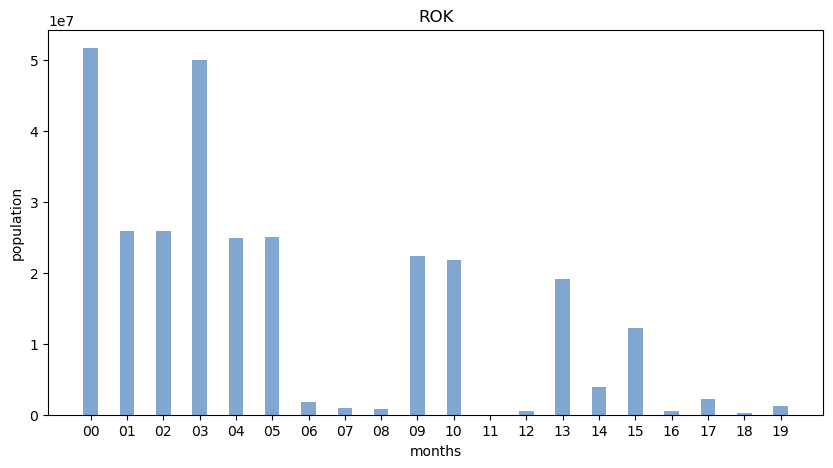

In [282]:
# 04.21.02
# plot total populations by year
# combines 9 datasets: dt03-dt12
# assign variable for plot components as _yr_y
# dt03

dt03_yr_y_yr = list(dt03_yr_y.keys())
dt03_yr_y_val = list(dt03_yr_y.values())
dt03_yr_y_fig = plt.figure(figsize = (10, 5))
plt.bar(dt03_yr_y_yr, dt03_yr_y_val, color ='#81A7D1', width = 0.4)
plt.xlabel("months")
plt.ylabel("population")
plt.title("ROK")
plt.show()

In [283]:
# 04.22.01
# combine variables into new df
# compiles 19 rows: 01-19
# assign variable for new dataset as _yr_x
# add variable 0 for total
# return df
# dt04

np.random.seed(123)
dt04_yr_y = {
            '00':dt04_00_flt,
            '01':dt04_01_flt,
            '02':dt04_02_flt,
            '03':dt04_03_flt,
            '04':dt04_04_flt,
            '05':dt04_05_flt,
            '06':dt04_06_flt,
            '07':dt04_07_flt,
            '08':dt04_08_flt,
            '09':dt04_09_flt,
            '10':dt04_10_flt,
            '11':dt04_11_flt,
            '12':dt04_12_flt,
            '13':dt04_13_flt,
            '14':dt04_14_flt,
            '15':dt04_15_flt,
            '16':dt04_16_flt,
            '17':dt04_17_flt,
            '18':dt04_18_flt,
            '19':dt04_19_flt
            }
dt04_yr_x = pd.DataFrame(dt04_yr_y, index=[0])
print(dt04_yr_x)

           00          01          02          03          04          05  \
0  48580293.0  24167098.0  24413195.0  47990761.0  23840896.0  24149865.0   

         06        07        08          09          10       11        12  \
0  589532.0  326202.0  263330.0  17574067.0  17339422.0  20727.0  213918.0   

           13         14         15        16         17        18        19  
0  14677419.0  4089491.0  8576013.0  536070.0  1314452.0  161393.0  303097.0  


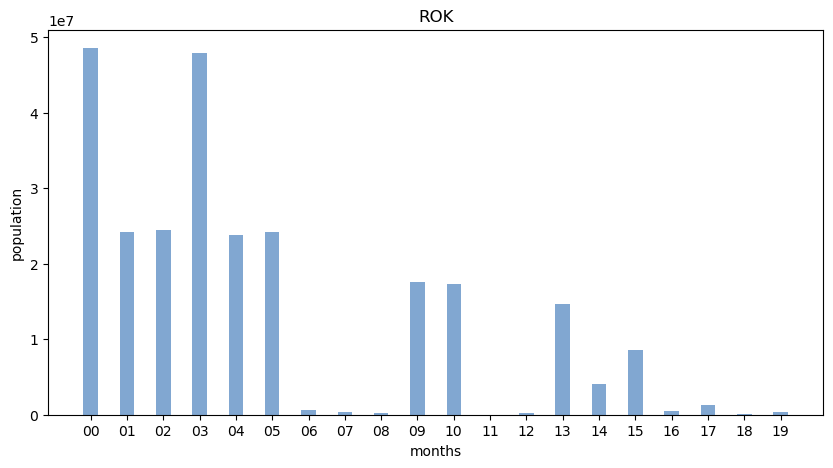

In [284]:
# 04.22.02
# plot total populations by year
# combines 9 datasets: dt03-dt12
# assign variable for plot components as _yr_y
# dt04

dt04_yr_y_yr = list(dt04_yr_y.keys())
dt04_yr_y_val = list(dt04_yr_y.values())
dt04_yr_y_fig = plt.figure(figsize = (10, 5))
plt.bar(dt04_yr_y_yr, dt04_yr_y_val, color ='#81A7D1', width = 0.4)
plt.xlabel("months")
plt.ylabel("population")
plt.title("ROK")
plt.show()

In [285]:
# 04.23.01
# combine variables into new df
# compiles 19 rows: 01-19
# assign variable for new dataset as _yr_x
# add variable 0 for total
# return df
# dt05

np.random.seed(123)
dt05_yr_y = {
            '00':dt05_00_flt,
            '01':dt05_01_flt,
            '02':dt05_02_flt,
            '03':dt05_03_flt,
            '04':dt05_04_flt,
            '05':dt05_05_flt,
            '06':dt05_06_flt,
            '07':dt05_07_flt,
            '08':dt05_08_flt,
            '09':dt05_09_flt,
            '10':dt05_10_flt,
            '11':dt05_11_flt,
            '12':dt05_12_flt,
            '13':dt05_13_flt,
            '14':dt05_14_flt,
            '15':dt05_15_flt,
            '16':dt05_16_flt,
            '17':dt05_17_flt,
            '18':dt05_18_flt,
            '19':dt05_19_flt
            }
dt05_yr_x = pd.DataFrame(dt05_yr_y, index=[0])
print(dt05_yr_x)

           00          01          02          03          04          05  \
0  47278951.0  23623954.0  23654997.0  47041434.0  23465650.0  23575784.0   

         06        07       08          09          10       11       12  \
0  237517.0  158304.0  79213.0  15988274.0  15887128.0  16551.0  84595.0   

           13         14         15        16         17        18        19  
0  13222641.0  4263541.0  6962689.0  558513.0  1229208.0  208690.0  206511.0  


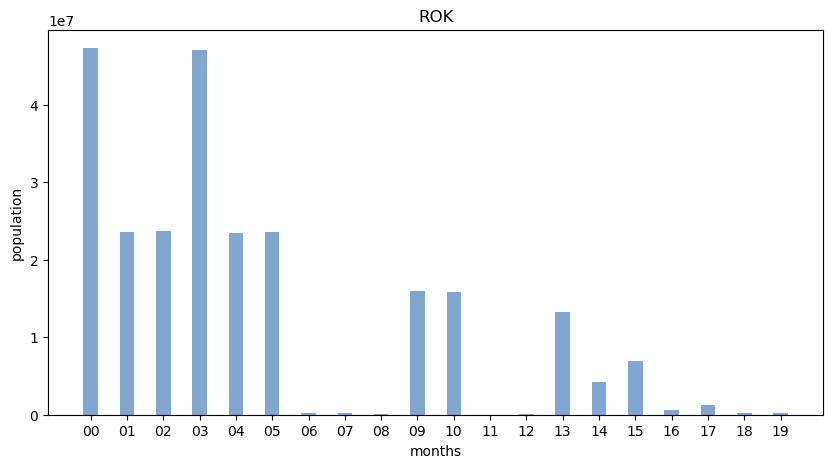

In [286]:
# 04.23.02
# plot total populations by year
# combines 19 rows: 01-19
# assign variable for plot components as _yr_y
# dt05

dt05_yr_y_yr = list(dt05_yr_y.keys())
dt05_yr_y_val = list(dt05_yr_y.values())
dt05_yr_y_fig = plt.figure(figsize = (10, 5))
plt.bar(dt05_yr_y_yr, dt05_yr_y_val, color ='#81A7D1', width = 0.4)
plt.xlabel("months")
plt.ylabel("population")
plt.title("ROK")
plt.show()

In [287]:
# 04.24.01
# combine variables into new df
# compiles 19 rows: 01-19
# assign variable for new dataset as _yr_x
# add variable 0 for total
# return df
# dt06

np.random.seed(123)
dt06_yr_y = {
            '00':dt06_00_flt,
            '01':dt06_01_flt,
            '02':dt06_02_flt,
            '03':dt06_03_flt,
            '04':dt06_04_flt,
            '05':dt06_05_flt,
            '06':dt06_06_flt,
            '07':dt06_07_flt,
            '08':dt06_08_flt,
            '09':dt06_09_flt,
            '10':dt06_10_flt,
            '11':dt06_11_flt,
            '12':dt06_12_flt,
            '13':dt06_13_flt,
            '14':dt06_14_flt,
            '15':dt06_15_flt,
            '16':dt06_16_flt,
            '17':dt06_17_flt,
            '18':dt06_18_flt,
            '19':dt06_19_flt
            }
dt06_yr_x = pd.DataFrame(dt06_yr_y, index=[0])
print(dt06_yr_x)

           00          01          02          03          04          05  \
0  46136101.0  23158582.0  22977519.0  45985289.0  23068181.0  22917108.0   

         06       07       08          09          10       11       12  \
0  150812.0  90401.0  60411.0  14391374.0  14311807.0  14417.0  65150.0   

           13         14         15        16        17        18       19  
0  11472401.0  4269180.0  5479828.0  849687.0  472236.0  401470.0  91814.0  


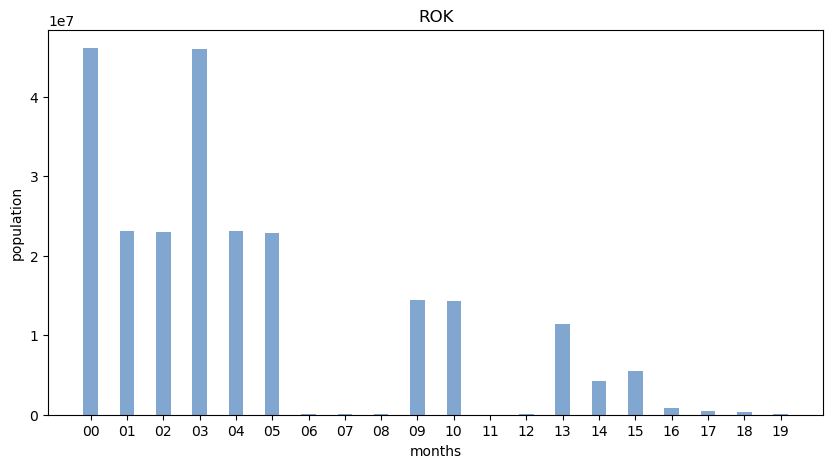

In [288]:
# 04.24.02
# plot total populations by year
# combines 19 rows: 01-19
# assign variable for plot components as _yr_y
# dt06

dt06_yr_y_yr = list(dt06_yr_y.keys())
dt06_yr_y_val = list(dt06_yr_y.values())
dt06_yr_y_fig = plt.figure(figsize = (10, 5))
plt.bar(dt06_yr_y_yr, dt06_yr_y_val, color ='#81A7D1', width = 0.4)
plt.xlabel("months")
plt.ylabel("population")
plt.title("ROK")
plt.show()

In [289]:
# 04.25.01
# combine variables into new df
# compiles 16 rows: 01-16
# assign variable for new dataset as _yr_x
# add variable 0 for total
# return df
# dt07

np.random.seed(123)
dt07_yr_y = {
            '00':dt07_00_flt,
            '01':dt07_01_flt,
            '02':dt07_02_flt,
            '03':dt07_03_flt,
            '04':dt07_04_flt,
            '05':dt07_05_flt,
            '06':dt07_06_flt,
            '07':dt07_07_flt,
            '08':dt07_08_flt,
            '09':dt07_09_flt,
            '10':dt07_10_flt,
            '11':dt07_11_flt,
            '12':dt07_12_flt,
            '13':dt07_13_flt,
            '14':dt07_14_flt,
            '15':dt07_15_flt,
            '16':dt07_16_flt
            }
dt07_yr_x = pd.DataFrame(dt07_yr_y, index=[0])
print(dt07_yr_x)

           00          01          02          03          04          05  \
0  44608726.0  22389324.0  22219402.0  44553710.0  22357352.0  22196358.0   

           06          07          08          09        10        11  \
0  12958181.0  44028108.0  22046400.0  21981708.0  525602.0  310952.0   

         12       13       14       15       16  
0  214650.0  17110.0  55016.0  31972.0  23044.0  


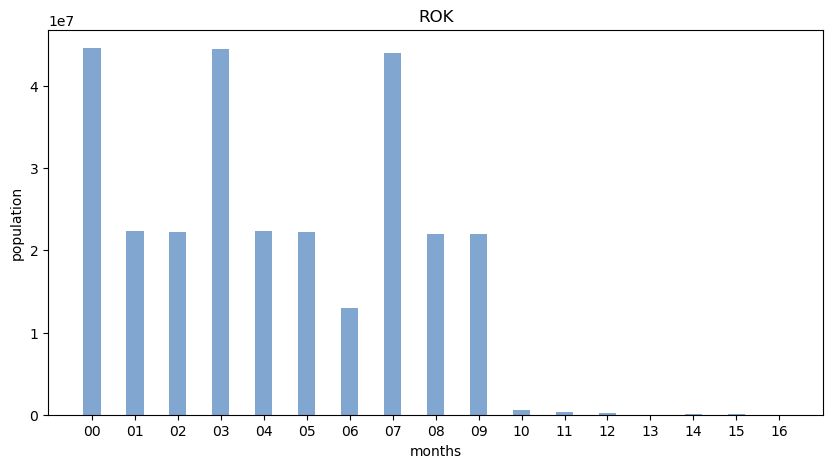

In [290]:
# 04.25.02
# plot total populations by year
# combines 16 rows: 01-16
# assign variable for plot components as _yr_y
# dt07

dt07_yr_y_yr = list(dt07_yr_y.keys())
dt07_yr_y_val = list(dt07_yr_y.values())
dt07_yr_y_fig = plt.figure(figsize = (10, 5))
plt.bar(dt07_yr_y_yr, dt07_yr_y_val, color ='#81A7D1', width = 0.4)
plt.xlabel("months")
plt.ylabel("population")
plt.title("ROK")
plt.show()

In [291]:
# 04.26.01
# combine variables into new df
# compiles 16 rows: 01-16
# assign variable for new dataset as _yr_x
# add variable 0 for total
# return df
# dt08

np.random.seed(123)
dt08_yr_y = {
            '00':dt08_00_flt,
            '01':dt08_01_flt,
            '02':dt08_02_flt,
            '03':dt08_03_flt,
            '04':dt08_04_flt,
            '05':dt08_05_flt,
            '06':dt08_06_flt,
            '07':dt08_07_flt,
            '08':dt08_08_flt,
            '09':dt08_09_flt,
            '10':dt08_10_flt,
            '11':dt08_11_flt,
            '12':dt08_12_flt,
            '13':dt08_13_flt,
            '14':dt08_14_flt,
            '15':dt08_15_flt,
            '16':dt08_16_flt
            }
dt08_yr_x = pd.DataFrame(dt08_yr_y, index=[0])
print(dt08_yr_x)

           00          01          02          03          04          05  \
0  43410899.0  21782154.0  21628745.0  43390374.0  21770919.0  21619455.0   

           06          07          08          09        10        11  \
0  11354540.0  42782526.0  21446690.0  21335836.0  607848.0  324229.0   

         12      13       14       15      16  
0  283619.0  6556.0  20525.0  11235.0  9290.0  


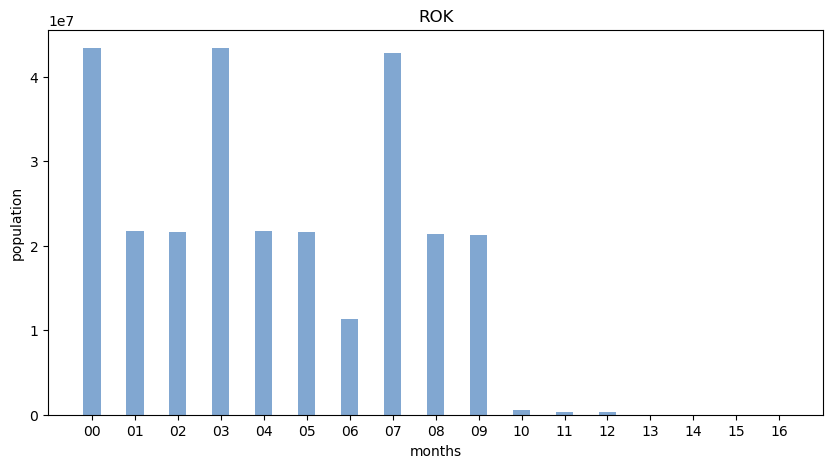

In [292]:
# 04.26.02
# plot total populations by year
# combines 16 rows: 01-16
# assign variable for plot components as _yr_y
# dt08

dt08_yr_y_yr = list(dt08_yr_y.keys())
dt08_yr_y_val = list(dt08_yr_y.values())
dt08_yr_y_fig = plt.figure(figsize = (10, 5))
plt.bar(dt08_yr_y_yr, dt08_yr_y_val, color ='#81A7D1', width = 0.4)
plt.xlabel("months")
plt.ylabel("population")
plt.title("ROK")
plt.show()

In [293]:
# 04.27.01
# combine variables into new df
# compiles 16 rows: 01-16
# assign variable for new dataset as _yr_x
# add variable 0 for total
# return df
# dt09

np.random.seed(123)
dt09_yr_y = {
            '00':dt09_00_flt,
            '01':dt09_01_flt,
            '02':dt09_02_flt,
            '03':dt09_03_flt,
            '04':dt09_04_flt,
            '05':dt09_05_flt,
            '06':dt09_06_flt,
            '07':dt09_07_flt,
            '08':dt09_08_flt,
            '09':dt09_09_flt,
            '10':dt09_10_flt,
            '11':dt09_11_flt,
            '12':dt09_12_flt,
            '13':dt09_13_flt,
            '14':dt09_14_flt,
            '15':dt09_15_flt,
            '16':dt09_16_flt
            }
dt09_yr_x = pd.DataFrame(dt09_yr_y, index=[0])
print(dt09_yr_x)

           00          01          02          03          04          05  \
0  40448486.0  20243765.0  20204721.0  40419652.0  20227564.0  20192088.0   

          06          07          08          09        10        11  \
0  9571361.0  39772679.0  19925681.0  19846998.0  646973.0  301883.0   

         12       13       14       15       16  
0  345090.0  10694.0  28834.0  16201.0  12633.0  


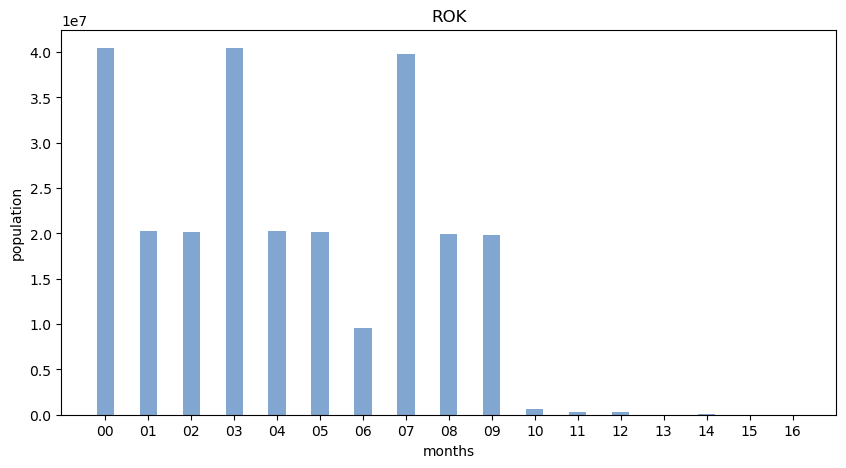

In [294]:
# 04.27.02
# plot total populations by year
# combines 16 rows: 01-16
# assign variable for plot components as _yr_y
# dt09

dt09_yr_y_yr = list(dt09_yr_y.keys())
dt09_yr_y_val = list(dt09_yr_y.values())
dt09_yr_y_fig = plt.figure(figsize = (10, 5))
plt.bar(dt09_yr_y_yr, dt09_yr_y_val, color ='#81A7D1', width = 0.4)
plt.xlabel("months")
plt.ylabel("population")
plt.title("ROK")
plt.show()

In [295]:
# 04.28.01
# combine variables into new df
# compiles 16 rows: 01-16
# assign variable for new dataset as _yr_x
# add variable 0 for total
# return df
# dt10

np.random.seed(123)
dt10_yr_y = {
            '00':dt10_00_flt,
            '01':dt10_01_flt,
            '02':dt10_02_flt,
            '03':dt10_03_flt,
            '04':dt10_04_flt,
            '05':dt10_05_flt,
            '06':dt10_06_flt,
            '07':dt10_07_flt,
            '08':dt10_08_flt,
            '09':dt10_09_flt,
            '10':dt10_10_flt,
            '11':dt10_11_flt,
            '12':dt10_12_flt,
            '13':dt10_13_flt,
            '14':dt10_14_flt,
            '15':dt10_15_flt,
            '16':dt10_16_flt
            }
dt10_yr_x = pd.DataFrame(dt10_yr_y, index=[0])
print(dt10_yr_x)

           00          01          02          03          04          05  \
0  37436315.0  18767201.0  18669114.0  37406815.0  18749306.0  18657509.0   

          06          07          08          09        10        11  \
0  7969201.0  36843251.0  18523047.0  18320204.0  563564.0  226259.0   

         12      13       14       15       16  
0  337305.0  9404.0  29500.0  17895.0  11605.0  


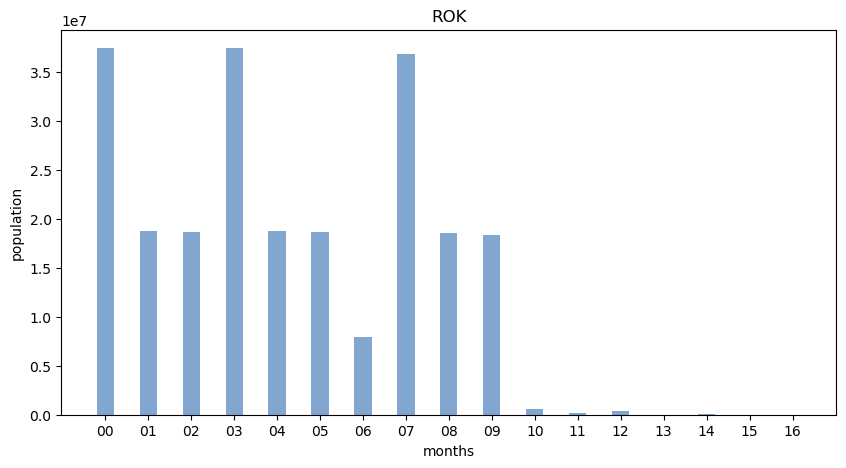

In [296]:
# 04.28.02
# plot total populations by year
# combines 16 rows: 01-16
# assign variable for plot components as _yr_y
# dt10

dt10_yr_y_yr = list(dt10_yr_y.keys())
dt10_yr_y_val = list(dt10_yr_y.values())
dt10_yr_y_fig = plt.figure(figsize = (10, 5))
plt.bar(dt10_yr_y_yr, dt10_yr_y_val, color ='#81A7D1', width = 0.4)
plt.xlabel("months")
plt.ylabel("population")
plt.title("ROK")
plt.show()

In [297]:
# 04.29.01
# combine variables into new df
# compiles 11 rows: 01-11
# assign variable for new dataset as _yr_x
# add variable 0 for total
# return df
# dt11

np.random.seed(123)
dt11_yr_y = {
            '00':dt11_00_flt,
            '01':dt11_01_flt,
            '02':dt11_02_flt,
            '03':dt11_03_flt,
            '04':dt11_04_flt,
            '05':dt11_05_flt,
            '06':dt11_06_flt,
            '07':dt11_07_flt,
            '08':dt11_08_flt,
            '09':dt11_09_flt,
            '10':dt11_10_flt,
            '11':dt11_11_flt
            }
dt11_yr_x = pd.DataFrame(dt11_yr_y, index=[0])
print(dt11_yr_x)

          00         01      02          03          04          05  \
0  6761239.0  6754257.0  6982.0  34706620.0  17461244.0  17245376.0   

           06          07          08       09       10       11  
0  34678972.0  17445246.0  17233726.0  27648.0  15998.0  11650.0  


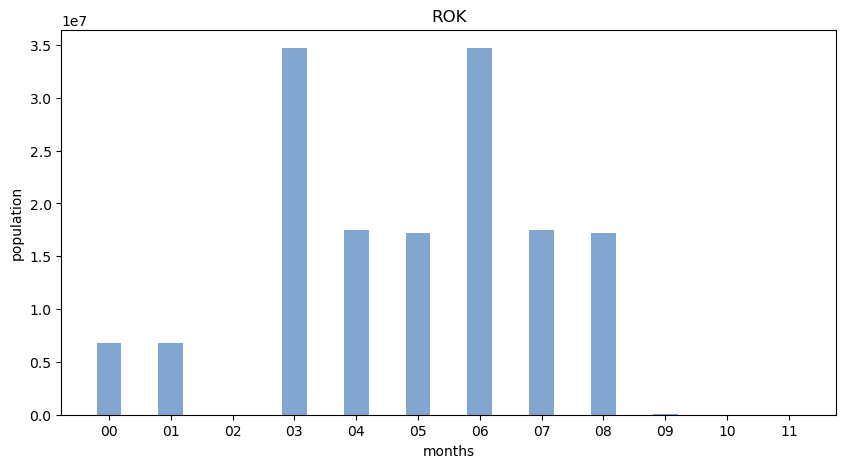

In [298]:
# 04.29.02
# plot total populations by year
# combines 11 rows: 01-11
# assign variable for plot components as _yr_y
# dt11

dt11_yr_y_yr = list(dt11_yr_y.keys())
dt11_yr_y_val = list(dt11_yr_y.values())
dt11_yr_y_fig = plt.figure(figsize = (10, 5))
plt.bar(dt11_yr_y_yr, dt11_yr_y_val, color ='#81A7D1', width = 0.4)
plt.xlabel("months")
plt.ylabel("population")
plt.title("ROK")
plt.show()

In [299]:
# 04.30.01
# combine variables into new df
# compiles 11 rows: 01-11
# assign variable for new dataset as _yr_x
# add variable 0 for total
# return df
# dt12

np.random.seed(123)
dt12_yr_y = {
            '00':dt12_00_flt,
            '01':dt12_01_flt,
            '02':dt12_02_flt,
            '03':dt12_03_flt,
            '04':dt12_04_flt,
            '05':dt12_05_flt,
            '06':dt12_06_flt,
            '07':dt12_07_flt,
            '08':dt12_08_flt,
            '09':dt12_09_flt,
            '10':dt12_10_flt,
            '11':dt12_11_flt
            }
dt12_yr_x = pd.DataFrame(dt12_yr_y, index=[0])
print(dt12_yr_x)

          00         01      02          03          04          05  \
0  5863440.0  5856901.0  6539.0  30882386.0  15216002.0  15666384.0   

           06          07          08       09       10       11  
0  30851984.0  15199940.0  15652044.0  30402.0  16062.0  14340.0  


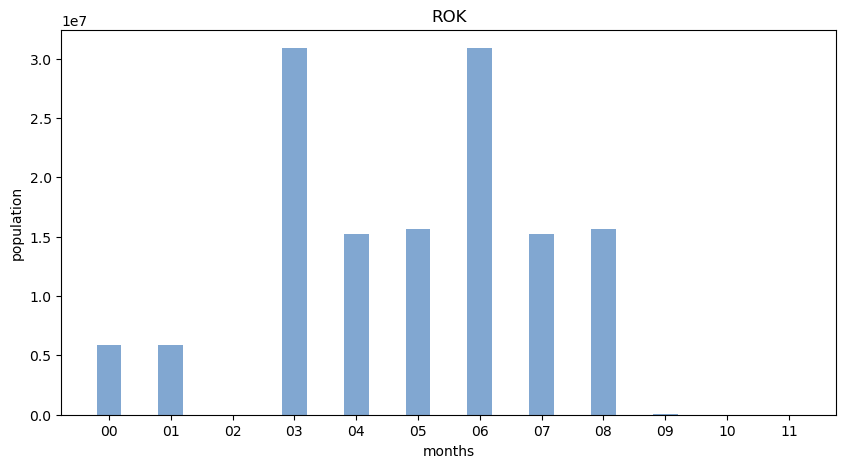

In [300]:
# 04.30.02
# plot total populations by year
# combines 11 rows: 01-11
# assign variable for plot components as _yr_y
# dt12

dt12_yr_y_yr = list(dt12_yr_y.keys())
dt12_yr_y_val = list(dt12_yr_y.values())
dt12_yr_y_fig = plt.figure(figsize = (10, 5))
plt.bar(dt12_yr_y_yr, dt12_yr_y_val, color ='#81A7D1', width = 0.4)
plt.xlabel("months")
plt.ylabel("population")
plt.title("ROK")
plt.show()

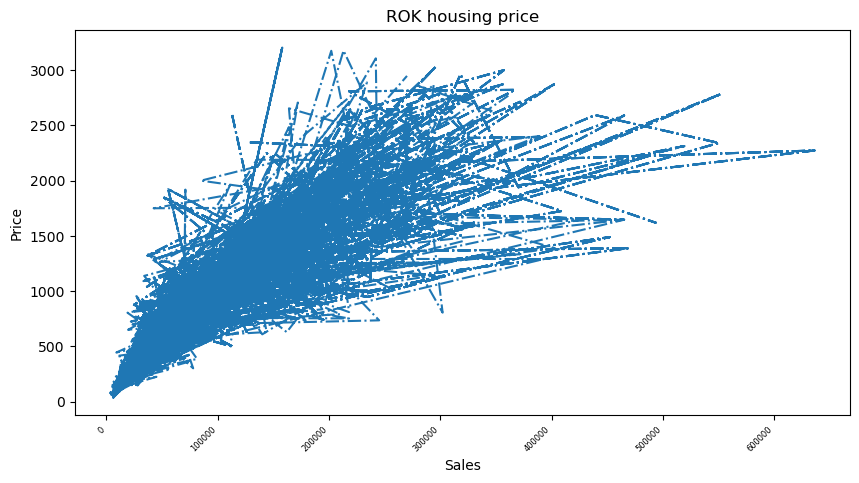

In [301]:
# 04.31.01
# plot population trend to date
# assign variable for plot components as _00
# dt13

dt13_00_x = dt13['avg_sales']
dt13_00_y = dt13['pricePerArea']
dt13_00_fig = plt.figure(figsize = (10, 5))
plt.plot(dt13_00_x, dt13_00_y, '-.')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize=6
)
plt.xlabel("Sales")
plt.ylabel("Price")
plt.title("ROK housing price")
plt.show()

In [302]:
# 04.32.01
# plot total populations by year
# combine variables into new df
# compiles 9 datasets: dt03-dt12
# assign variable for new dataset as _ttl_x
# return df
# dt_x, dt_y

np.random.seed(123)
dt_ttl_y = {
            '1970':dt12_ttl,
            '1975':dt11_ttl,
            '1980':dt10_ttl,
            '1985':dt09_ttl,
            '1990':dt08_ttl,
            '1995':dt07_ttl,
            '2000':dt06_ttl,
            '2005':dt05_ttl,
            '2010':dt04_ttl,
            '2022':dt03_ttl
           }
dt_ttl_x = pd.DataFrame(dt_ttl_y, index=[0])
print(dt_ttl_x)

          1970         1975         1980         1985         1990  \
0  135256424.0  152348958.0  232537495.0  252215303.0  271785440.0   

          1995         2000         2005         2010         2022  
0  280517615.0  236363768.0  247744145.0  259127241.0  291008943.0  


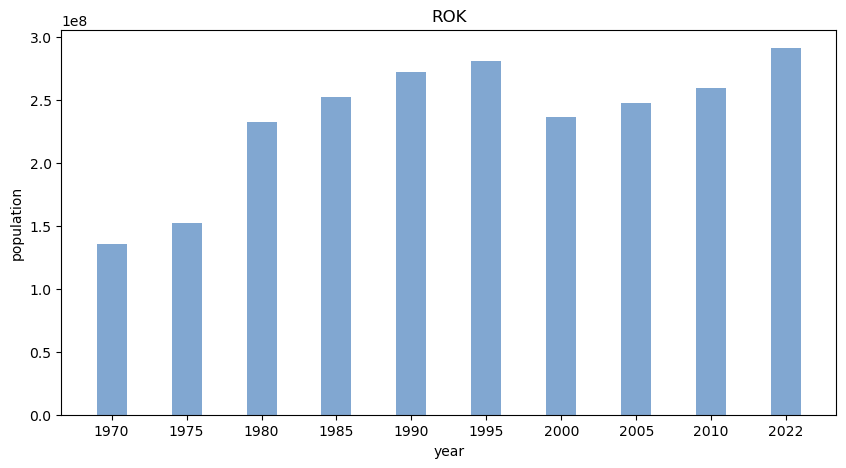

In [303]:
# 04.32.02
# plot total populations by year
# combines 9 datasets: dt03-dt12
# assign variable for plot components as _ttl_y
# dt_x, dt_y

dt_ttl_y_yr = list(dt_ttl_y.keys())
dt_ttl_y_val = list(dt_ttl_y.values())
dt_ttl_y_fig = plt.figure(figsize = (10, 5))
plt.bar(dt_ttl_y_yr, dt_ttl_y_val, color ='#81A7D1', width = 0.4)
plt.xlabel("year")
plt.ylabel("population")
plt.title("ROK")
plt.show()

In [304]:
# 04.33.01
# combine variables into new df
# compiles 9 datasets: dt03-dt12
# assign variable for new dataset as _x
# return df
# dt_x, dt_y

np.random.seed(123)
dt_mn_y = {'1970':dt12_x,
           '1975':dt11_x,
           '1980':dt10_x,
           '1985':dt09_x,
           '1990':dt08_x,
           '1995':dt07_x,
           '2000':dt06_x,
           '2005':dt05_x,
           '2010':dt04_x,
           '2022':dt03_x
          }
dt_mn_x = pd.DataFrame(dt_mn_y, index=[0])
print(dt_mn_x)

           1970          1975          1980          1985          1990  \
0  1.229604e+07  1.384991e+07  1.367868e+07  1.483619e+07  1.598738e+07   

           1995        2000         2005         2010         2022  
0  1.650104e+07  11818188.4  12387207.25  12956362.05  14550447.15  


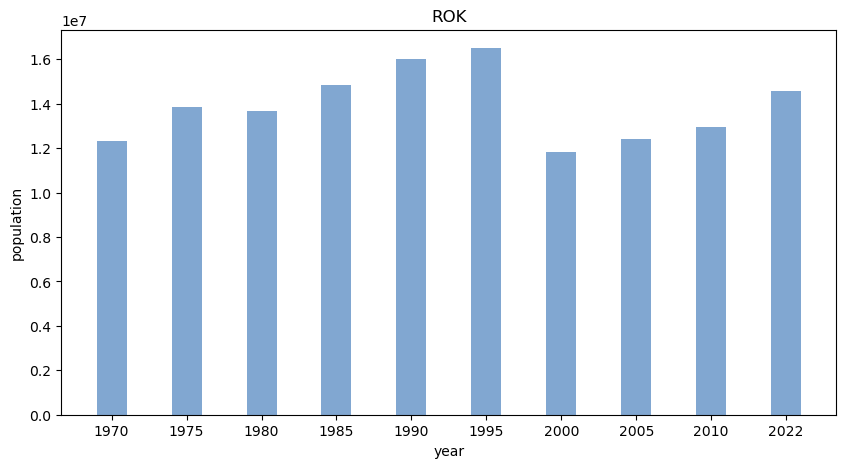

In [305]:
# 04.33.02
# plot mean populations by year
# combines 9 datasets: dt03-dt12
# assign variable for plot components as _mn_y
# dt_x, dt_y

dt_mn_yr = list(dt_mn_y.keys())
dt_mn_val = list(dt_mn_y.values())
dt_mn_fig = plt.figure(figsize = (10, 5))
plt.bar(dt_mn_yr, dt_mn_val, color ='#81A7D1', width = 0.4)
plt.xlabel("year")
plt.ylabel("population")
plt.title("ROK")
plt.show()

In [306]:
# 04.34.01
# combine variables into new df
# compiles 9 datasets: dt03-dt12
# assign variable for new dataset as _00
# return df
# dt_00

np.random.seed(123)
dt_00_y = {
        '1970':dt12_00_flt,
        '1975':dt11_00_flt,
        '1980':dt10_00_flt,
        '1985':dt09_00_flt,
        '1990':dt08_00_flt,
        '1995':dt07_00_flt,
        '2000':dt06_00_flt,
        '2005':dt05_00_flt,
        '2010':dt04_00_flt,
        '2022':dt03_00_flt
          }
dt_00_x = pd.DataFrame(dt_00_y, index=[0])
print(dt_00_x)

        1970       1975        1980        1985        1990        1995  \
0  5863440.0  6761239.0  37436315.0  40448486.0  43410899.0  44608726.0   

         2000        2005        2010        2022  
0  46136101.0  47278951.0  48580293.0  51692272.0  


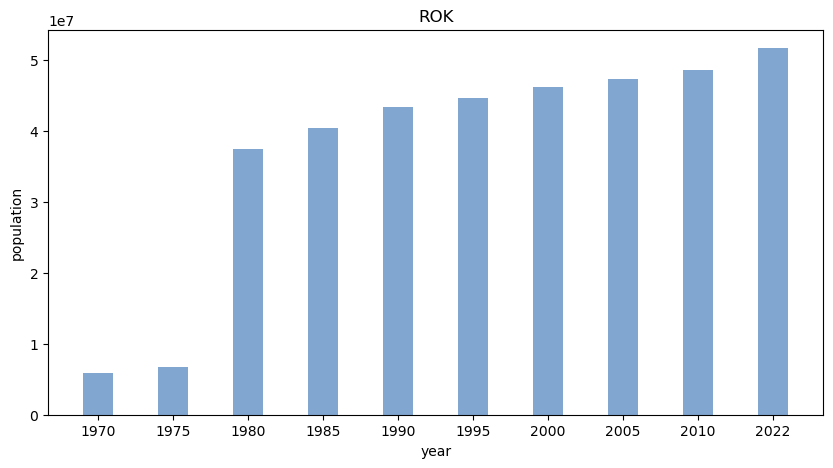

In [307]:
# 04.34.02
# plot total populations by year
# combines 9 datasets: dt03-dt12
# assign variable for plot components as _00
# dt_00

dt_00_yr = list(dt_00_y.keys())
dt_00_val = list(dt_00_y.values())
dt_00_fig = plt.figure(figsize = (10, 5))
plt.bar(dt_00_yr, dt_00_val, color ='#81A7D1', width = 0.4)
plt.xlabel("year")
plt.ylabel("population")
plt.title("ROK")
plt.show()

In [308]:
# 04.35.01
# create vertices for total population
# assign variable for new dataset as _00
# return df
# dt_00_vt

dt_00_dt = [
        ['1970', dt12_00_flt],
        ['1975', dt11_00_flt],
        ['1980', dt10_00_flt],
        ['1985', dt09_00_flt],
        ['1990', dt08_00_flt],
        ['1995', dt07_00_flt],
        ['2000', dt06_00_flt],
        ['2005', dt05_00_flt],
        ['2010', dt04_00_flt],
        ['2022', dt03_00_flt]
        ]
dt_00_vt = pd.DataFrame(dt_00_dt, columns=['Year', 'Population'])

In [309]:
# 04.36.01
# create dummy variables
# due to returning boolean values, converting dummmies to integers -------------
# for dataset dt_00 containing population data
# dt_00

dt_00_vt_dv = pd.get_dummies(dt_00_vt, drop_first=True, dtype=int)

In [310]:
# 04.36.02
# return head of dummy variables
# for dataset dt_00 containing population data
# dt_00

print(dt_00_vt_dv.head())

   Population  Year_1975  Year_1980  Year_1985  Year_1990  Year_1995  \
0   5863440.0          0          0          0          0          0   
1   6761239.0          1          0          0          0          0   
2  37436315.0          0          1          0          0          0   
3  40448486.0          0          0          1          0          0   
4  43410899.0          0          0          0          1          0   

   Year_2000  Year_2005  Year_2010  Year_2022  
0          0          0          0          0  
1          0          0          0          0  
2          0          0          0          0  
3          0          0          0          0  
4          0          0          0          0  


In [311]:
# 04.36.03
# Split the data into a training and test set
# target = Year_2022
# Year_2022 = variable 01
# select columns 
# for dataset dt_00 containing population data
# dt_00

dt_00_vt_dv_x01 = dt_00_vt_dv.drop(['Year_2022'], axis=1)
dt_00_vt_dv_y01 = dt_00_vt_dv['Year_2022']

In [312]:
# 04.36.04
# Split the data into a training and test set
# target = Year_2022
# Year_2022 = variable 01
# split into train and test 
# for dataset dt_00 containing population data
# dt_00

dt_00_vt_dv_x01_trn, dt_00_vt_dv_x01_tst, dt_00_vt_dv_y01_trn, dt_00_vt_dv_y01_tst = train_test_split(dt_00_vt_dv_x01, dt_00_vt_dv_y01, test_size=0.3, random_state=0)

In [313]:
# 04.36.05
# Split the data into a training and test set
# target = Year_2022
# Year_2022 = variable 01
# Run a linear regression and report the R2-value and RMSE on the test set.
# assign regression variable 
# for dataset dt_00 containing population data
# dt_00

dt_00_vt_dv_lr01 = LinearRegression()

In [314]:
# 04.36.06
# Split the data into a training and test set
# target = Year_2022
# Year_2022 = variable 01
# Run a linear regression and report the R2-value and RMSE on the test set.
# fit variables to model 
# for dataset dt_00 containing population data
# dt_00

dt_00_vt_dv_lr01.fit(dt_00_vt_dv_x01_trn, dt_00_vt_dv_y01_trn)

LinearRegression()

In [315]:
# 04.36.07
# Split the data into a training and test set
# target = Year_2022
# Year_2022 = variable 01
# Run a linear regression and report the R2-value and RMSE on the test set.
# fit variables to model 
# for dataset dt_00 containing population data
# dt_00

dt_00_vt_dv_y01_pdct = dt_00_vt_dv_lr01.predict(dt_00_vt_dv_x01_tst)

In [316]:
# 04.36.08
# Split the data into a training and test set
# target = Year_2022
# Year_2022 = variable 01
# Run a linear regression and report the R2-value and RMSE on the test set.
# assign variable for rmse and r2 
# for dataset dt_00 containing population data
# dt_00

dt_00_vt_dv_rmse01 = np.sqrt(mean_squared_error(dt_00_vt_dv_y01_tst, dt_00_vt_dv_y01_pdct))
dt_00_vt_dv_r201 = r2_score(dt_00_vt_dv_y01_tst, dt_00_vt_dv_y01_pdct)

In [317]:
# 04.36.09
# Split the data into a training and test set
# target = Year_2022
# Year_2022 = variable 01
# Run a linear regression and report the R2-value and RMSE on the test set.
# return rmse and r2 dt04
# rmse: 0.8194868527982039
# r2: 0.0
# there appears to be a problem with R^2 model, as it is likely that y perdictor and y test are the same.
# rmse and r2 both indicate very low correlation
# for dataset dt_00 containing population data
# dt_00

print(f'rmse: {dt_00_vt_dv_rmse01}')
print(f'r2: {dt_00_vt_dv_r201}')

rmse: 0.8194868527982039
r2: 0.0


In [318]:
# 04.37.01
# assign variable for pca
# Year_2022 = variable 01
# for dataset dt_00 containing population data
# dt_00

pca = PCA(.9)

In [319]:
# 04.37.02
# calculate pca
# Year_2022 = variable 01
# for dataset dt_00 containing population data
# dt_00

pca.fit(dt_00_vt_dv_x01_trn)
dt_00_vt_dv_x01_pca_trn = pca.transform(dt_00_vt_dv_x01_trn)
dt_00_vt_dv_x01_pca_tst = pca.transform(dt_00_vt_dv_x01_tst)

In [320]:
# 04.37.03
# return pca calculation matrix
# Year_2022 = variable 01
# for dataset dt_00 containing population data
# dt_00

print(f'features in pca matrix: {dt_00_vt_dv_x01_pca_trn.shape[1]}')

features in pca matrix: 1


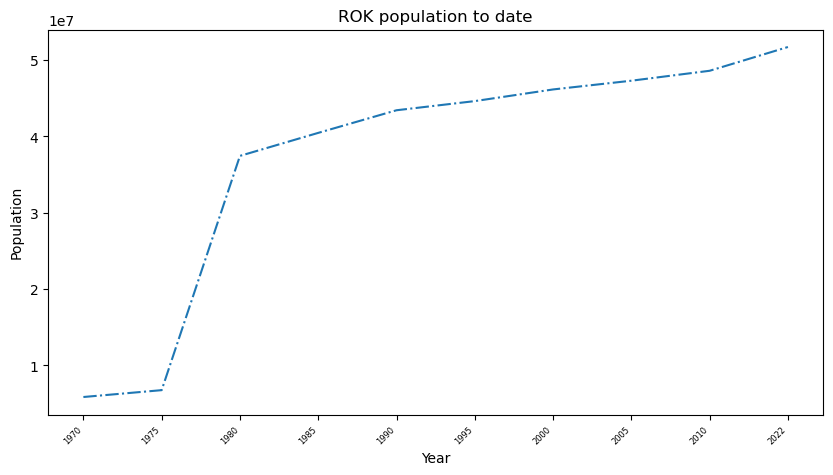

In [321]:
# 04.38.01
# plot total populations by year
# combines 9 datasets: dt03-dt12
# assign variable for plot components as _00
# dt_00_vt

dt_00_vt_x = dt_00_vt['Year']
dt_00_vt_y = dt_00_vt['Population']
dt_00_vt_fig = plt.figure(figsize = (10, 5))
plt.plot(dt_00_vt_x, dt_00_vt_y, '-.')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize=6
)
plt.xlabel("Year")
plt.ylabel("Population")
plt.title("ROK population to date")
plt.show()

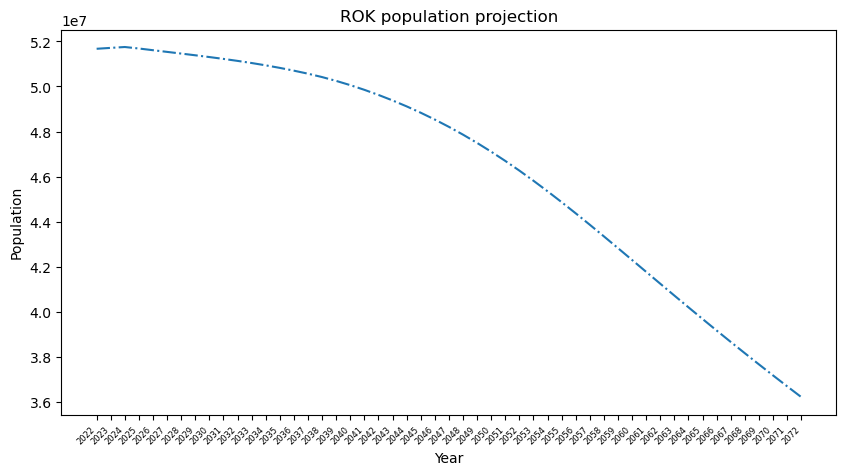

In [322]:
# 04.39.01
# plot population future projection
# assign variable for plot components as _00
# dt_00

dt14_00_x = dt14_00['Year']
dt14_00_y = dt14_00['Population']
dt14_00_fig = plt.figure(figsize = (10, 5))
plt.plot(dt14_00_x, dt14_00_y, '-.')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize=6
)
plt.xlabel("Year")
plt.ylabel("Population")
plt.title("ROK population projection")
plt.show()

In [323]:
# Summary of Term Project DSC550_term_Schreck-Kim.pdf

In [324]:
# You have made it to the final week of the course and the time has come to submit your final project! 
# Using your own judgment and based on the feedback you have received, update your project accordingly. 
# Add any new code and/or analysis to your content from Milestones 1-3. 
# Clearly note what content has been added since Milestone 3. 
# Include this as part of your final project submission.
# The primary final submission for the term project is a minimum five-page project writeup, e.g., MS Word or PDF file, 
# summarizing the details of your project. Your final submission should include the following.
# - Introduction
# - Introduce the problem
# - Justify why it is important/useful to solve this problem
# - How would you pitch this problem to a group of stakeholders to gain buy-in to proceed?
# - Explain where you obtained your data
# - Organized and detailed summary of Milestones 1-3
# - EDA; include any visuals you think are important to your project
# - Data preparation
# - Model building and evaluation
# - Conclusion
# - What does the analysis/model building tell you?
# - Is this model ready to be deployed?
# - What are your recommendations?
# - What are some of the potential challenges or additional opportunities that still need to be explored?
# To summarize, you should submit the following two items for your term project final submissions:
# - All code, content, and analysis from Milestones 1-3 along with any updates
# - Project writeup described above